In [7]:
library(dplyr)
library(ggplot2)

In [8]:
# FDR = 0.01
# FDR = 0.05
FDR = 0.1

In [9]:
mydir_all = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/PCs/new/"
prefixes = c("PC1_endo_eqtl_permuteE_within_donors/",
            "PC1_2_endo_eqtl_permuteE_within_donors/",
            "PC1_5_endo_eqtl_permuteE_within_donors/",
            "PC1_10_endo_eqtl_permuteE_within_donors/",
            "PC1_20_endo_eqtl_permuteE_within_donors/",
            "PC1_50_endo_eqtl_permuteE_within_donors/",
            "PC1_100_endo_eqtl_permuteE_within_donors/",
            "PC1_200_endo_eqtl_permuteE_within_donors/",
            "PC1_500_endo_eqtl_permuteE_within_donors/")

In [10]:
df = data.frame()
for (prefix in prefixes){
    n_mofa = gsub("_endo_eqtl_permuteE_within_donors/","", prefix)
    mydir = paste0(mydir_all, prefix)
    res = read.csv(paste0(mydir,'summary_endo_eqtl.csv'), row.names = 1)
    n_genes = length(unique(res$gene))
    n_egenes = length(unique(res[res$pv_adj < FDR,]$gene))
    df = rbind(df, data.frame(n_mofa = n_mofa, 
                              n_genes = n_genes,
                              n_egenes = n_egenes,
                              ratio = n_egenes/n_genes))
}

In [11]:
df

n_mofa  n_genes n_egenes ratio     
1 PC1     88      1        0.01136364
2 PC1_2   88      0        0.00000000
3 PC1_5   88      0        0.00000000
4 PC1_10  88      0        0.00000000
5 PC1_20  88      0        0.00000000
6 PC1_50  88      0        0.00000000
7 PC1_100 88      0        0.00000000
8 PC1_200 88      0        0.00000000
9 PC1_500 51      0        0.00000000

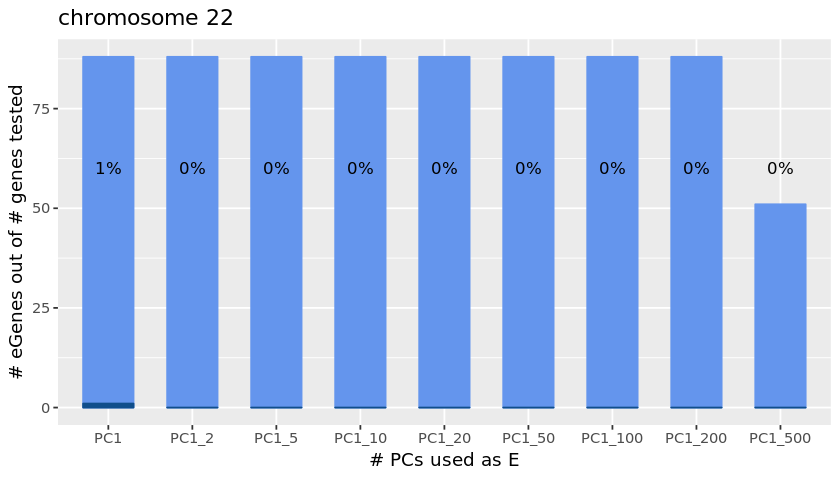

In [12]:
options(repr.plot.width = 7, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_mofa), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_mofa), y = n_egenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# PCs used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=60, label= paste0(round(df$ratio[1],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=2, y=60, label= paste0(round(df$ratio[2],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=3, y=60, label= paste0(round(df$ratio[3],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=4, y=60, label= paste0(round(df$ratio[4],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=5, y=60, label= paste0(round(df$ratio[5],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=6, y=60, label= paste0(round(df$ratio[6],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=7, y=60, label= paste0(round(df$ratio[7],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=8, y=60, label= paste0(round(df$ratio[8],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=9, y=60, label= paste0(round(df$ratio[9],digits=2)*100,"%"), size = 3.5, col = "black")

In [13]:
mydir_all = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/"
prefixes = c("1mofa_factor_endo_eqtl_permuteE_within_donors/",
             "2mofa_factors_endo_eqtl_permuteE_within_donors/",
             "5mofa_factors_endo_eqtl_permuteE_within_donors/",
             "10mofa_factors_endo_eqtl_permuteE_within_donors/")

In [14]:
# FDR = 0.01
# FDR = 0.05
# FDR = 0.1

In [15]:
df = data.frame()
for (prefix in prefixes){
    n_mofa = gsub("mofa.*","", prefix)
    mydir = paste0(mydir_all, prefix)
    res = read.csv(paste0(mydir,'summary_endo_eqtl.csv'), row.names = 1)
    n_genes = length(unique(res$gene))
    n_egenes = length(unique(res[res$pv_adj < FDR,]$gene))
    df = rbind(df, data.frame(n_mofa = n_mofa, 
                              n_genes = n_genes,
                              n_egenes = n_egenes,
                              ratio = n_egenes/n_genes))
}

In [16]:
head(df)

n_mofa n_genes n_egenes ratio    
1 1      88      10       0.1136364
2 2      88      20       0.2272727
3 5      88      25       0.2840909
4 10     88      30       0.3409091

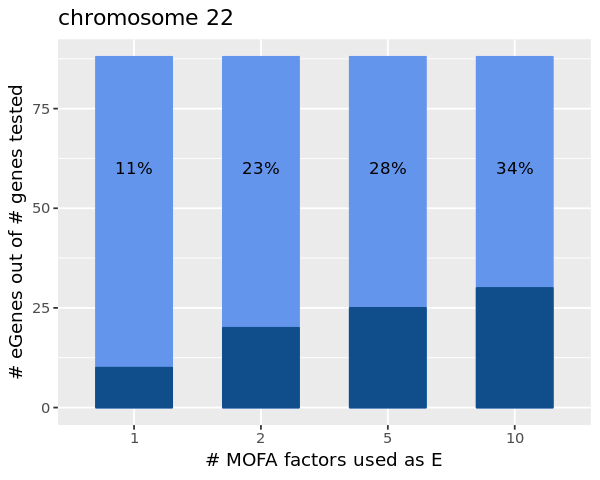

In [17]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_mofa), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_mofa), y = n_egenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=60, label= paste0(round(df$ratio[1],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=2, y=60, label= paste0(round(df$ratio[2],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=3, y=60, label= paste0(round(df$ratio[3],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=4, y=60, label= paste0(round(df$ratio[4],digits=2)*100,"%"), size = 3.5, col = "black")

In [33]:
mydir = paste0(mydir_all, prefixes[4])
mydir

[1] "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/10mofa_factors_endo_eqtl_permuteE_within_donors/"

In [34]:
res = read.csv(paste0(mydir,'summary_endo_eqtl.csv'), row.names = 1)

In [35]:
# genes_mofa1 = unique(as.character(res[res$pv_adj < 0.1,'gene']))
# genes_mofa2 = unique(as.character(res[res$pv_adj < 0.1,'gene']))
# genes_mofa5 = unique(as.character(res[res$pv_adj < 0.1,'gene']))
genes_mofa10 = unique(as.character(res[res$pv_adj < 0.1,'gene']))

In [46]:
head(genes_mofa5)
length(genes_mofa5[genes_mofa5 %in% genes_mofa10])

[1] "ENSG00000189306_RRP7A"    "ENSG00000128394_APOBEC3F"
[3] "ENSG00000183569_SERHL2"   "ENSG00000184117_NIPSNAP1"
[5] "ENSG00000100162_CENPM"    "ENSG00000214076_CPSF1P1"

[1] 25

In [49]:
head(list.files(mydir,"ENS"))

[1] "ENSG00000075234_TTC38_perm0.tsv"  "ENSG00000075234_TTC38_perm1.tsv" 
[3] "ENSG00000075234_TTC38_perm10.tsv" "ENSG00000075234_TTC38_perm11.tsv"
[5] "ENSG00000075234_TTC38_perm12.tsv" "ENSG00000075234_TTC38_perm13.tsv"

In [53]:
genes = unique(as.character(read.csv(paste0(mydir,'summary_endo_eqtl.csv'), row.names = 1)[['gene']]))
length(genes) 

[1] 88

In [54]:
for (gene in genes[1]){
    myfiles = list.files(mydir,"ENSG")[grep(gene, list.files(mydir,"ENSG"))]
    print(myfiles)
}

  [1] "ENSG00000189306_RRP7A_perm0.tsv"  "ENSG00000189306_RRP7A_perm1.tsv" 
  [3] "ENSG00000189306_RRP7A_perm10.tsv" "ENSG00000189306_RRP7A_perm11.tsv"
  [5] "ENSG00000189306_RRP7A_perm12.tsv" "ENSG00000189306_RRP7A_perm13.tsv"
  [7] "ENSG00000189306_RRP7A_perm14.tsv" "ENSG00000189306_RRP7A_perm15.tsv"
  [9] "ENSG00000189306_RRP7A_perm16.tsv" "ENSG00000189306_RRP7A_perm17.tsv"
 [11] "ENSG00000189306_RRP7A_perm18.tsv" "ENSG00000189306_RRP7A_perm19.tsv"
 [13] "ENSG00000189306_RRP7A_perm2.tsv"  "ENSG00000189306_RRP7A_perm20.tsv"
 [15] "ENSG00000189306_RRP7A_perm21.tsv" "ENSG00000189306_RRP7A_perm22.tsv"
 [17] "ENSG00000189306_RRP7A_perm23.tsv" "ENSG00000189306_RRP7A_perm24.tsv"
 [19] "ENSG00000189306_RRP7A_perm25.tsv" "ENSG00000189306_RRP7A_perm26.tsv"
 [21] "ENSG00000189306_RRP7A_perm27.tsv" "ENSG00000189306_RRP7A_perm28.tsv"
 [23] "ENSG00000189306_RRP7A_perm29.tsv" "ENSG00000189306_RRP7A_perm3.tsv" 
 [25] "ENSG00000189306_RRP7A_perm30.tsv" "ENSG00000189306_RRP7A_perm31.tsv"
 [27] "ENSG0

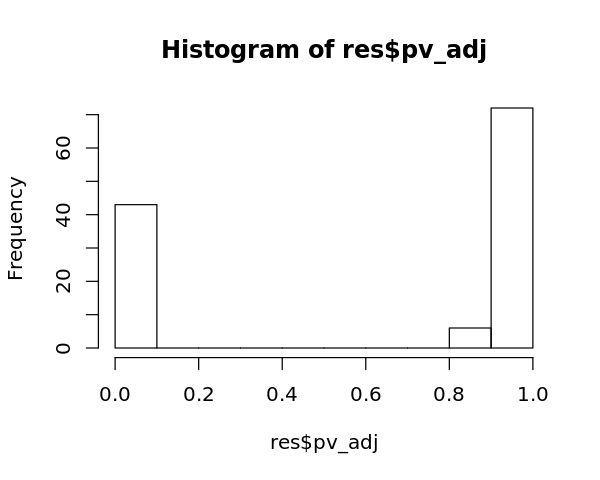

In [45]:
hist(res$pv_adj)

In [6]:
# df = data.frame()
# for (file in myfiles){
#     myfile = read.csv(paste0(mydir,file), sep = "\t", row.names = 1)
#     myfile$gene = gsub("_perm.*","",file)
#     myfile$perm = gsub(".*_perm","perm",gsub(".tsv","",file))
#     df = rbind(df,myfile)
# }
nrow(df)
head(df)

[1] 11011

chrom pv        variant         gene                  perm  
0  22    0.9121013 22_46719054_T_C ENSG00000075234_TTC38 perm0 
01 22    0.8079607 22_46719054_T_C ENSG00000075234_TTC38 perm1 
02 22    0.7040557 22_46719054_T_C ENSG00000075234_TTC38 perm10
03 22    0.2383244 22_46719054_T_C ENSG00000075234_TTC38 perm11
04 22    0.7959760 22_46719054_T_C ENSG00000075234_TTC38 perm12
05 22    0.7492073 22_46719054_T_C ENSG00000075234_TTC38 perm13

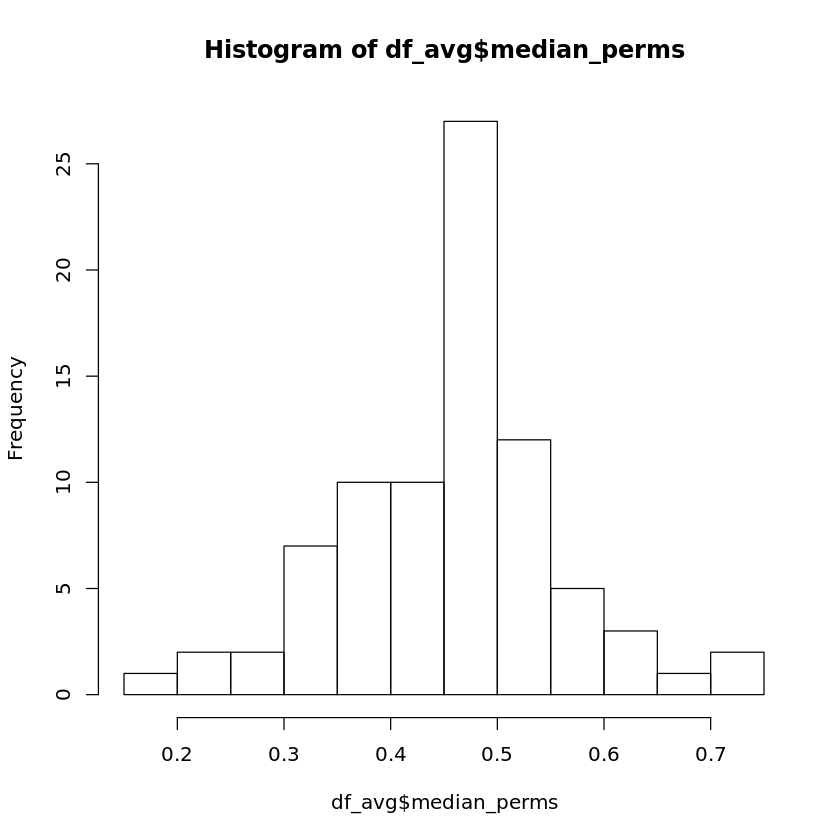

In [7]:
df_avg = df %>% group_by(gene) %>% summarise(mean_perms = mean(pv), median_perms = median(pv),
                                            min_perms = min(pv), max_perms = max(pv))
hist(df_avg$median_perms)

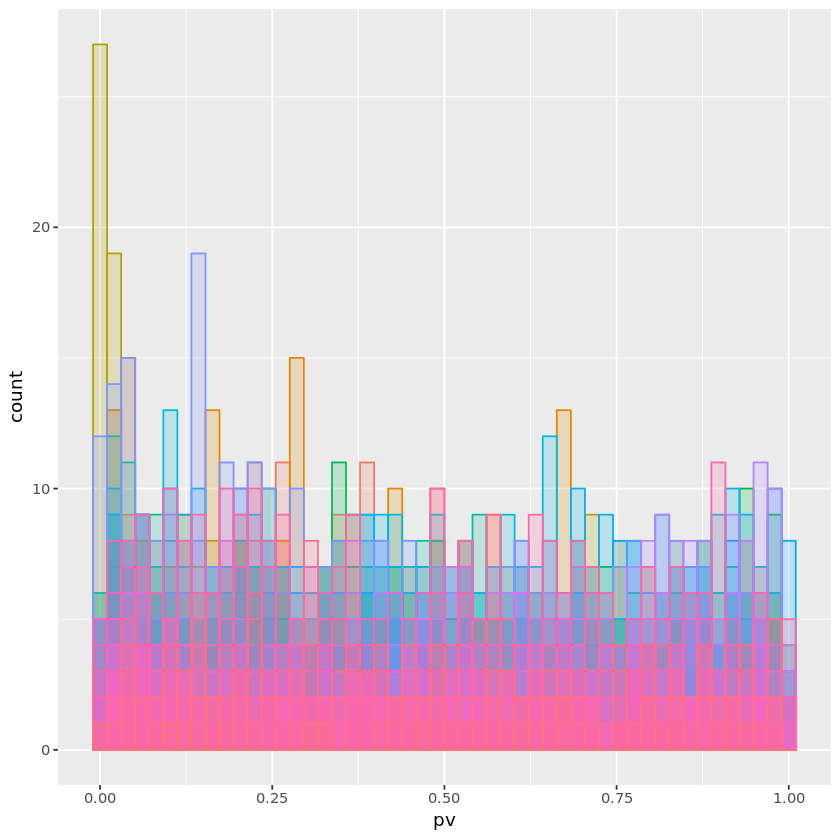

In [16]:
p = ggplot(df, aes(x = pv)) 
p + geom_histogram(aes(color = gene, fill = gene), alpha = 0.2, position = "identity", bins = 50) + theme(legend.position = "none")

In [12]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv"
df0 = read.csv(filename, row.names = 1)
df0$variant = df0$snpID
head(df0)

gene                    n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A   3      0.0000000000 22_42896474_T_C 0.0000000000
1 ENSG00000189306_RRP7A   3      0.0000000000 22_42897414_A_C 0.0000000000
2 ENSG00000189306_RRP7A   3      0.0000000000 22_42903671_T_G 0.0000000000
3 ENSG00000196236_XPNPEP3 2      0.0050714742 22_41256802_A_G 0.0101429485
4 ENSG00000196236_XPNPEP3 2      0.0528781523 22_41394128_C_T 0.1057563046
5 ENSG00000185651_UBE2L3  1      0.0004395645 22_22077719_C_T 0.0004395645
  variant        
0 22_42896474_T_C
1 22_42897414_A_C
2 22_42903671_T_G
3 22_41256802_A_G
4 22_41394128_C_T
5 22_22077719_C_T

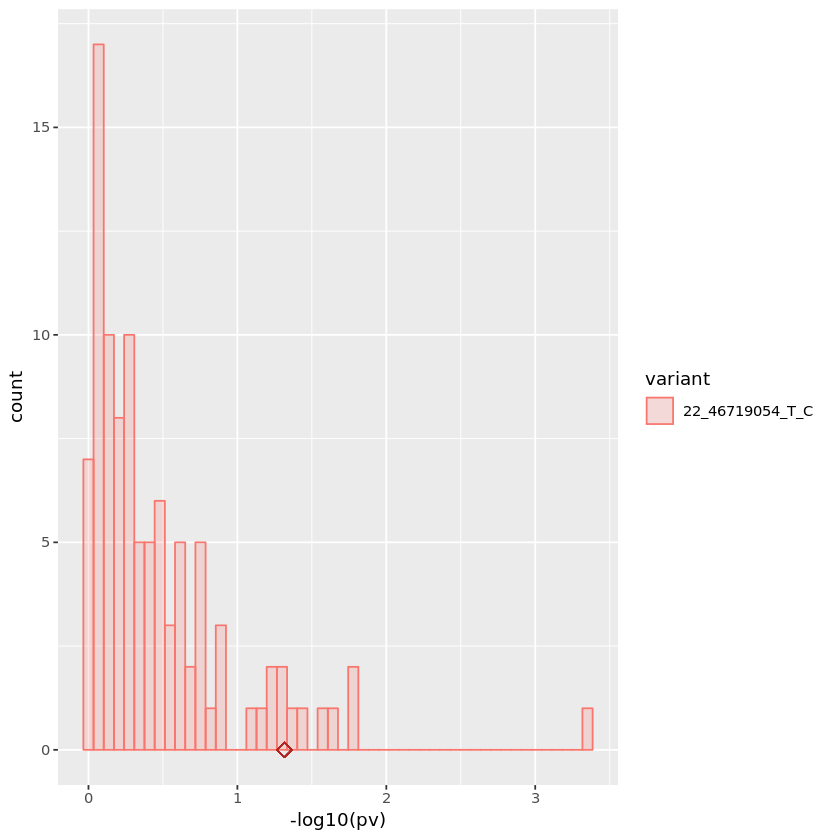

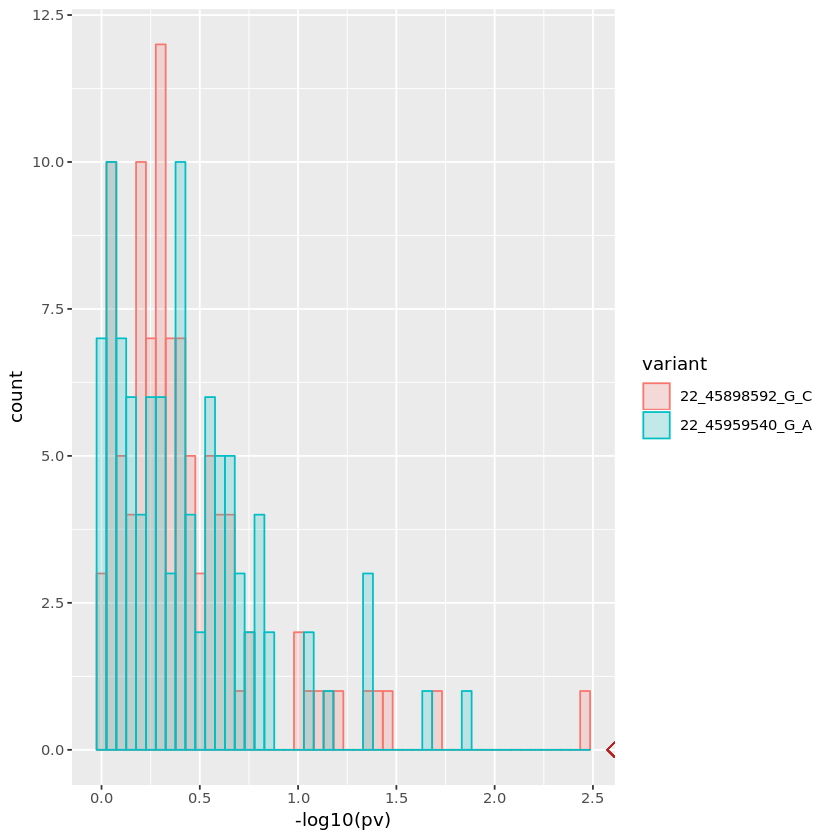

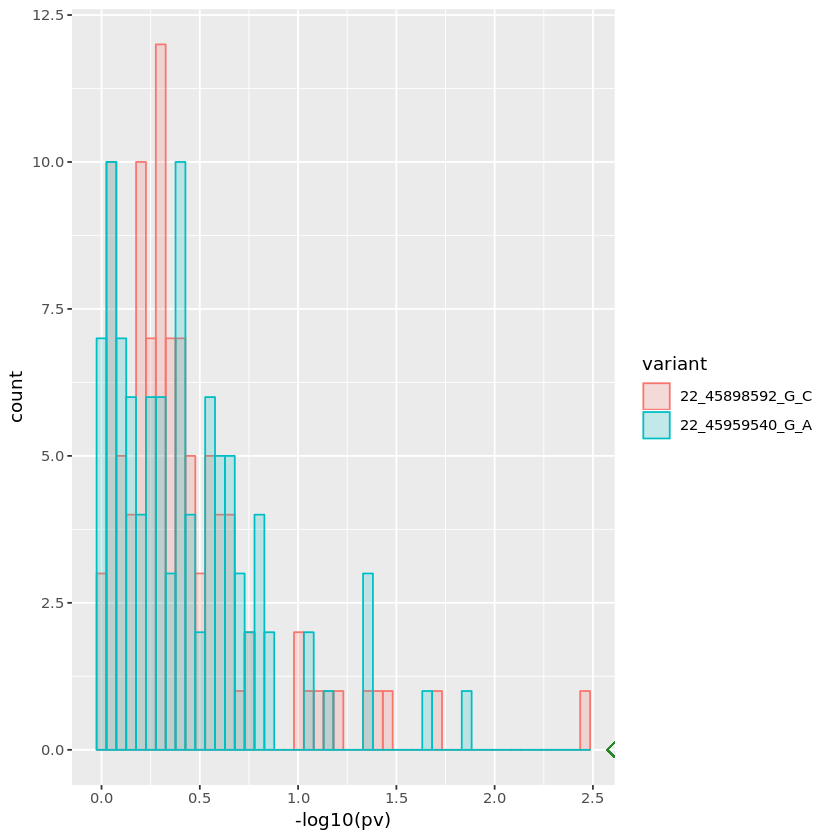

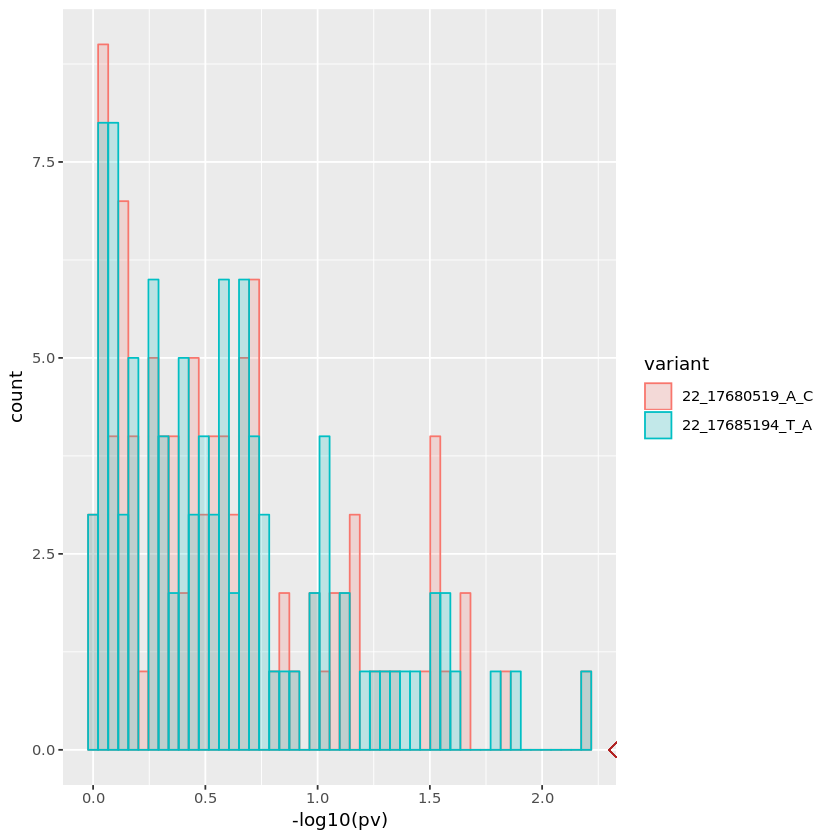

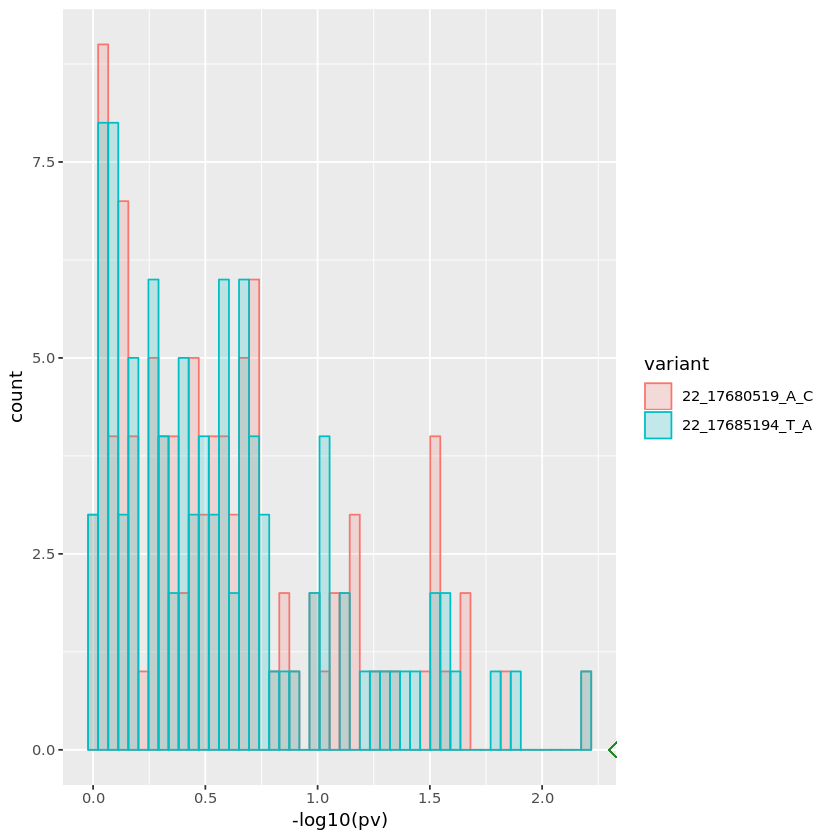

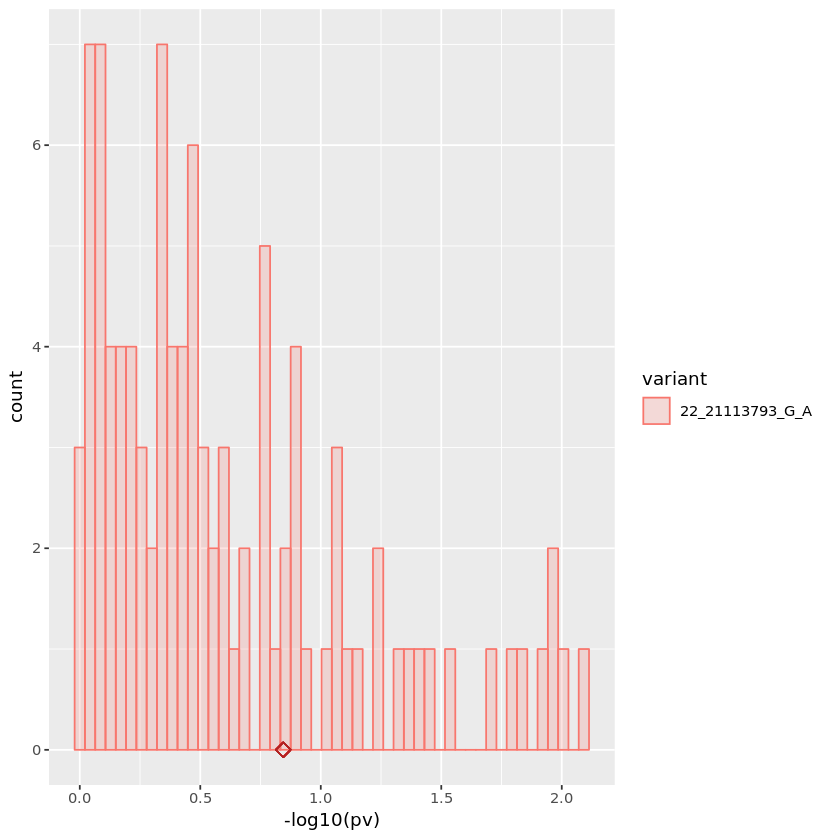

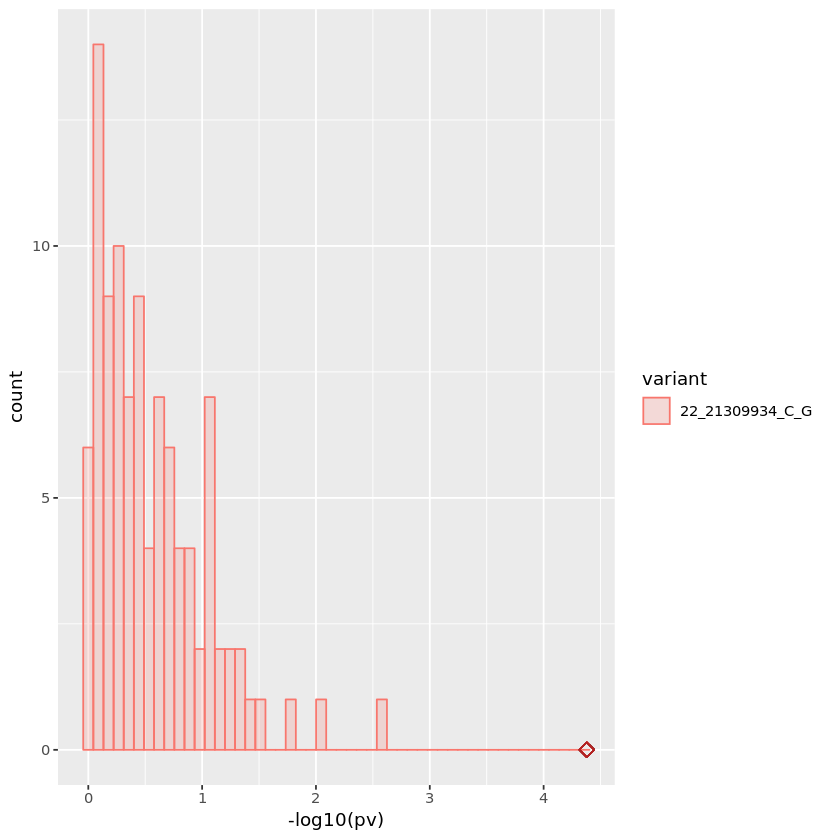

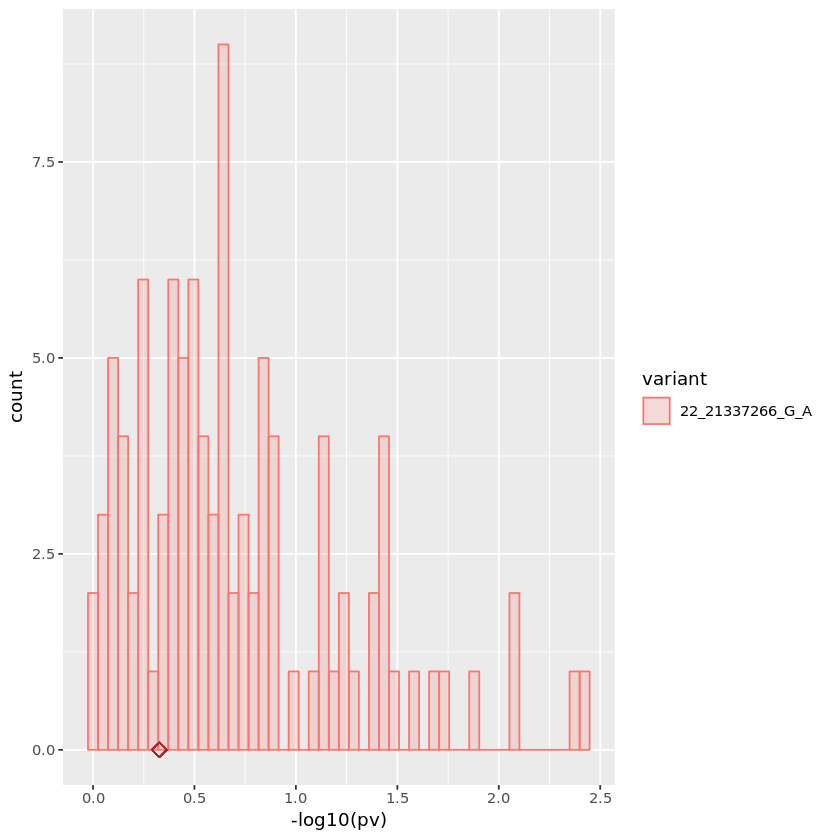

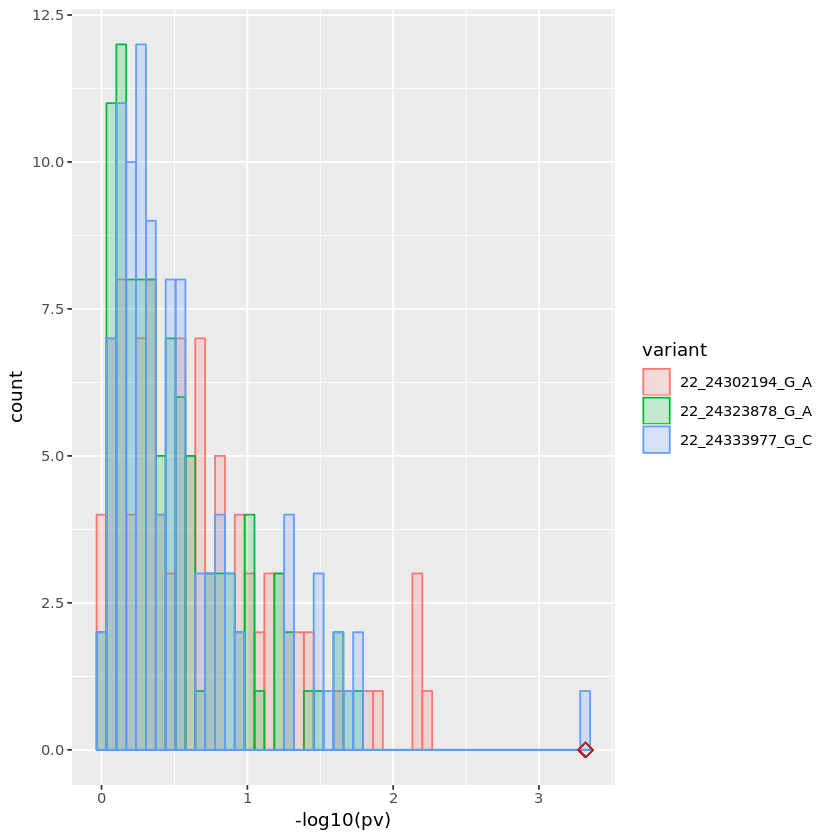

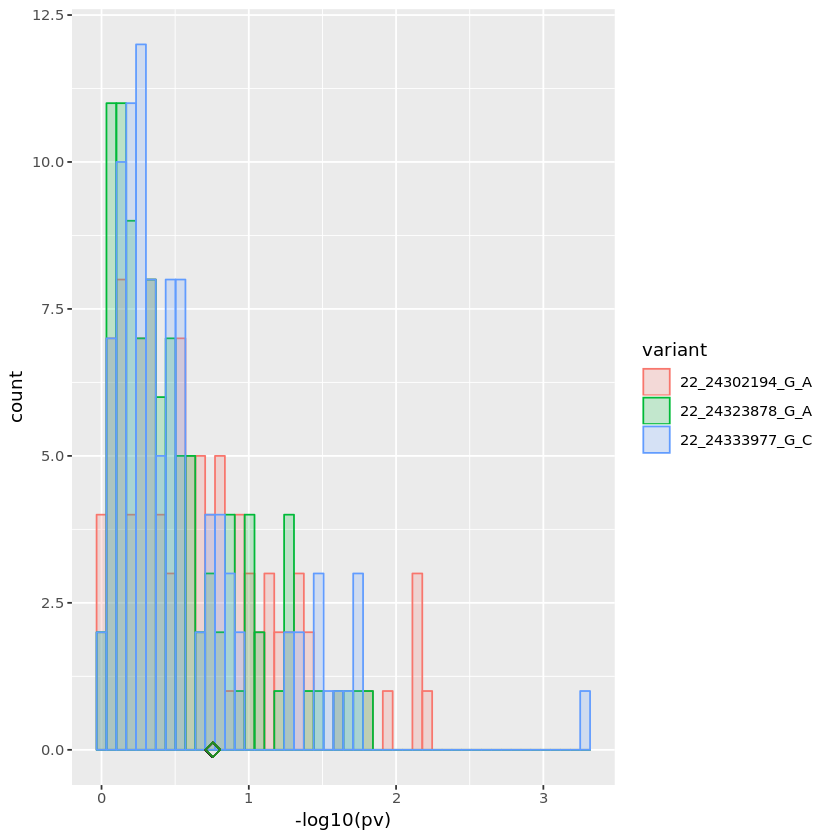

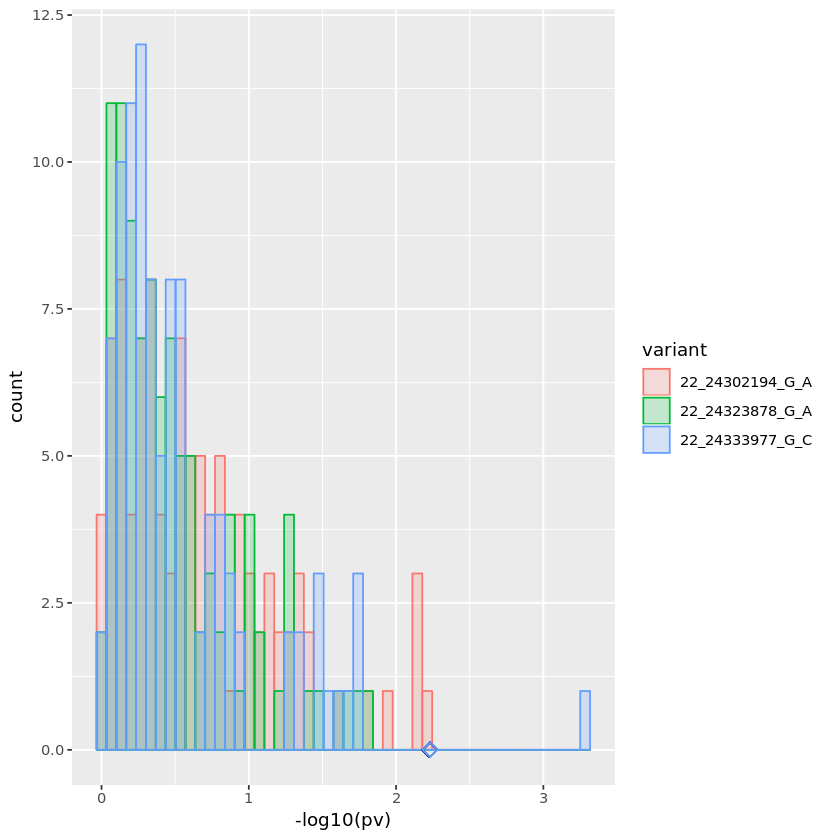

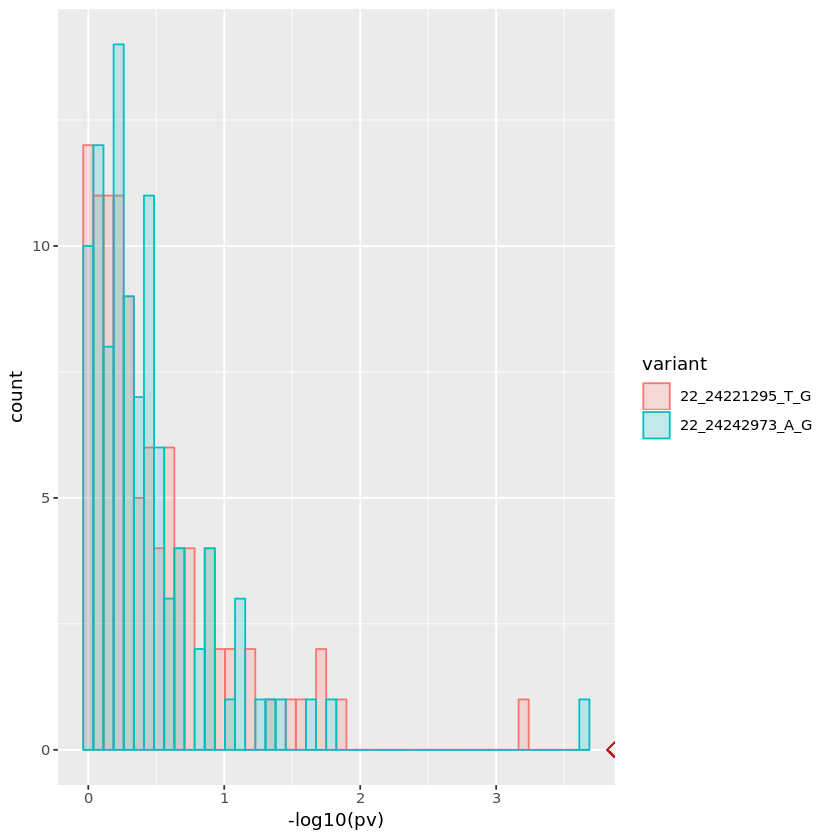

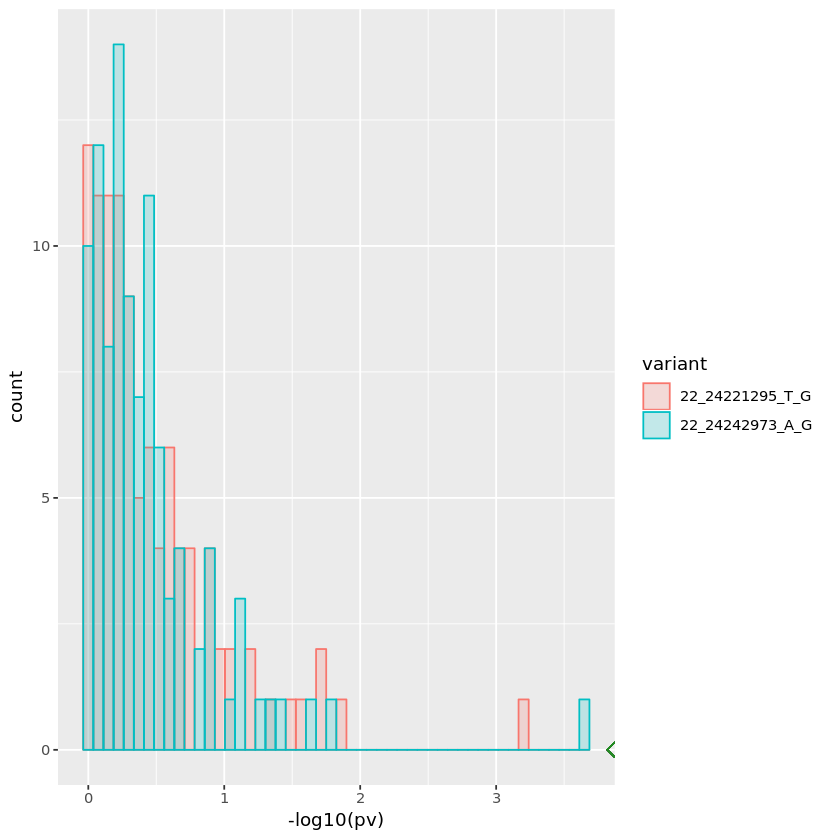

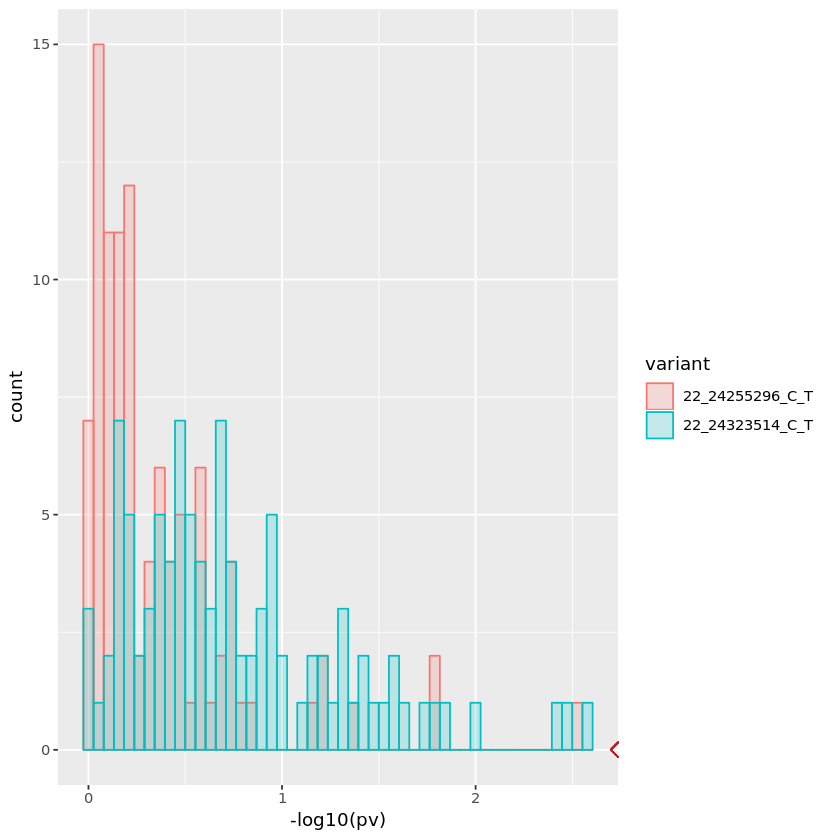

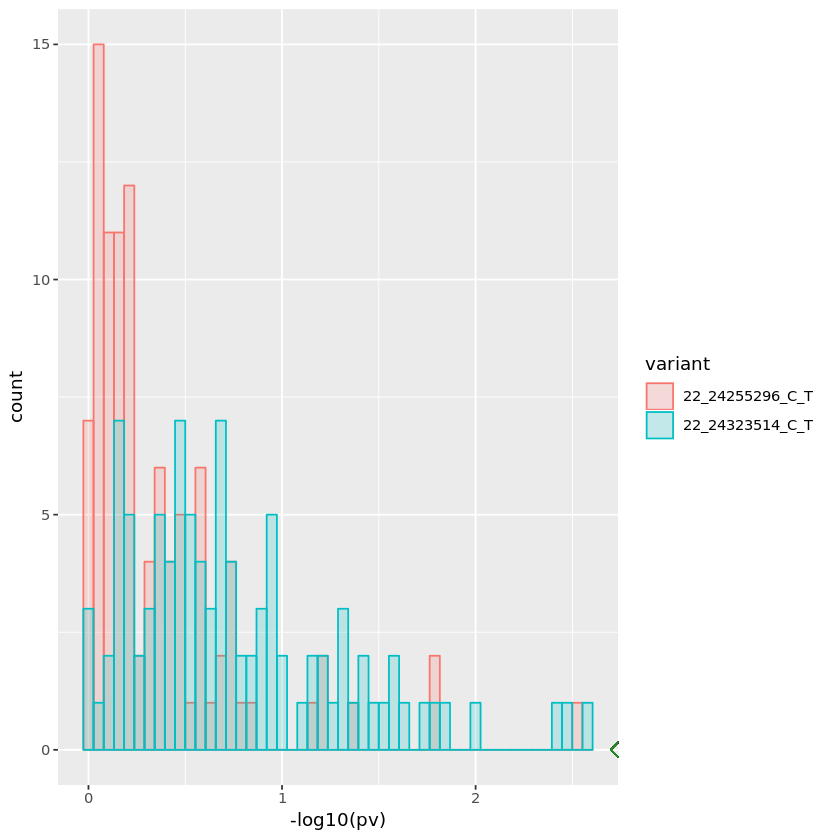

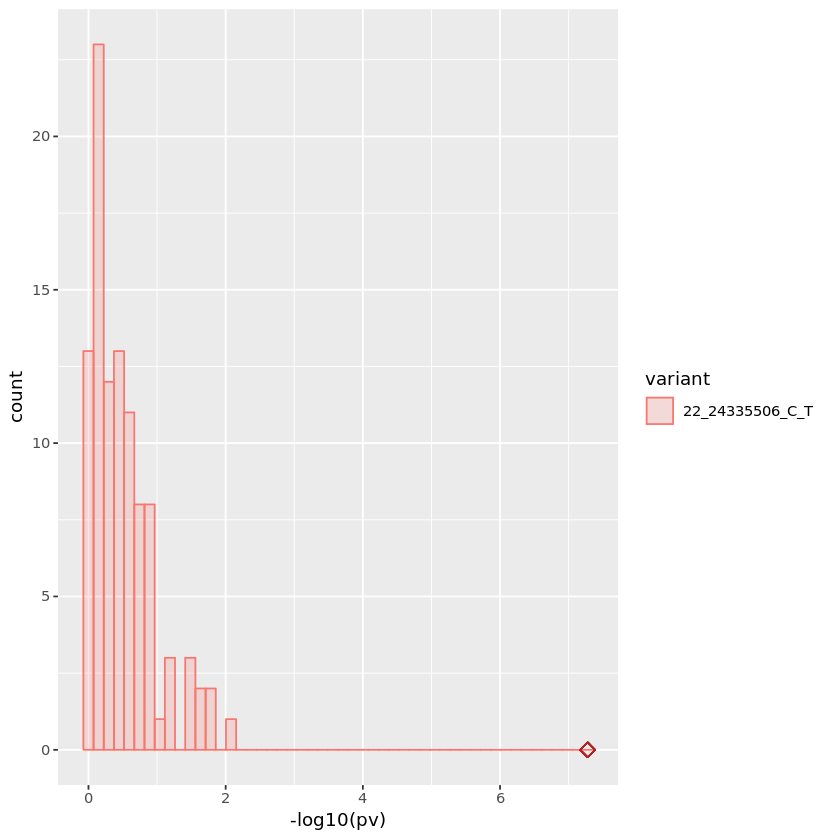

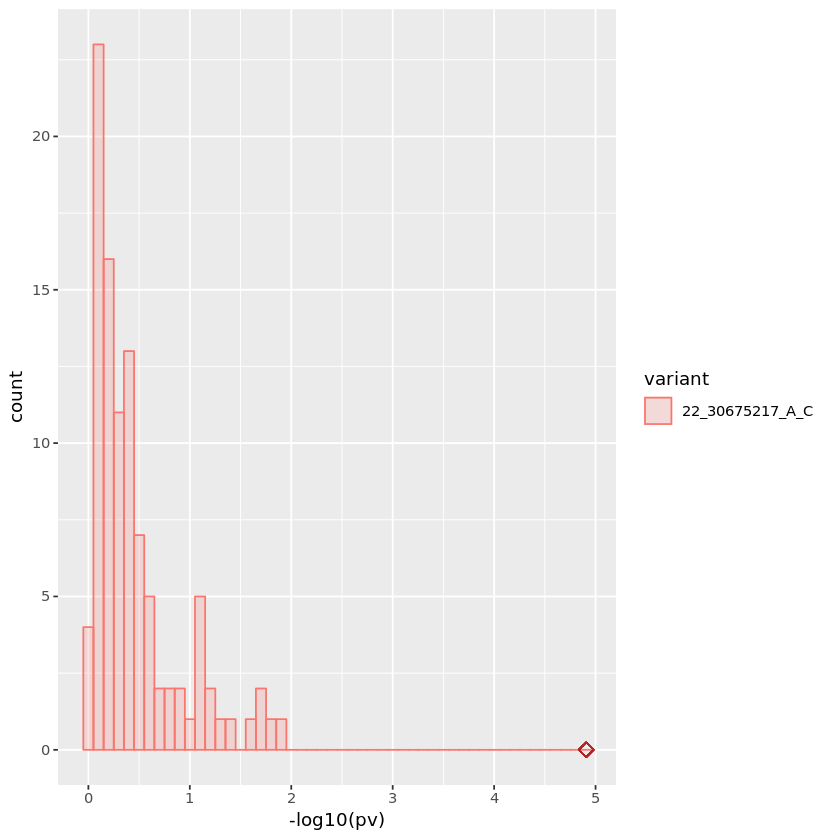

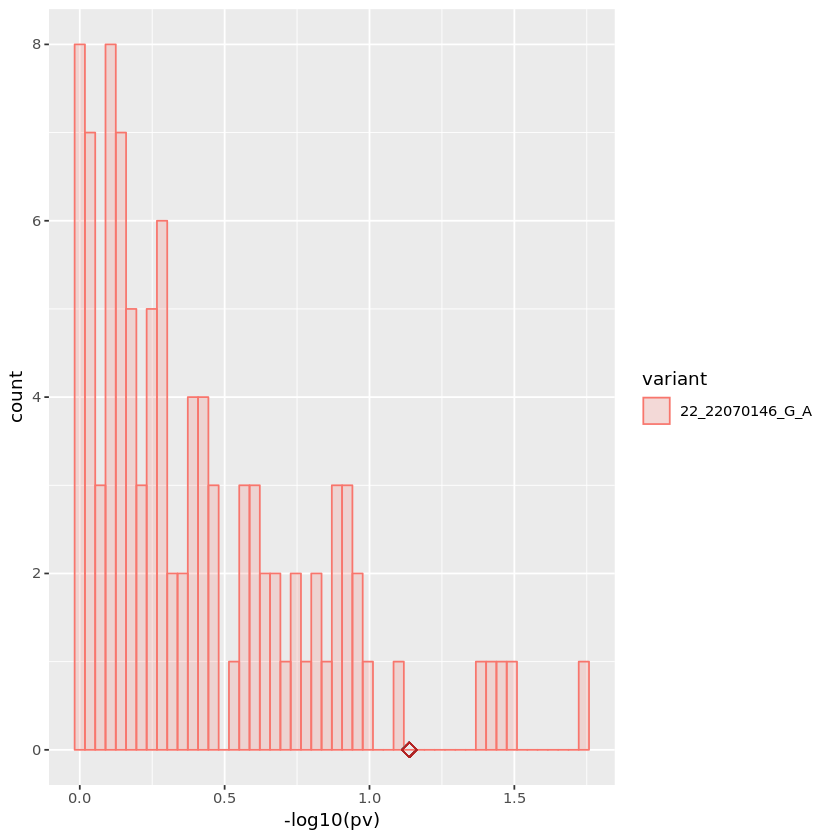

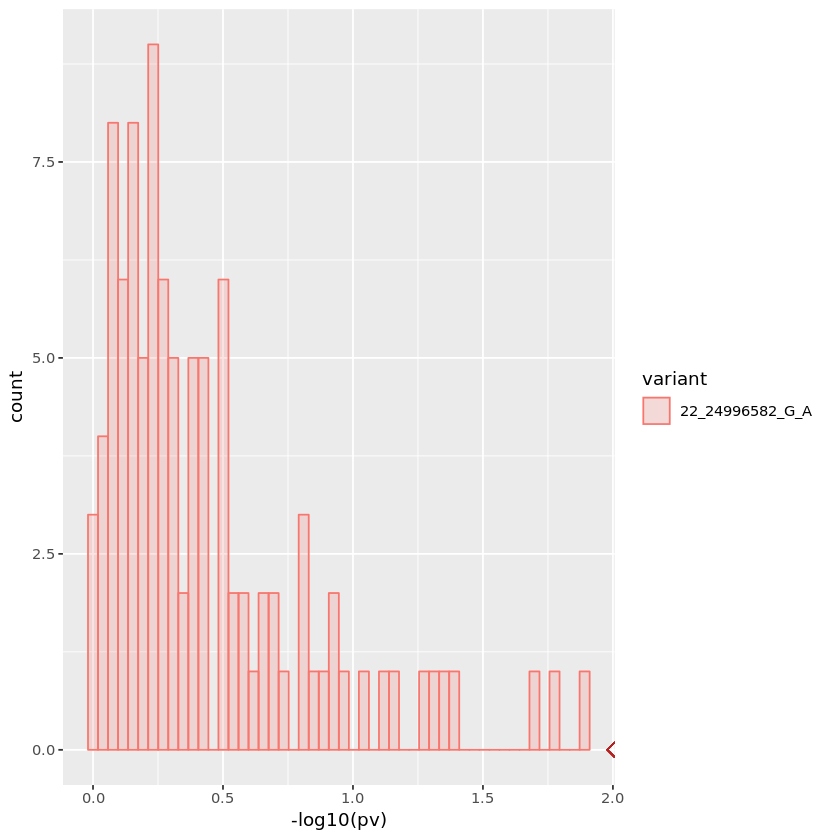

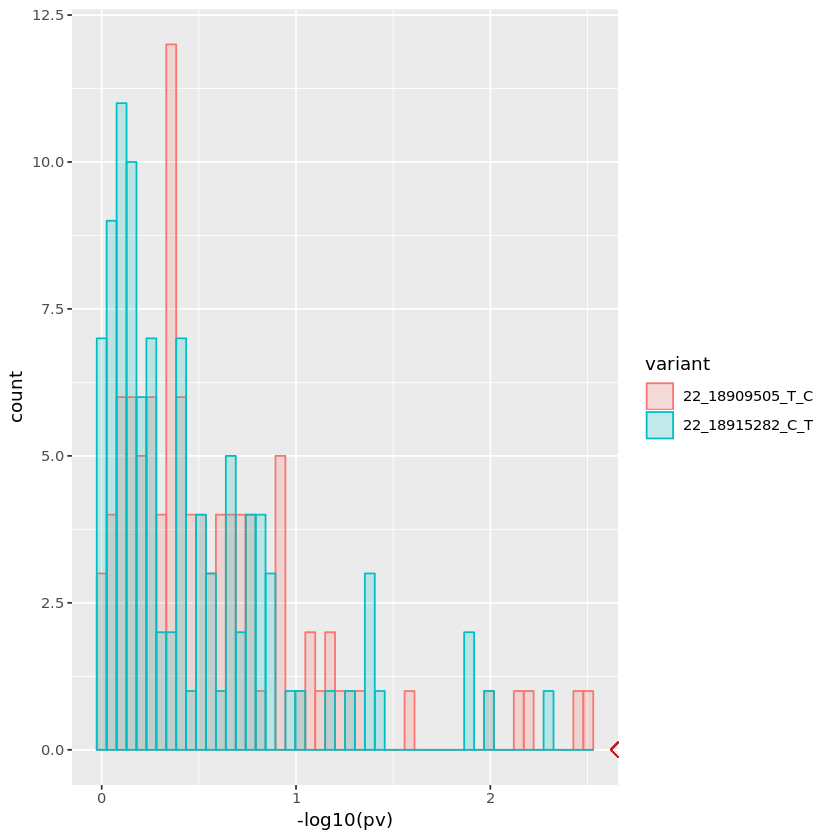

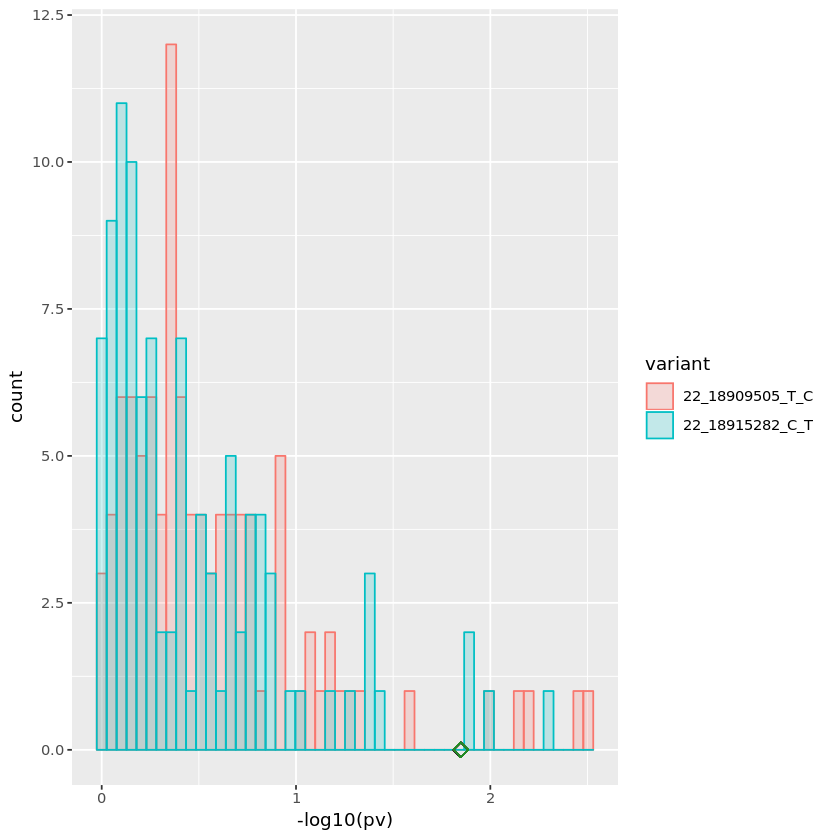

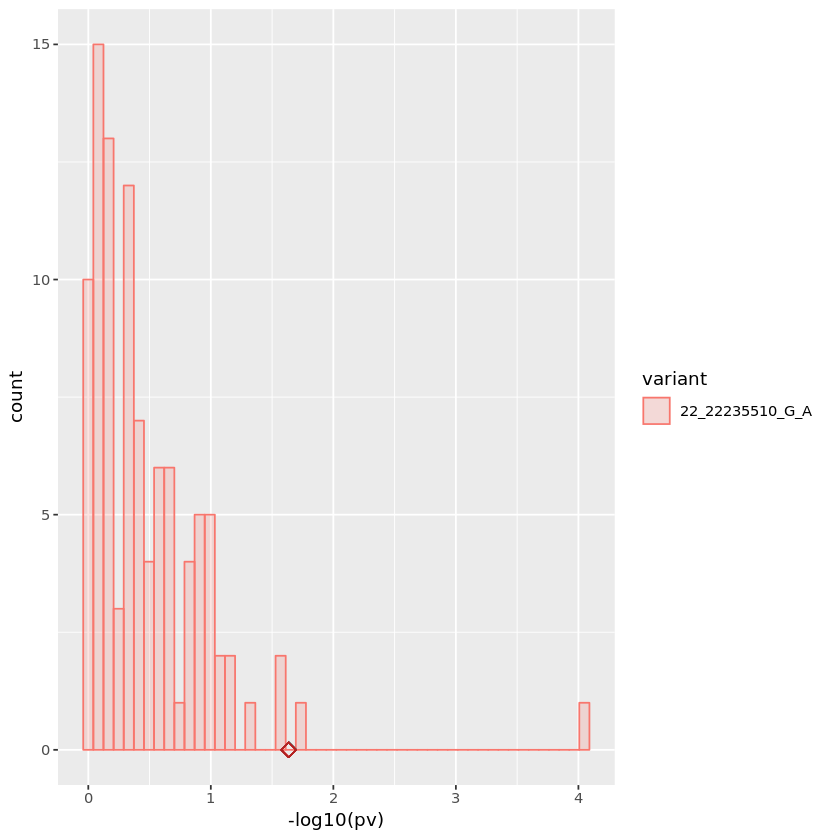

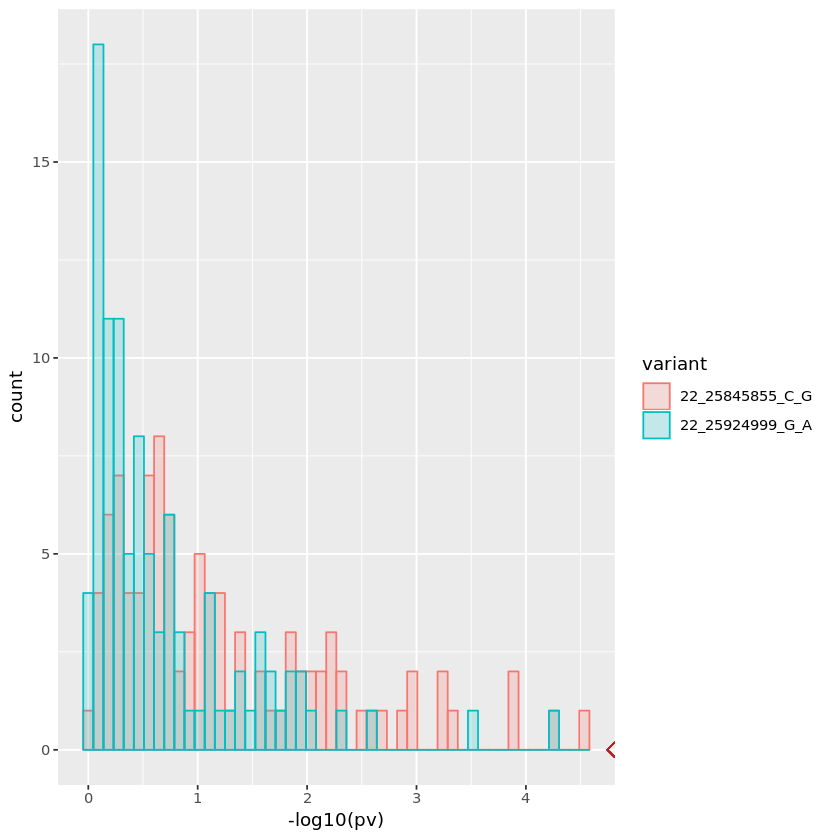

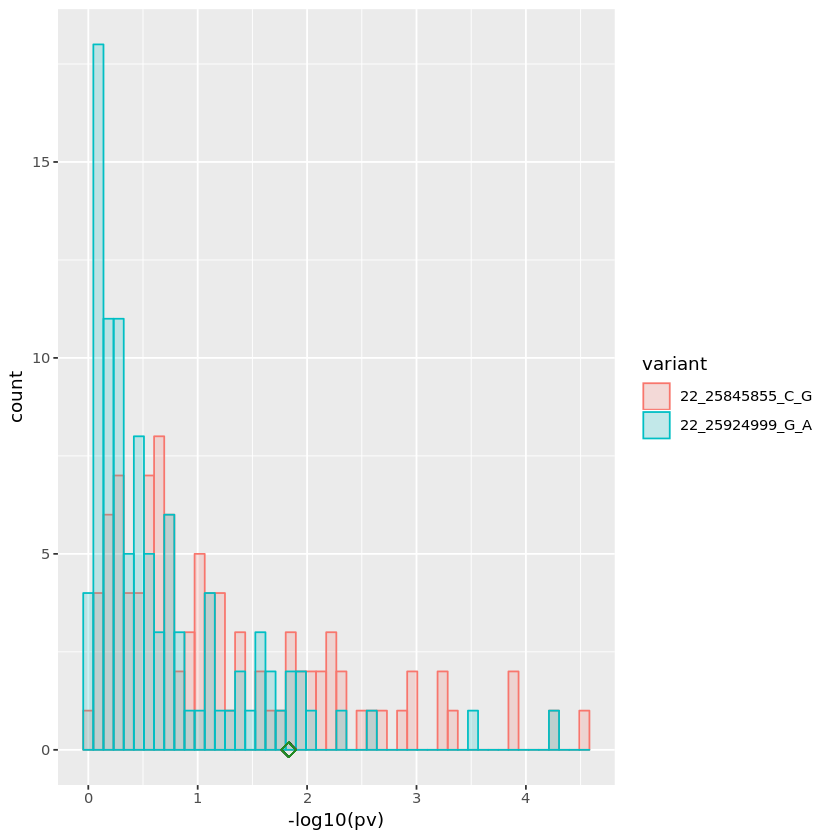

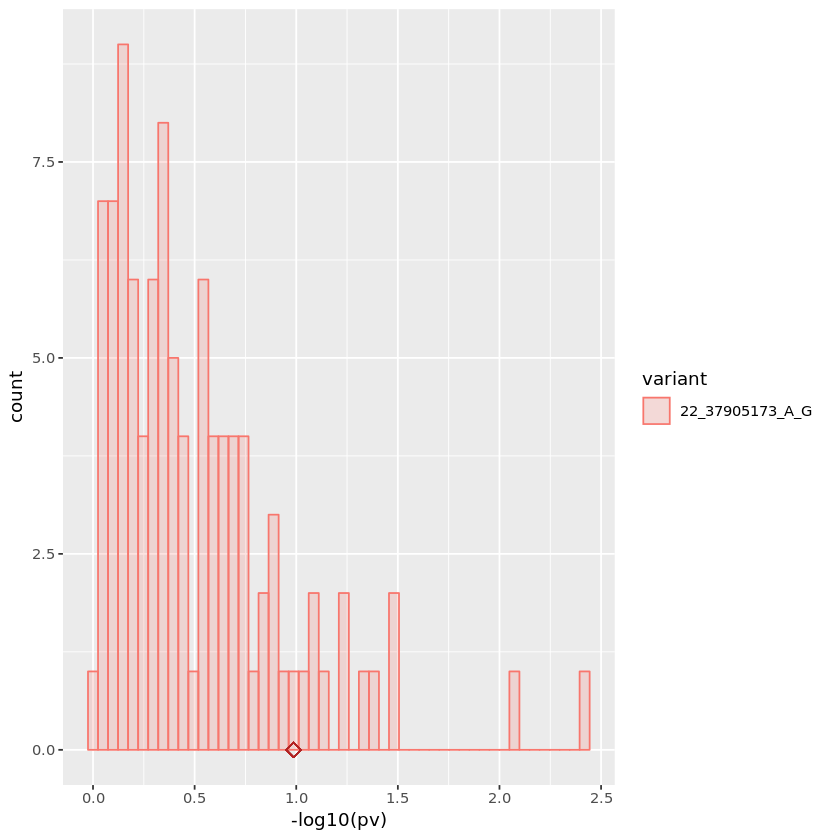

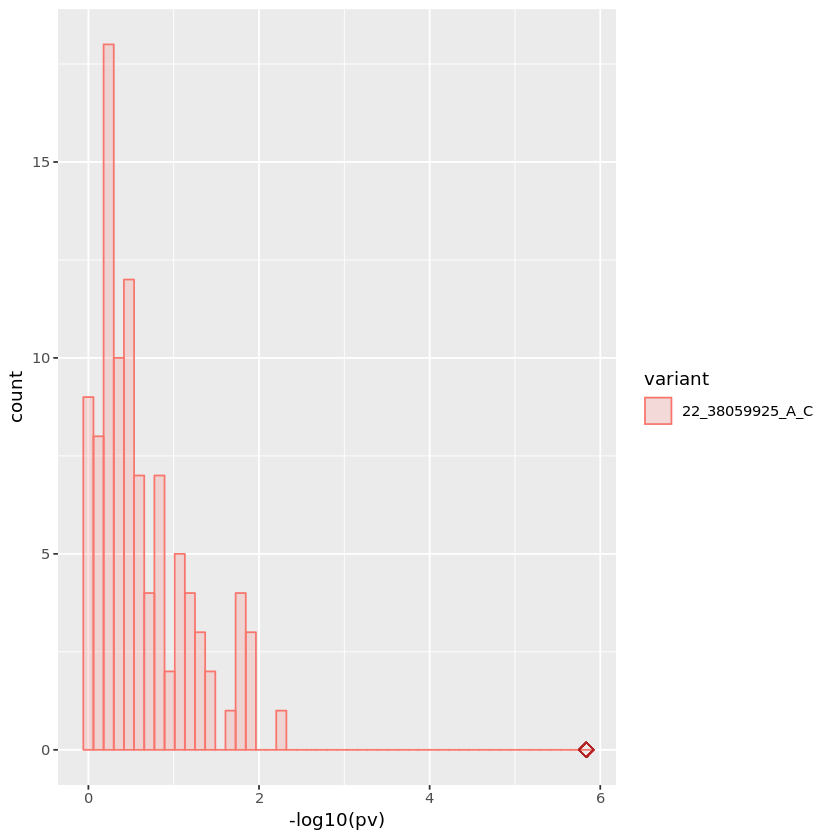

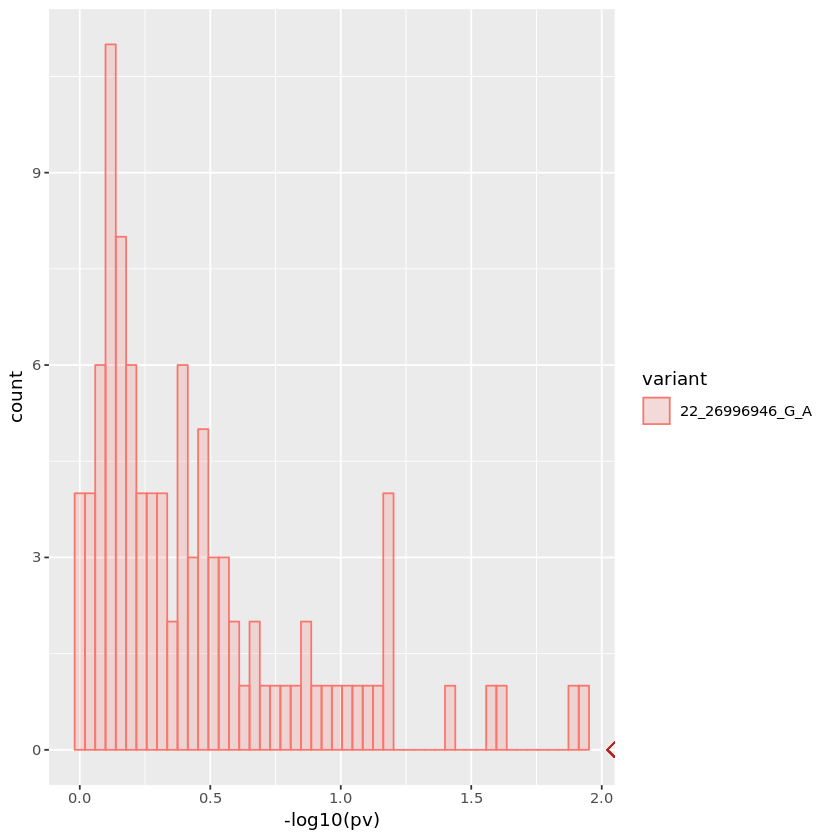

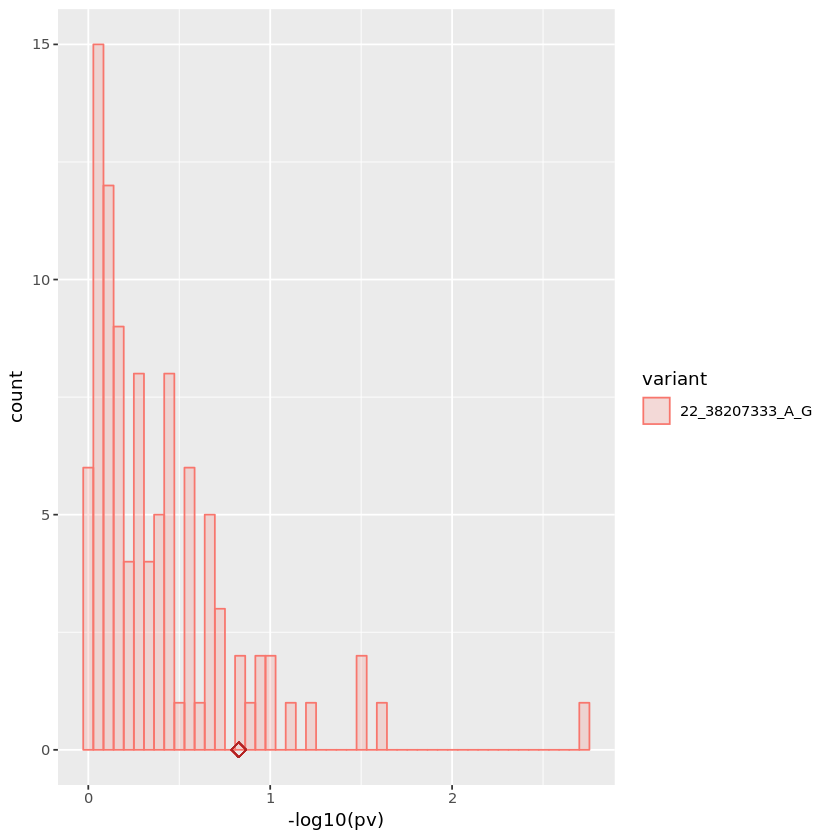

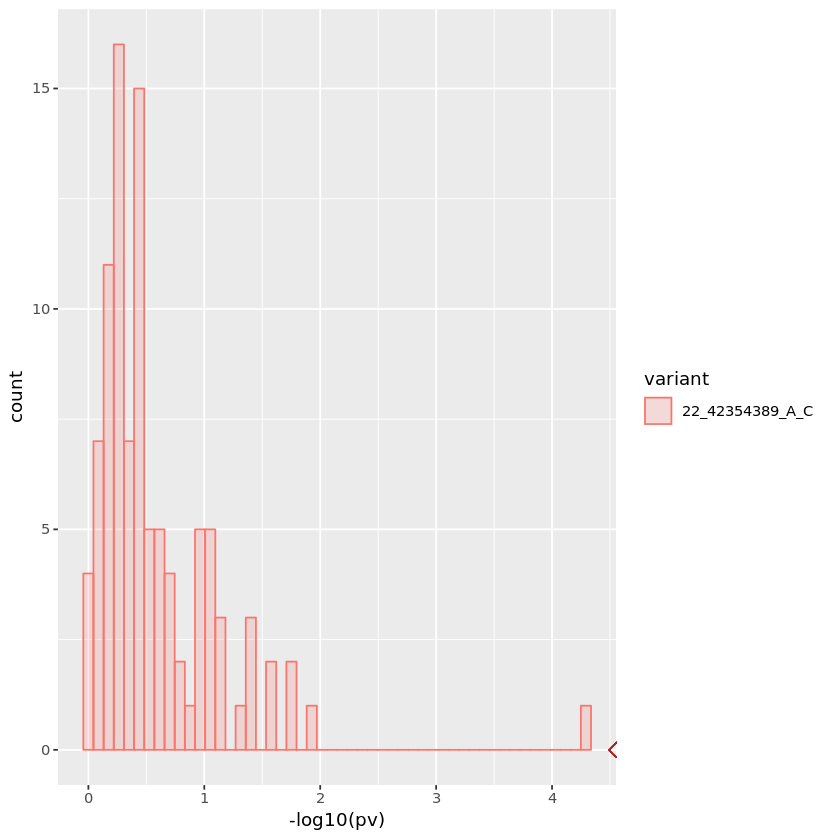

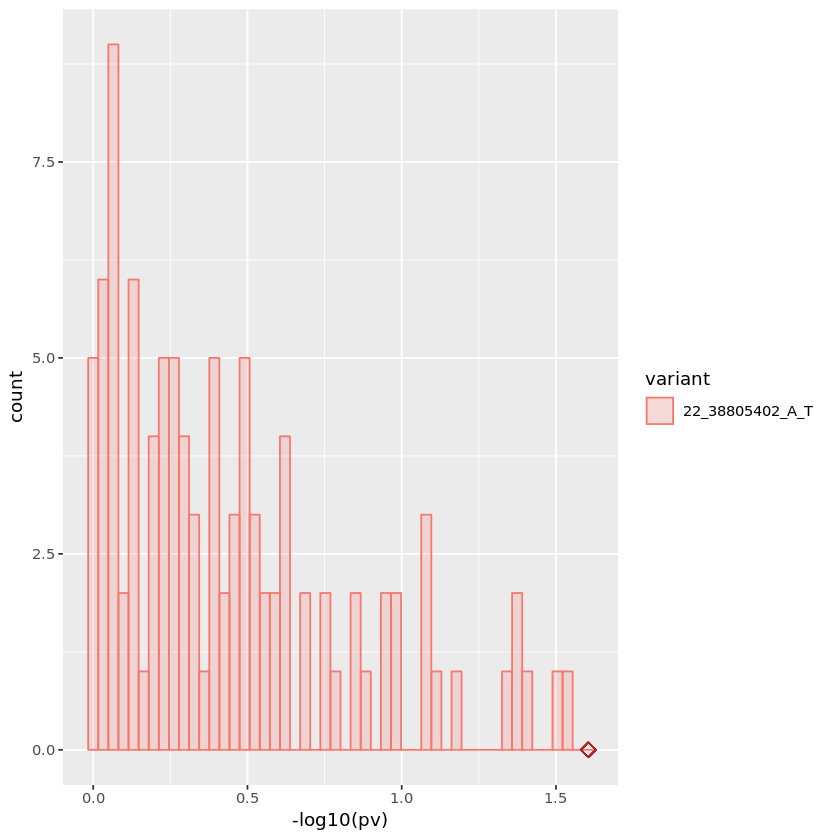

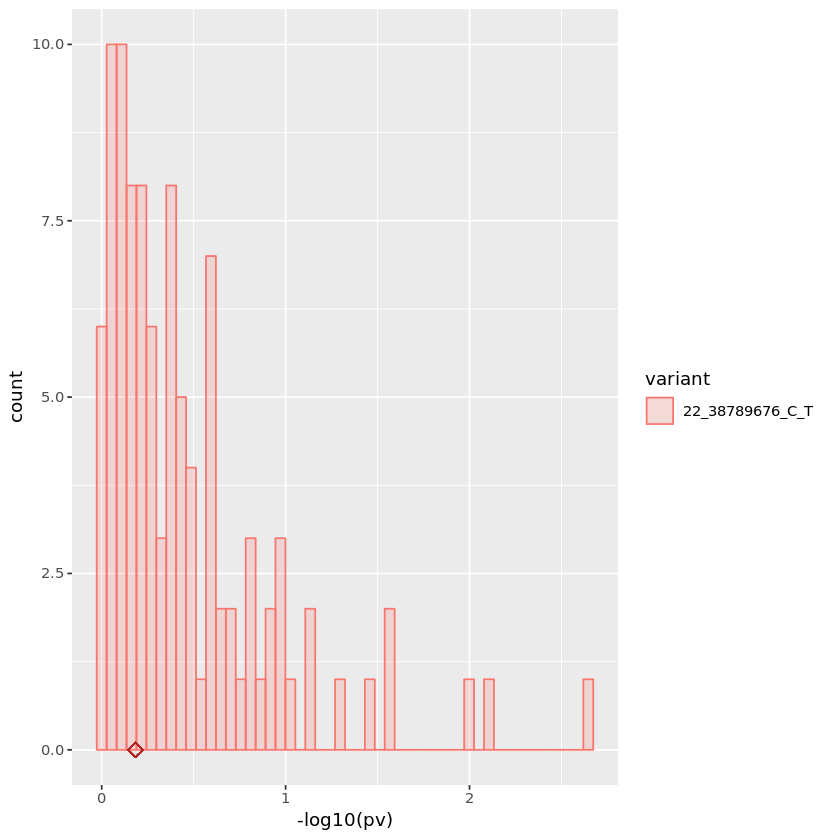

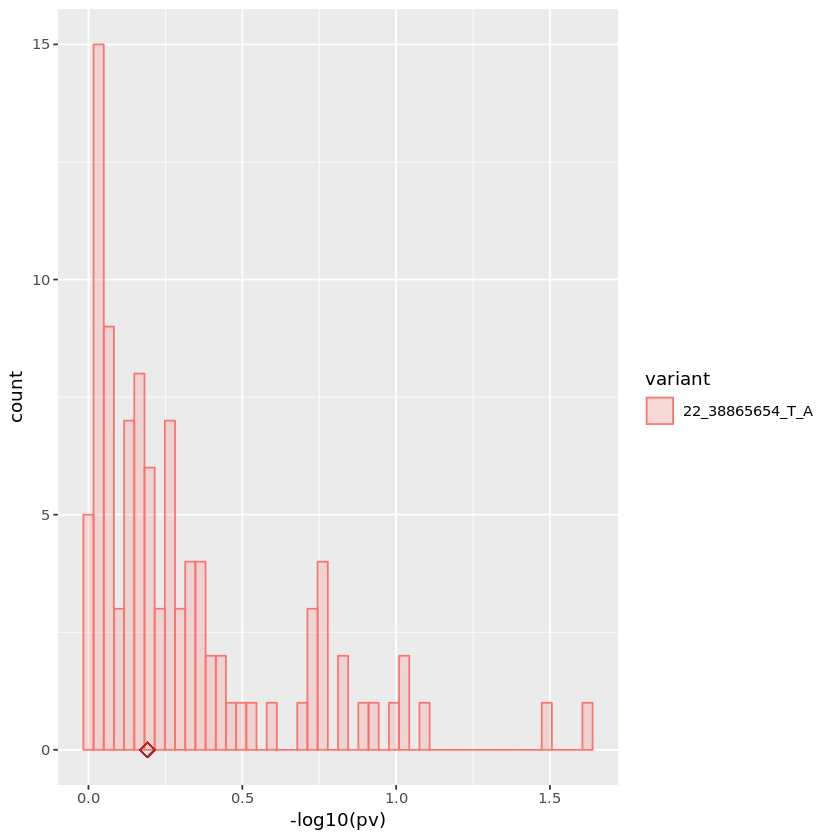

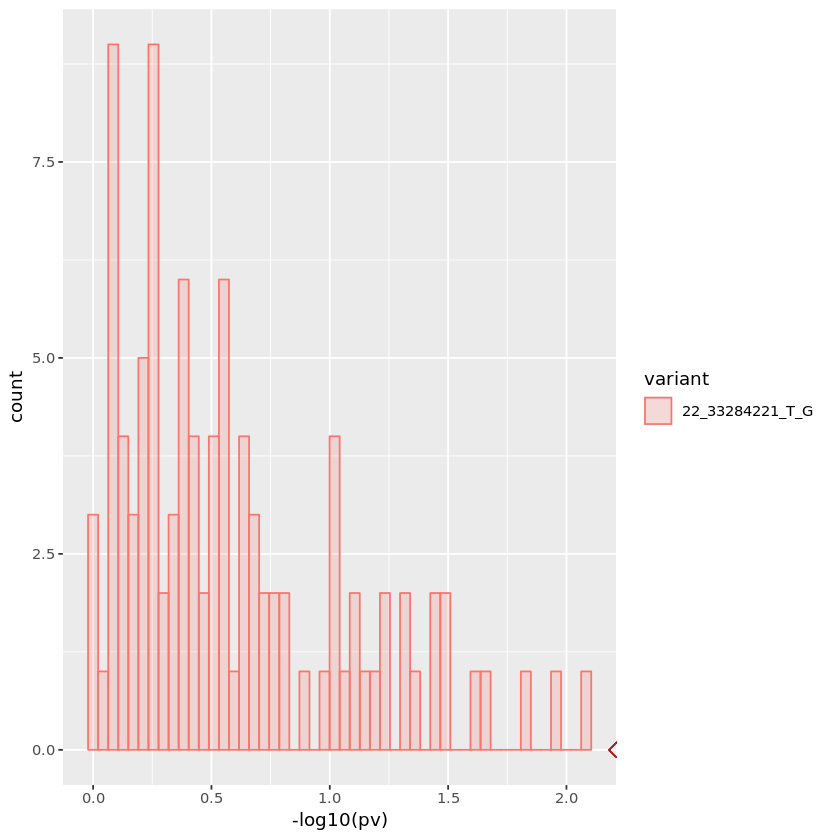

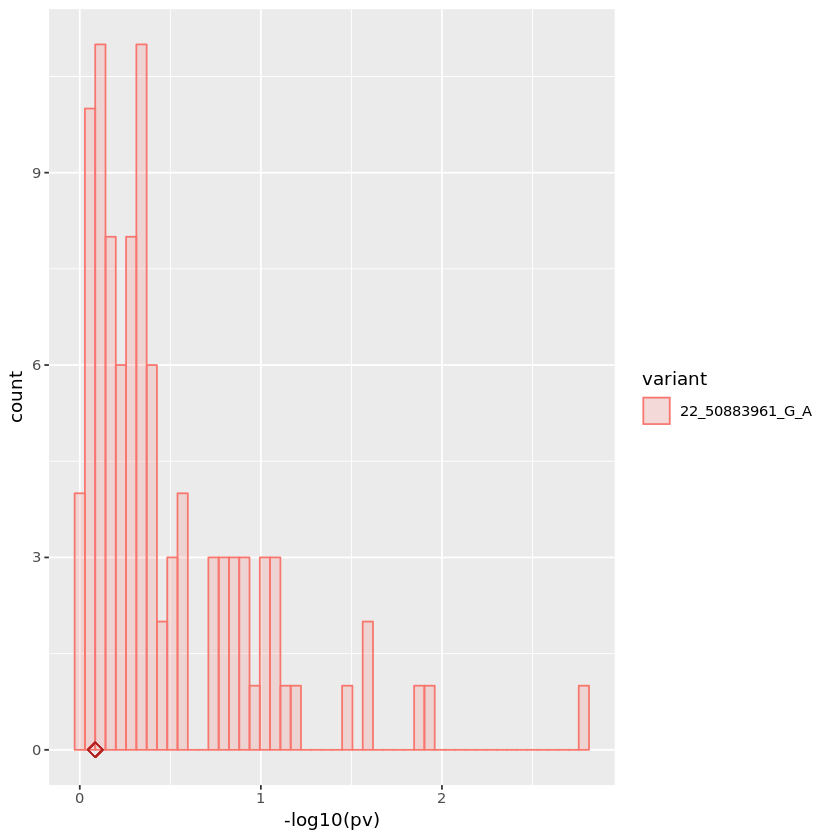

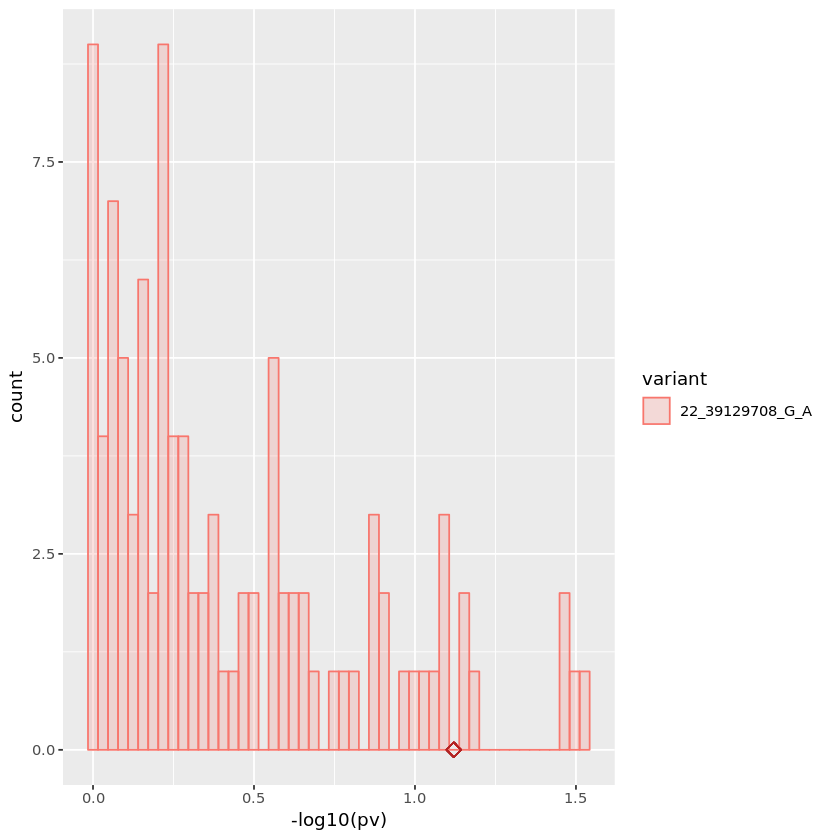

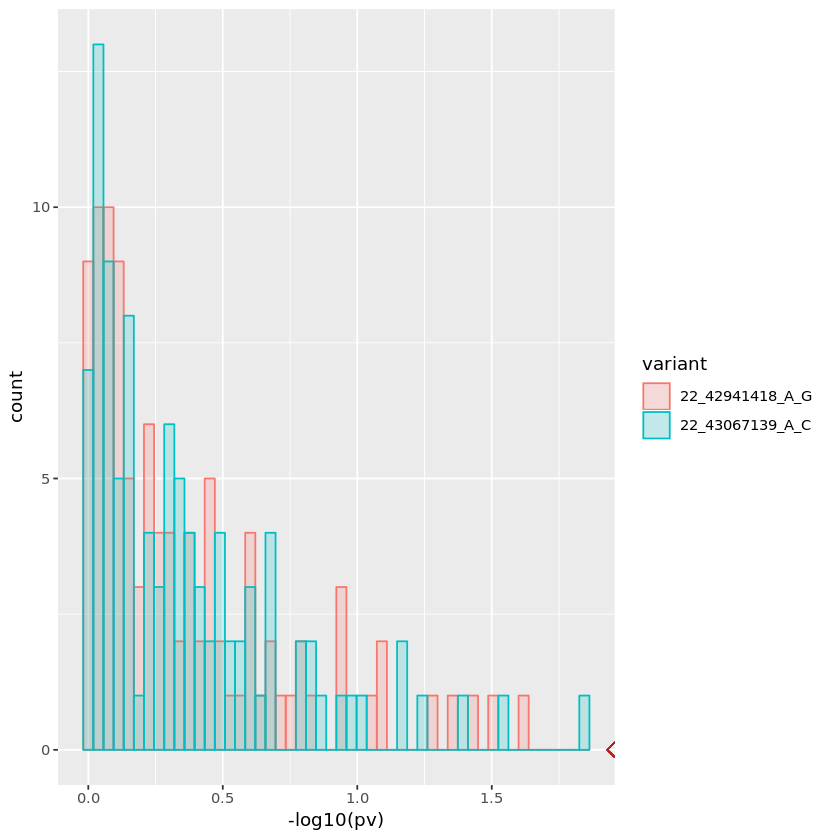

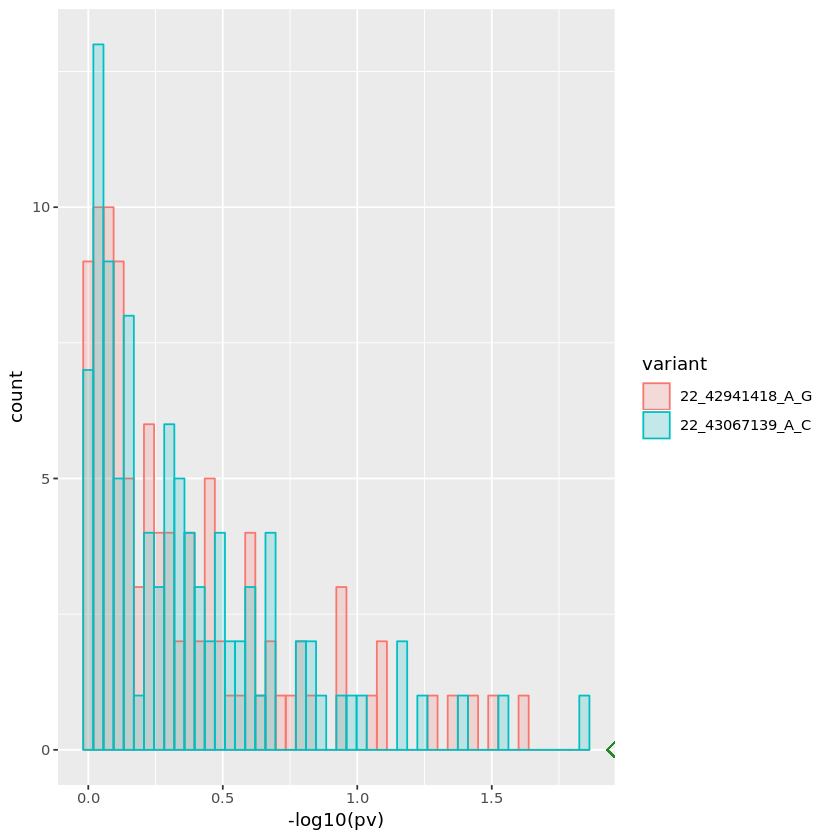

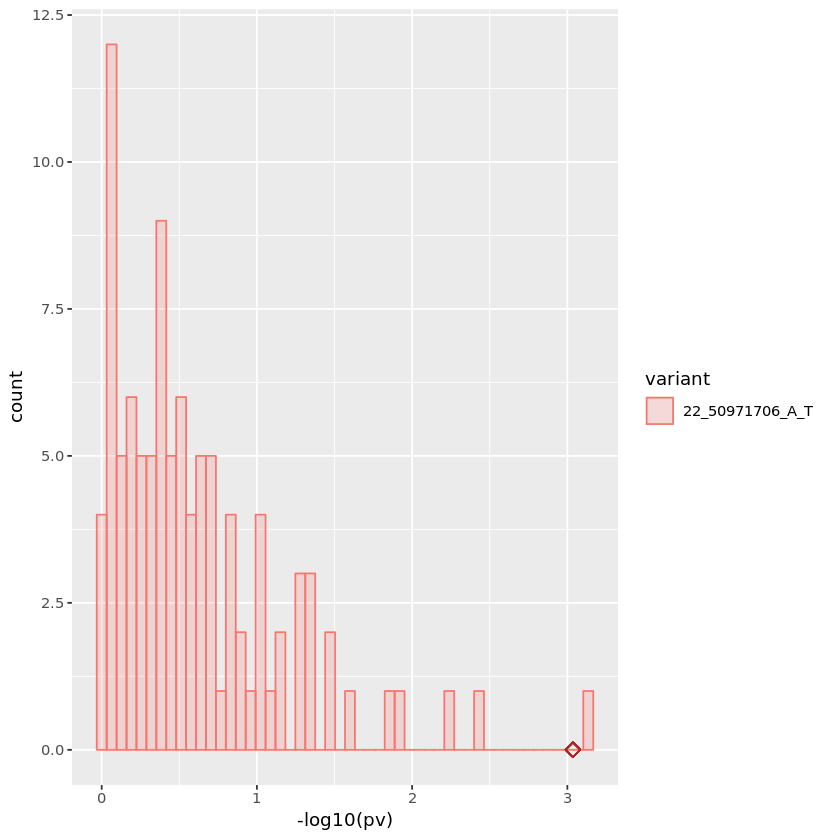

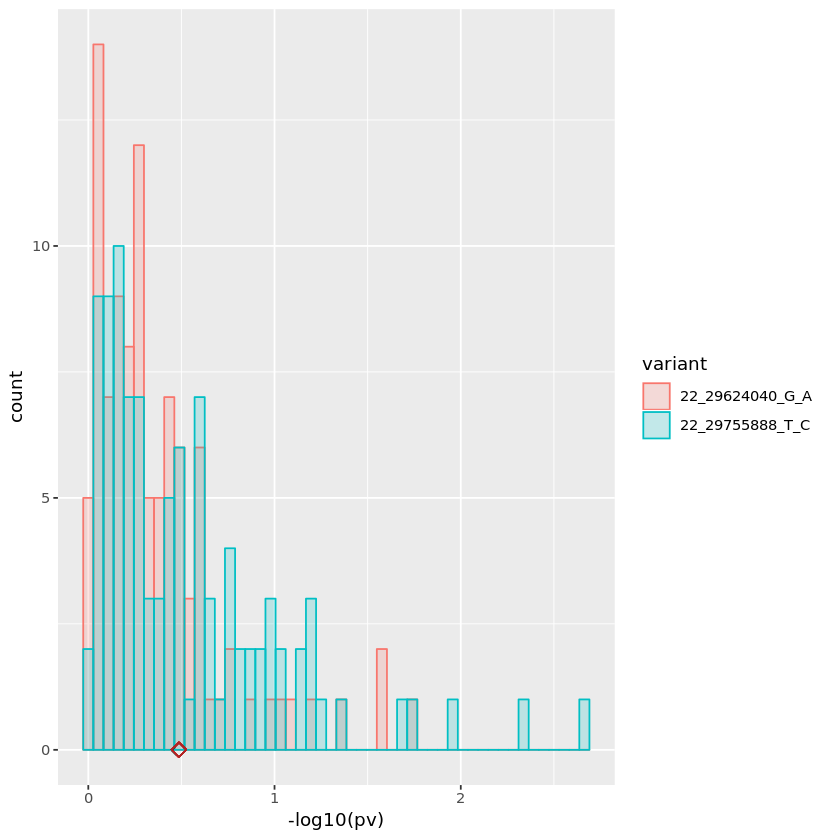

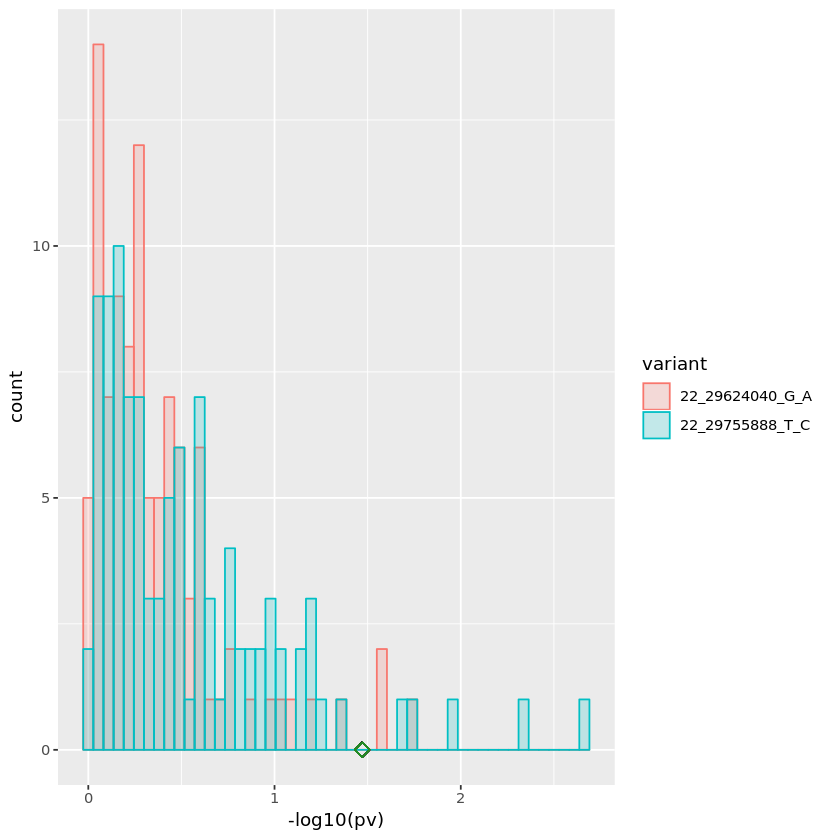

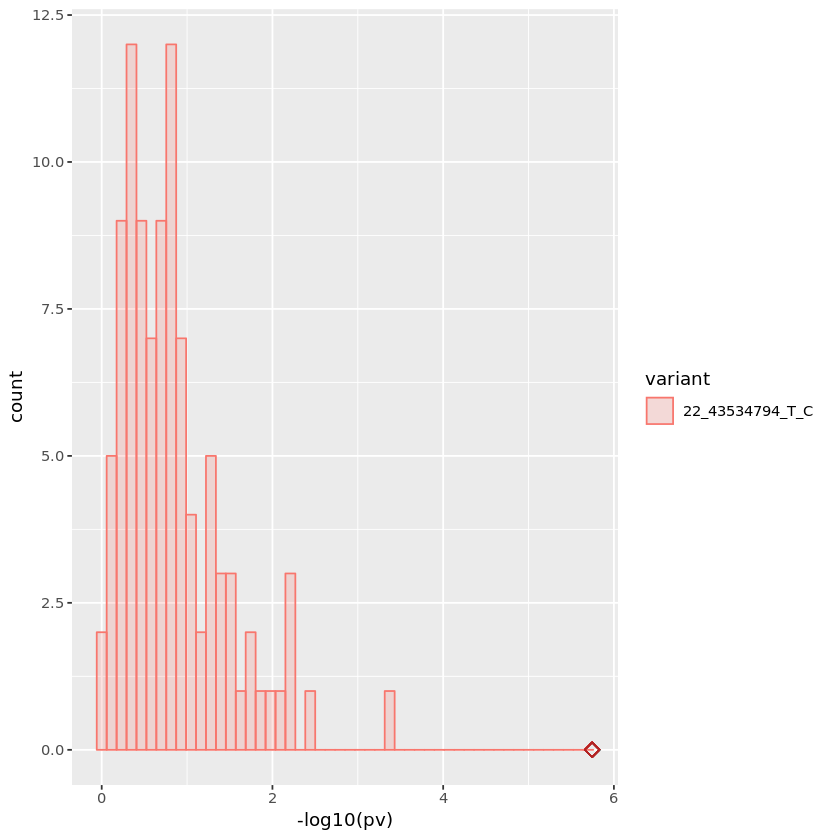

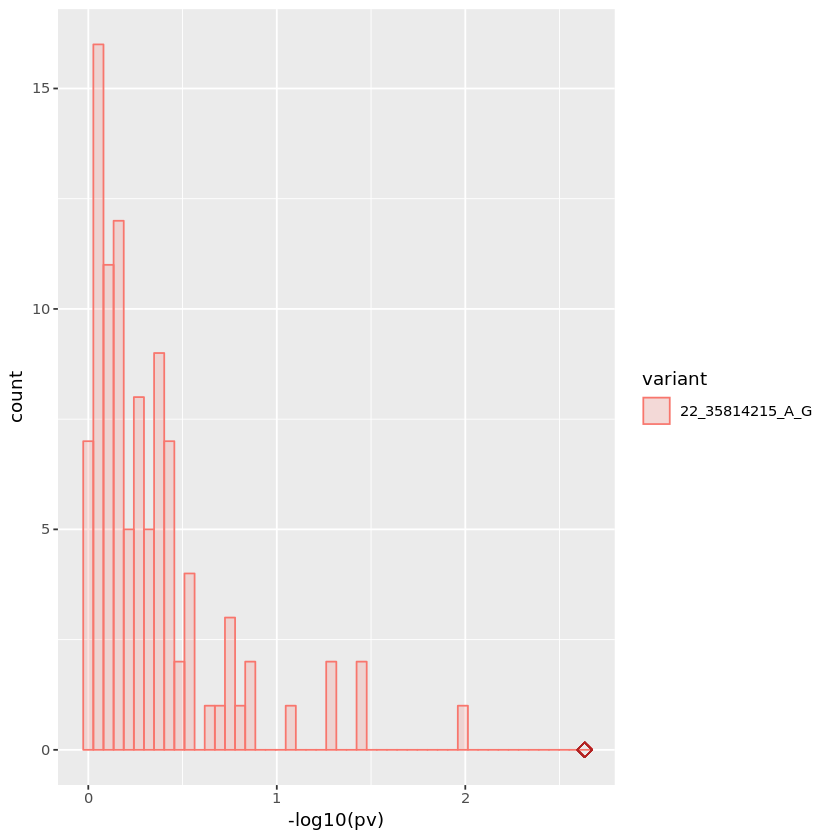

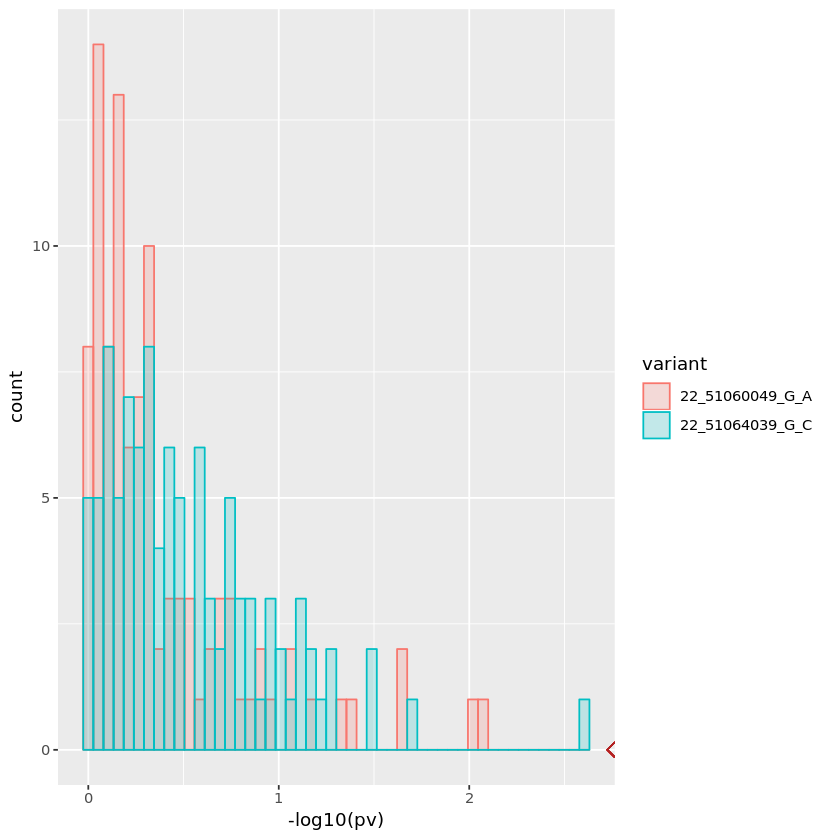

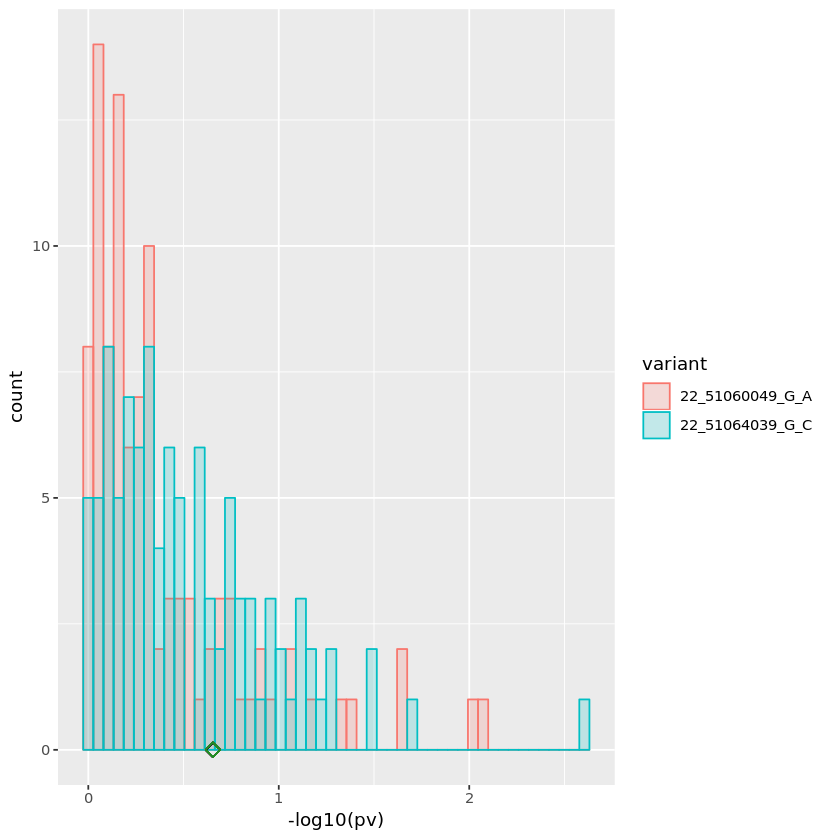

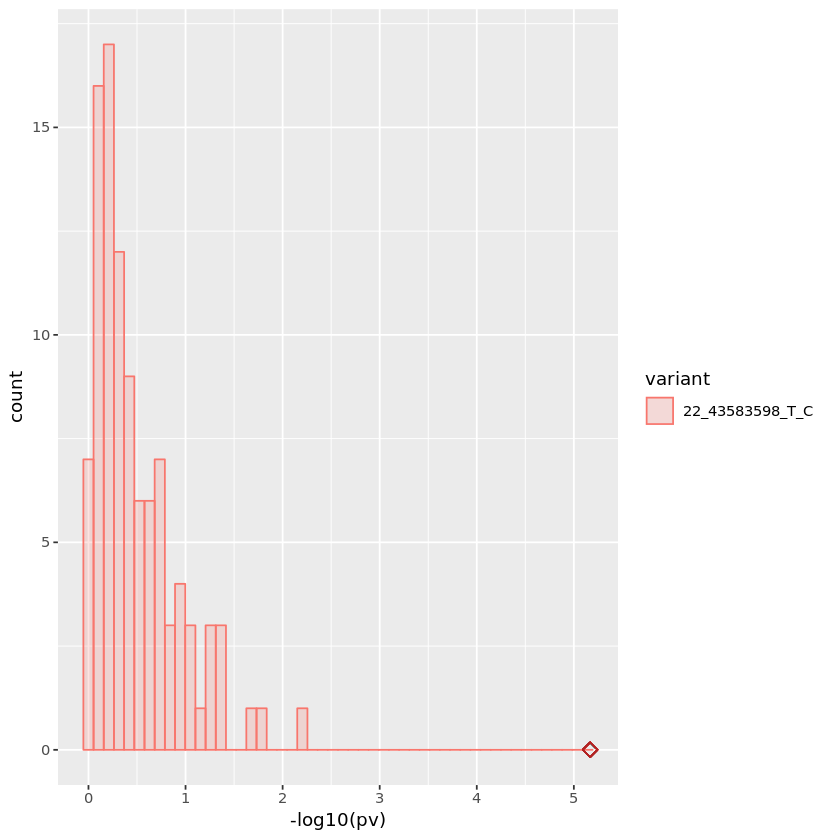

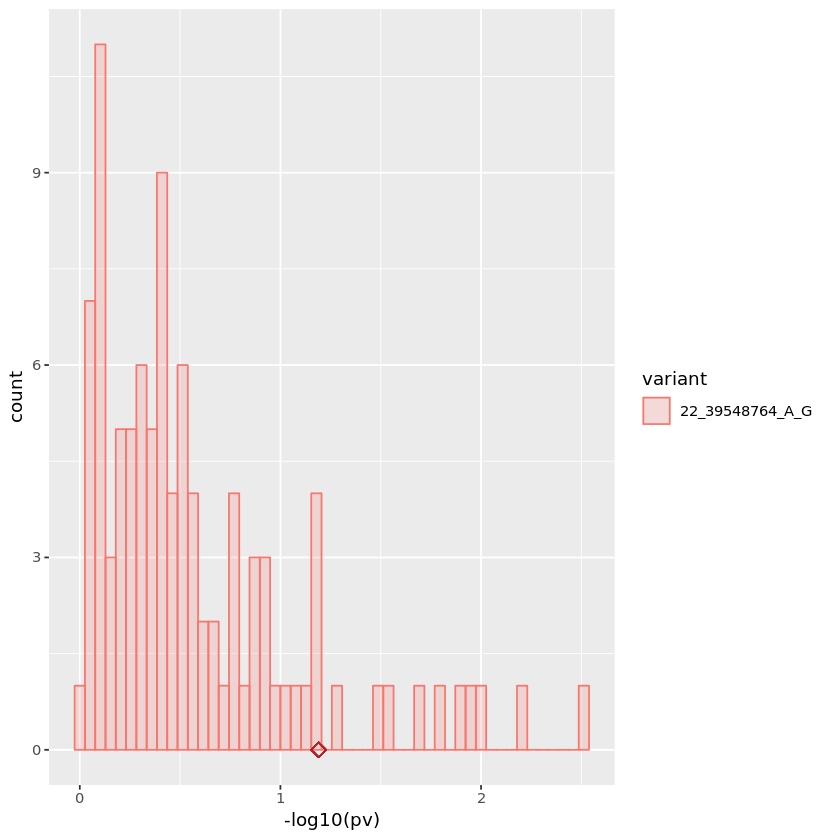

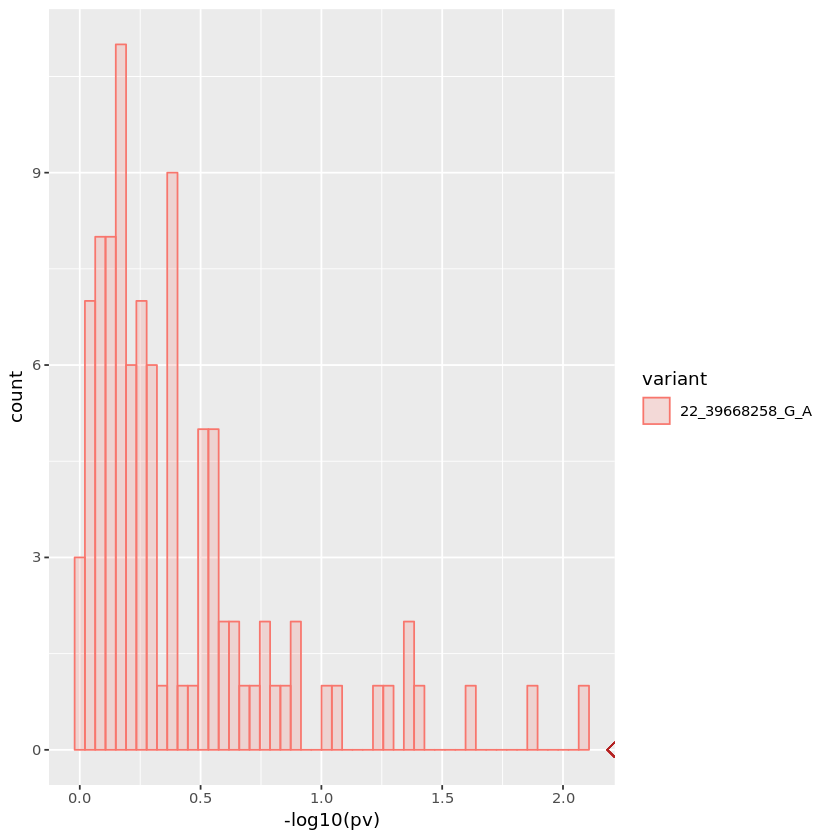

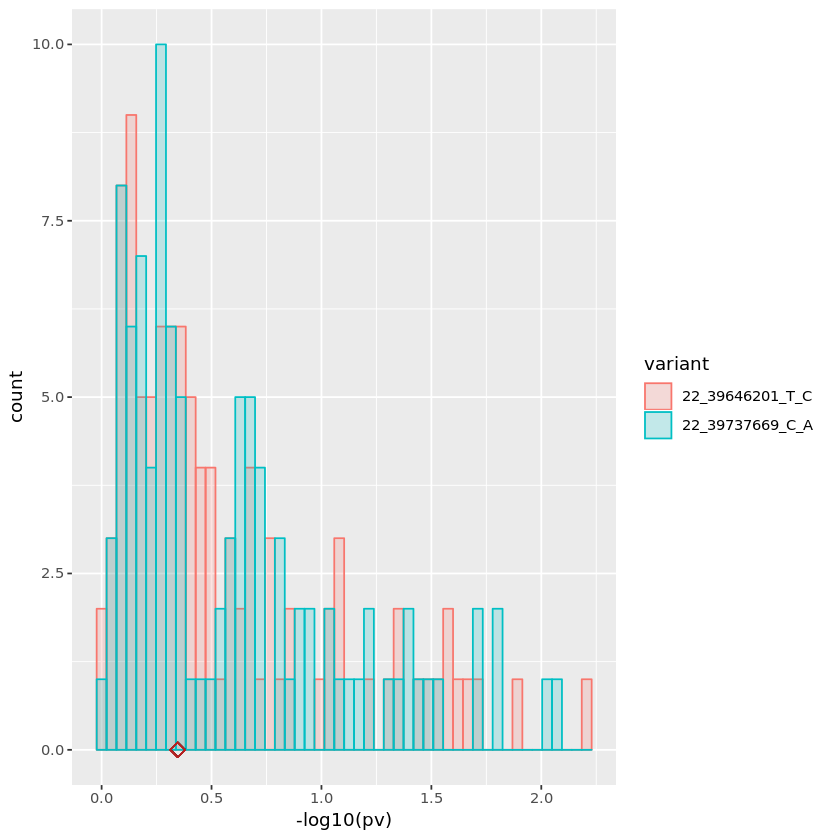

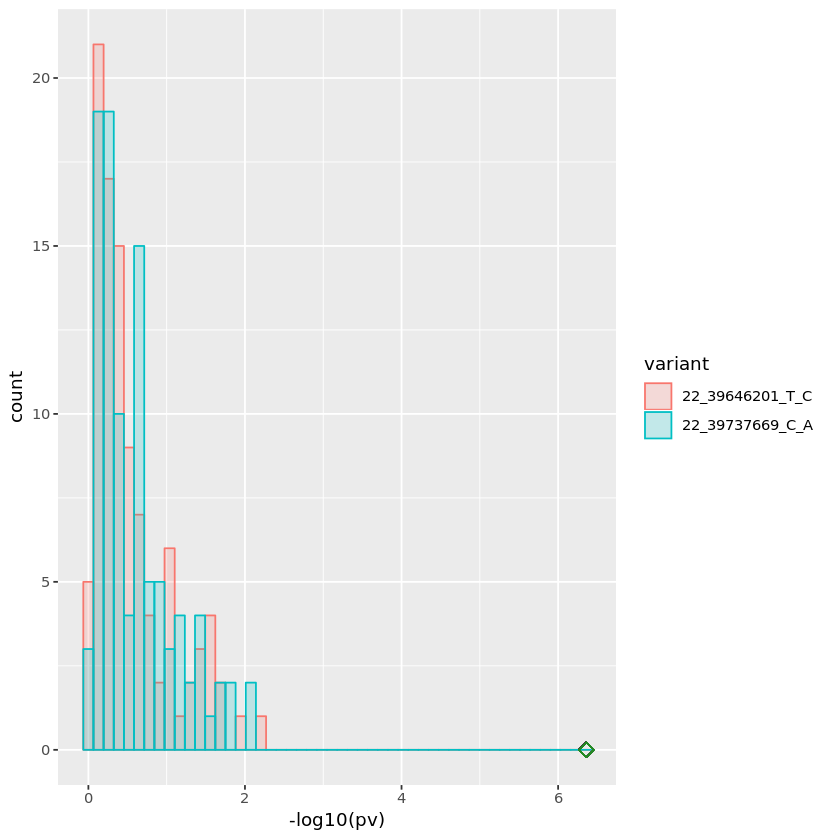

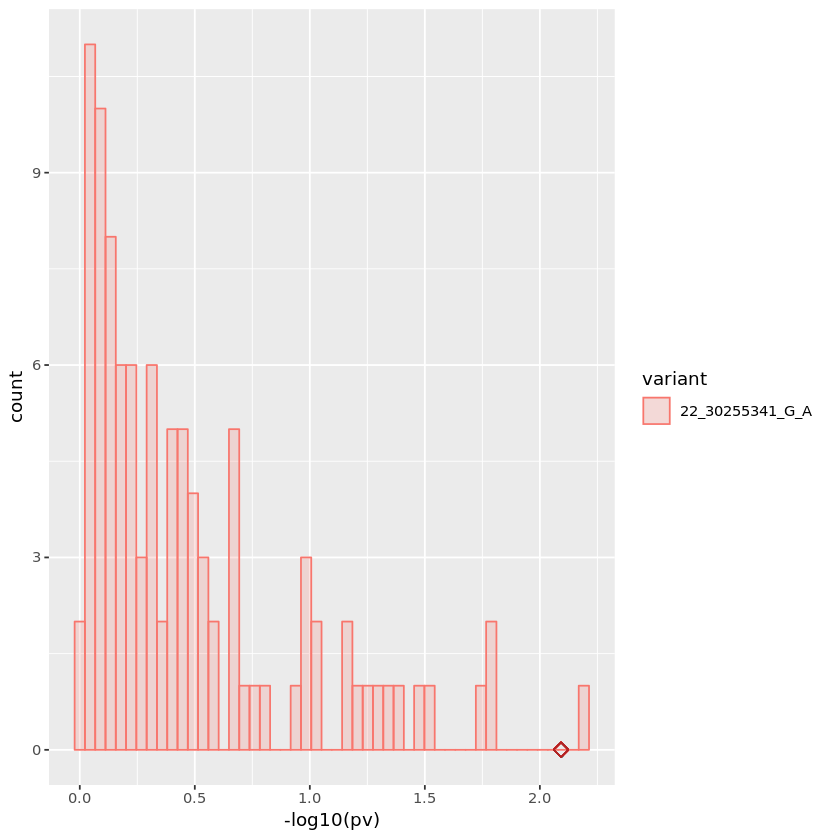

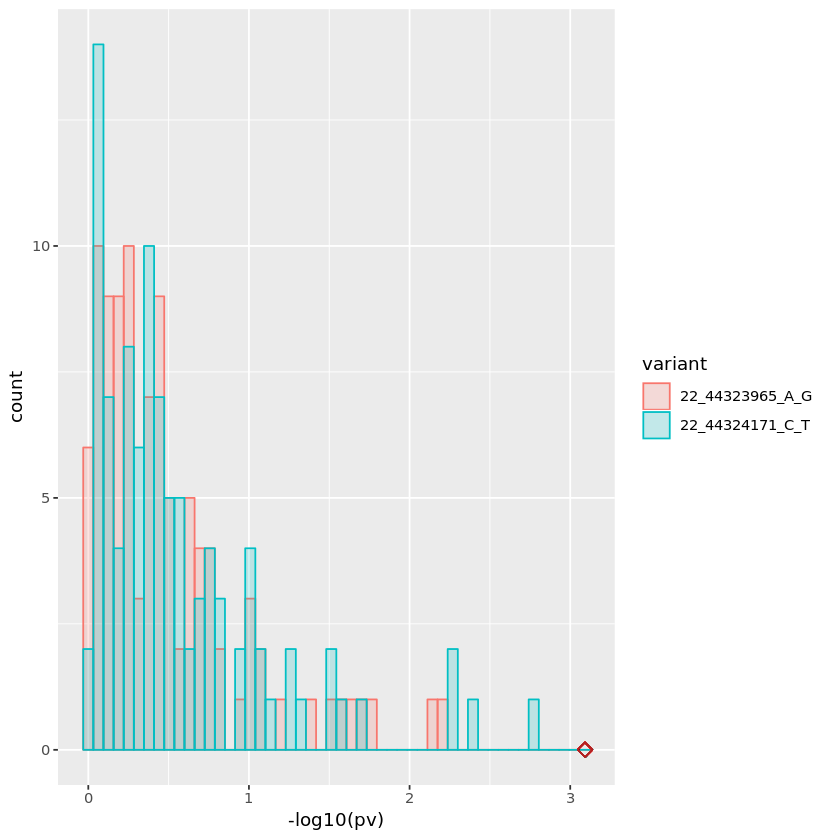

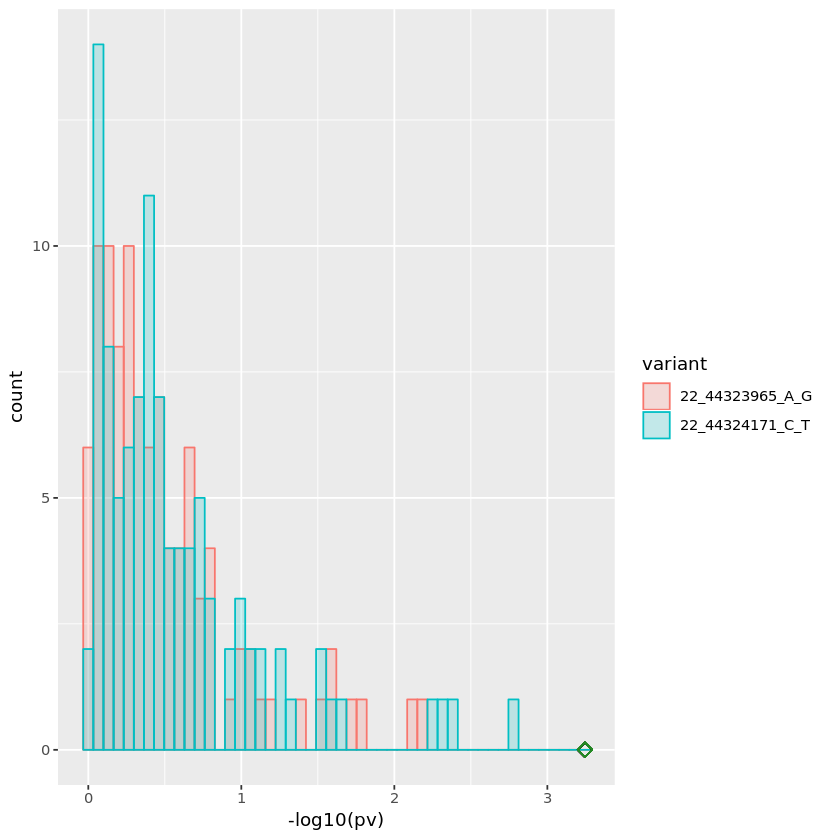

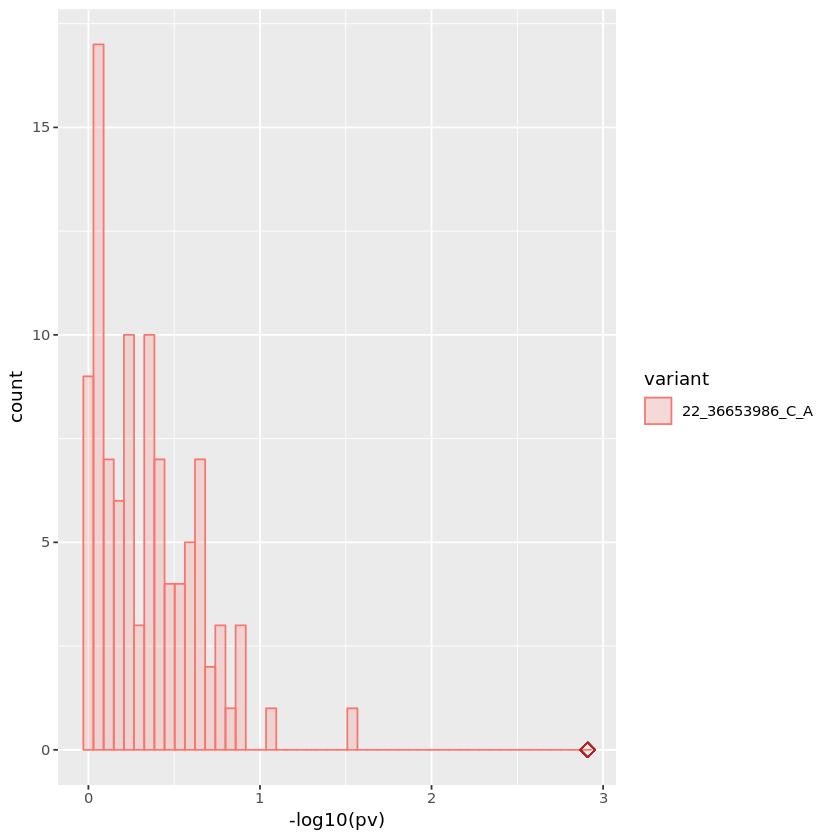

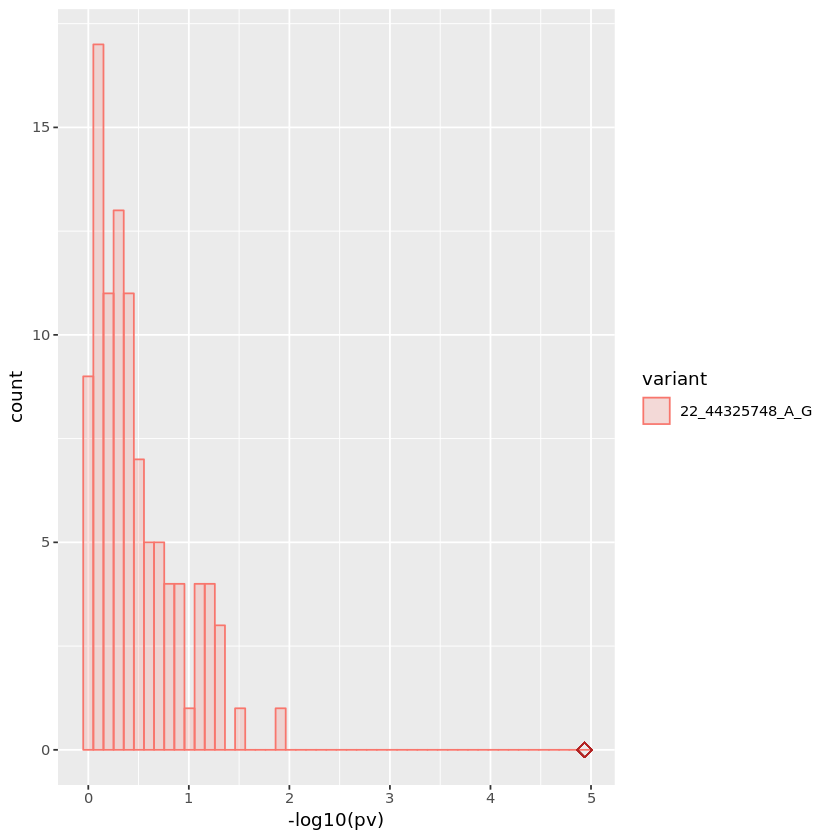

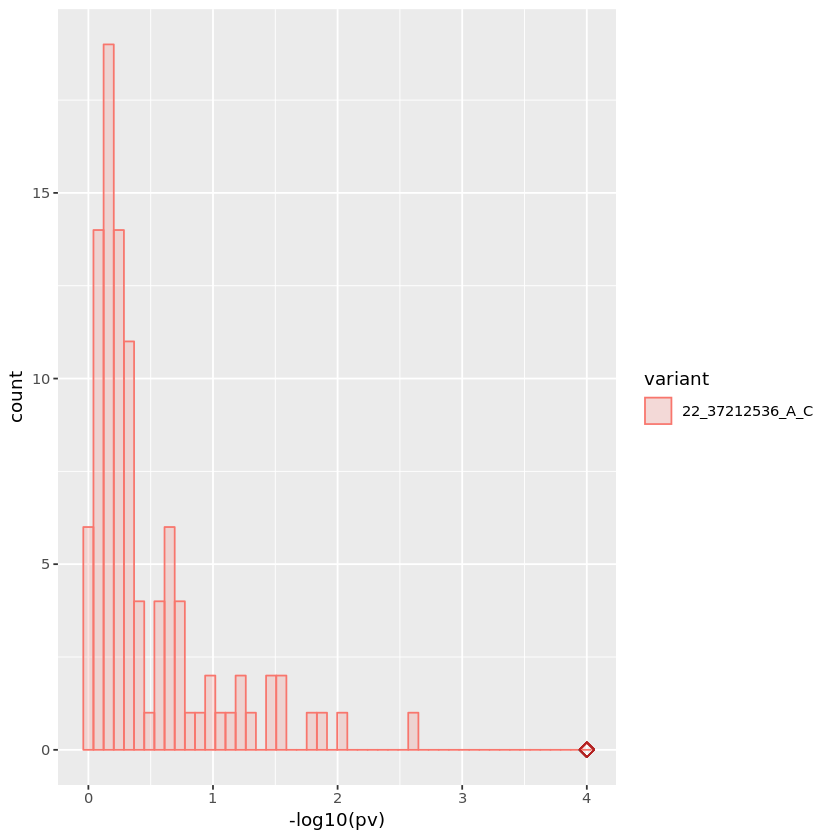

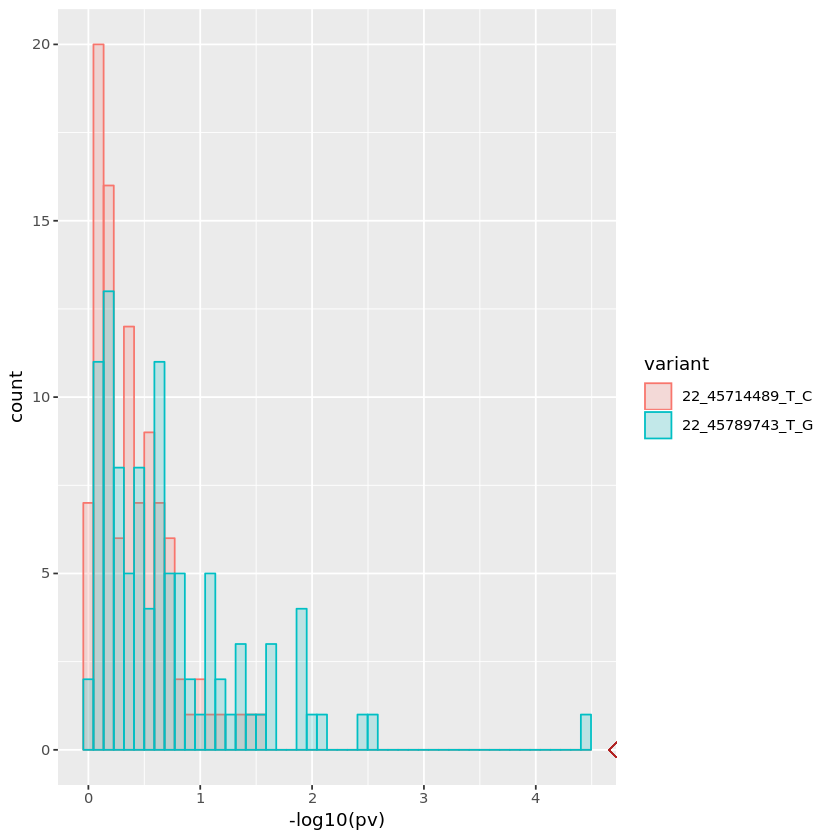

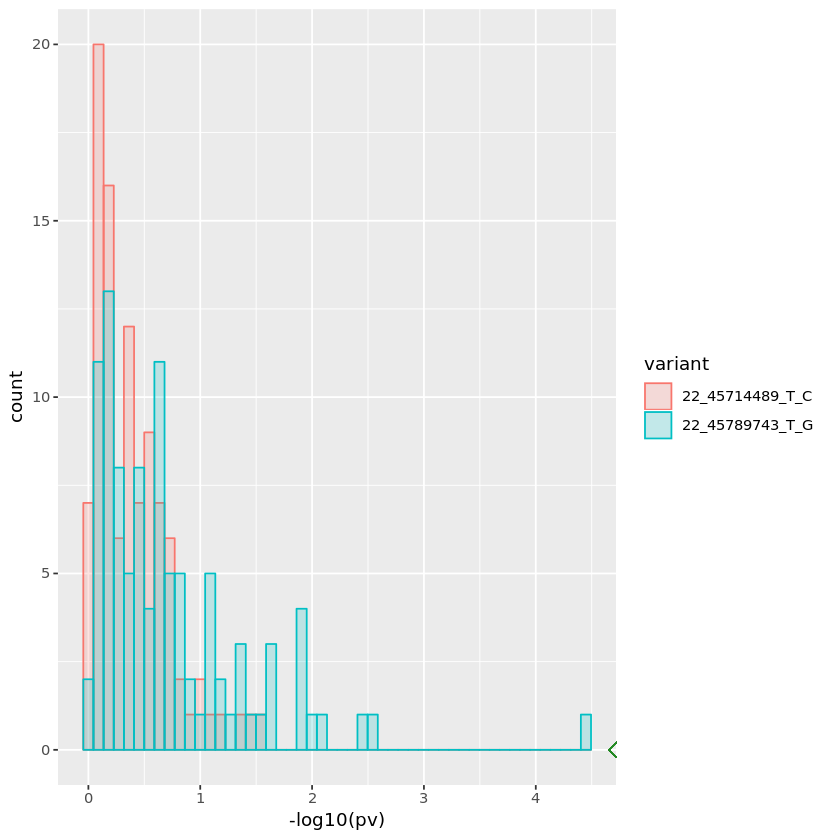

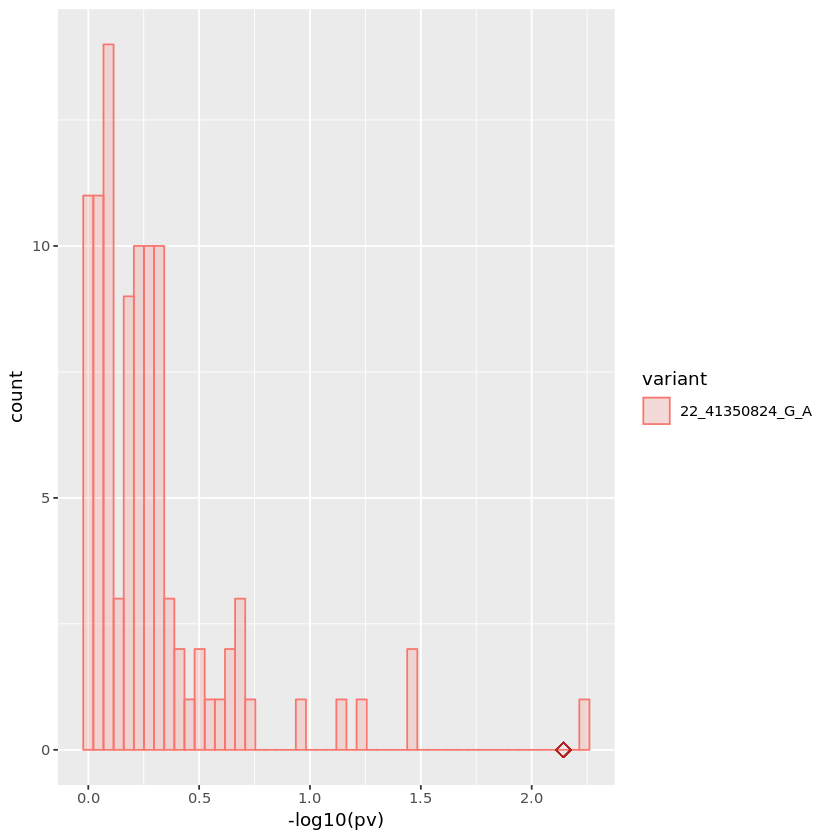

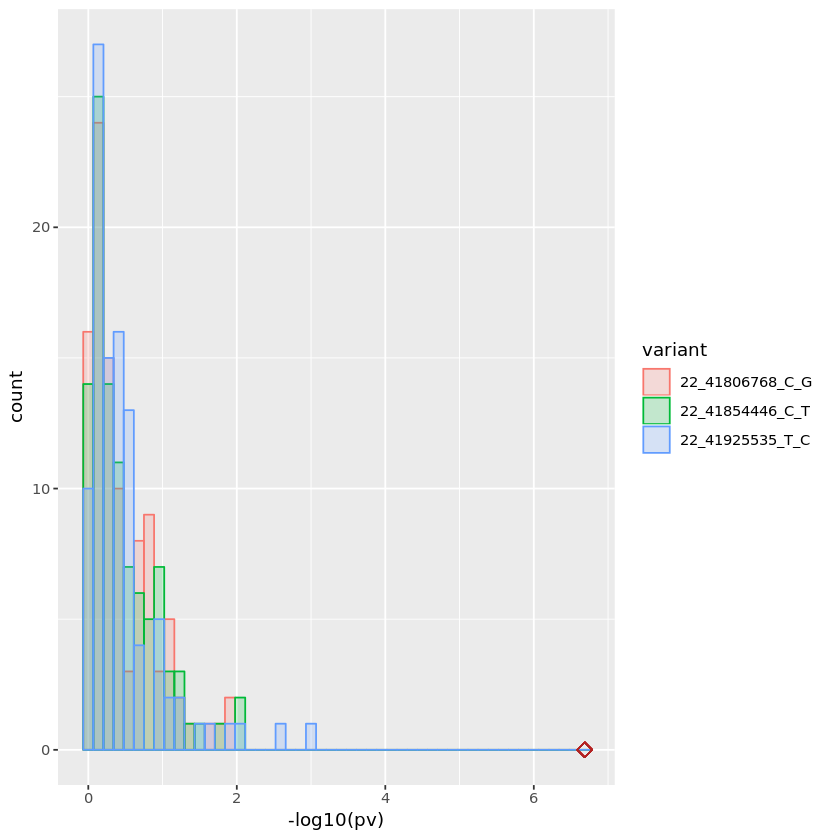

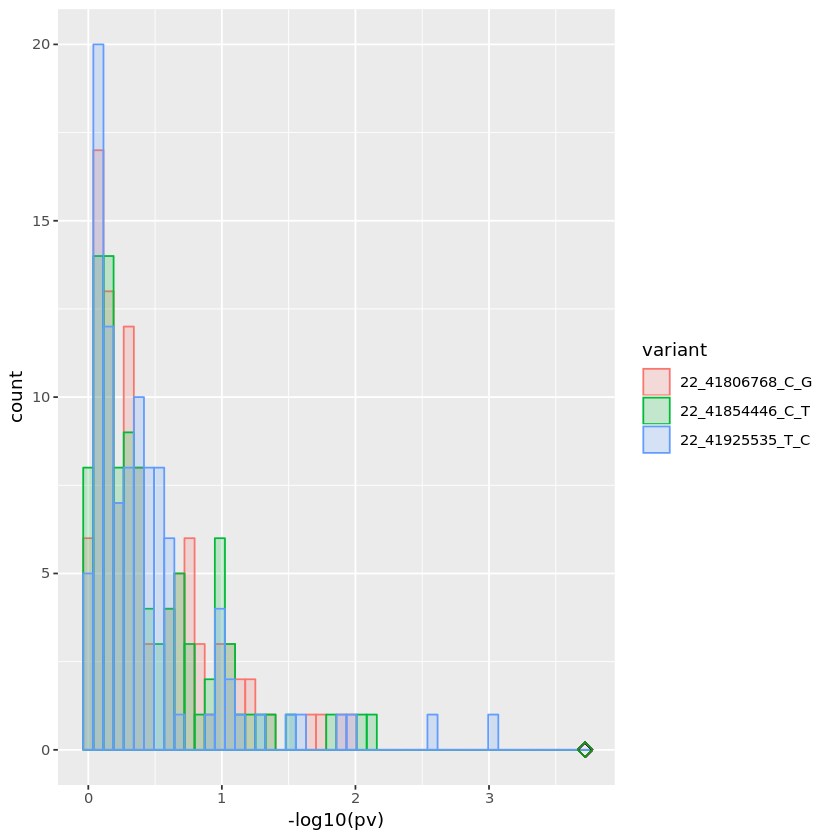

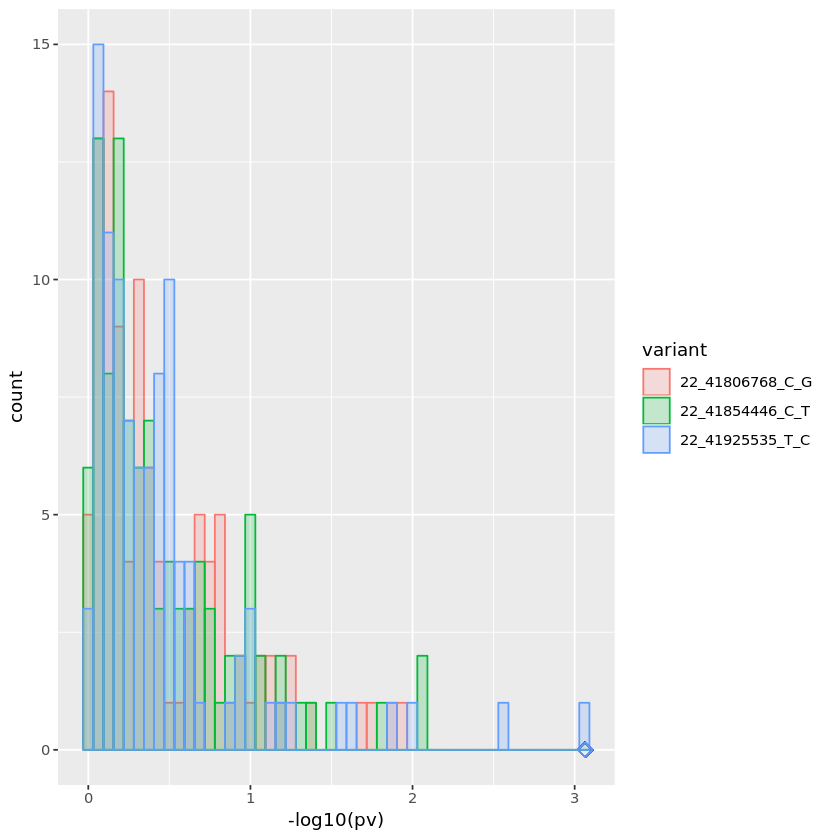

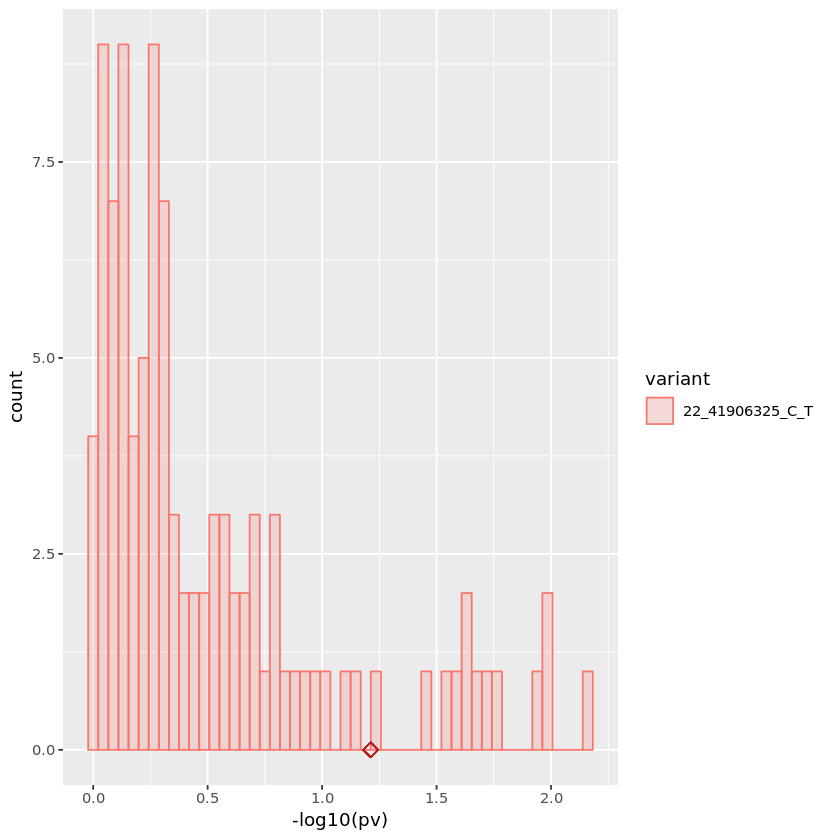

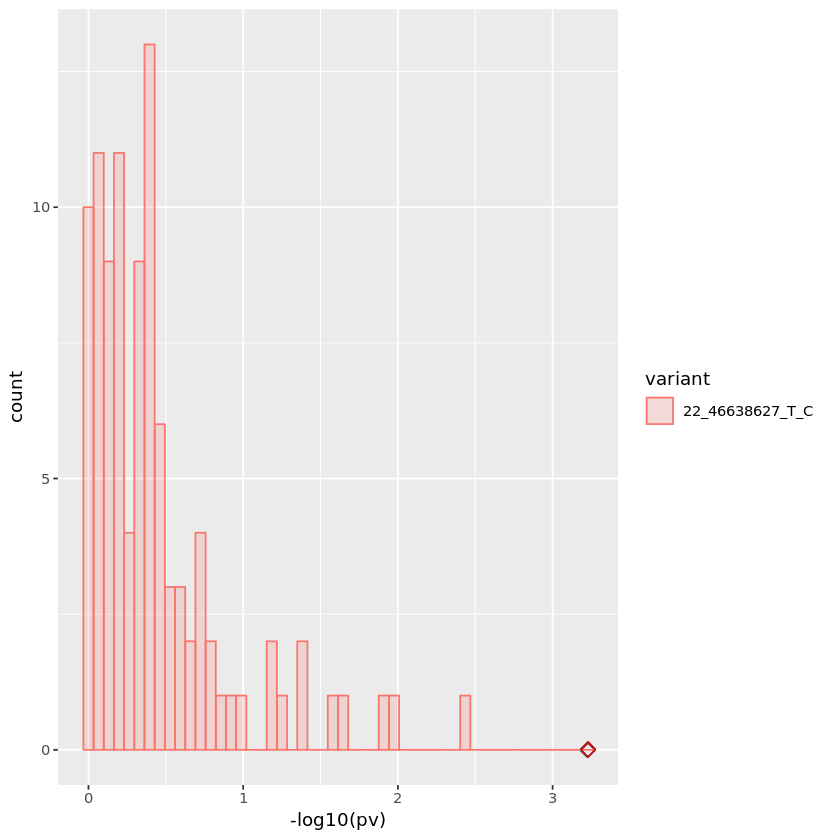

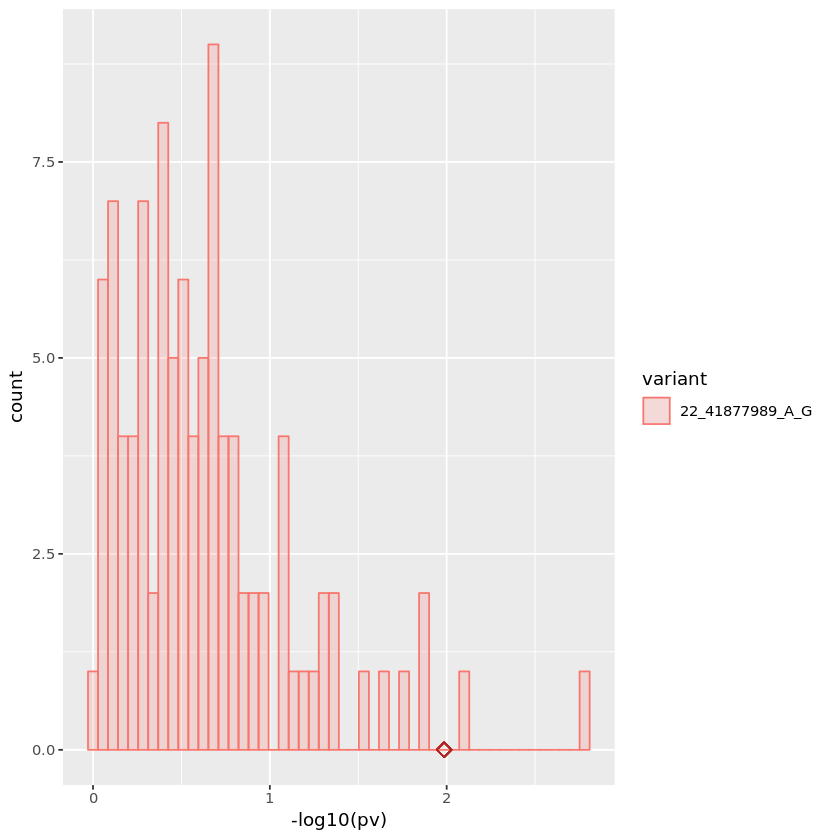

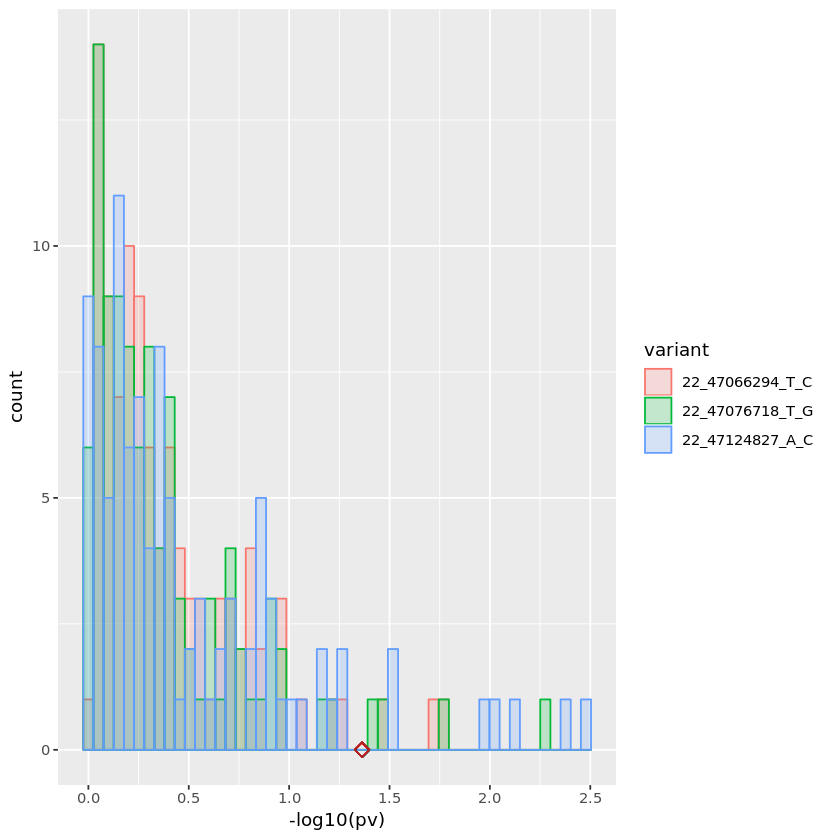

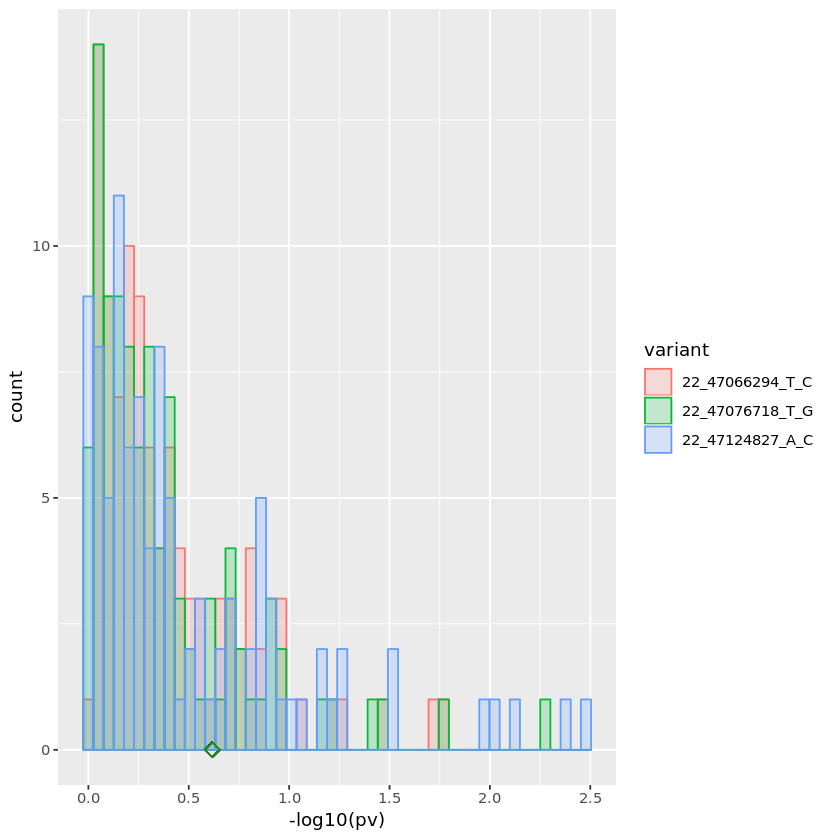

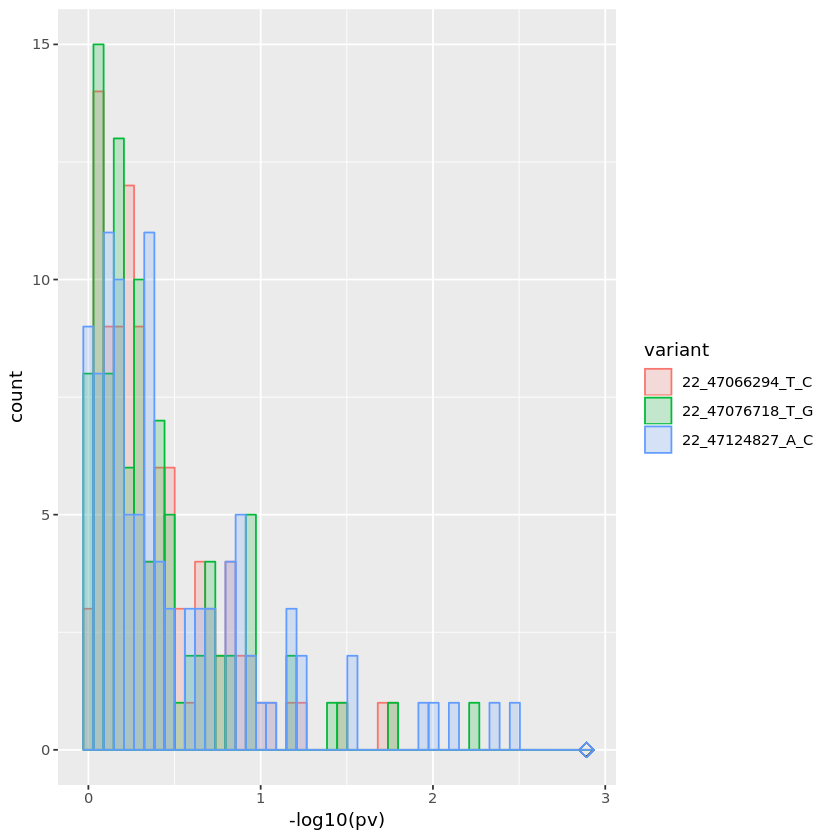

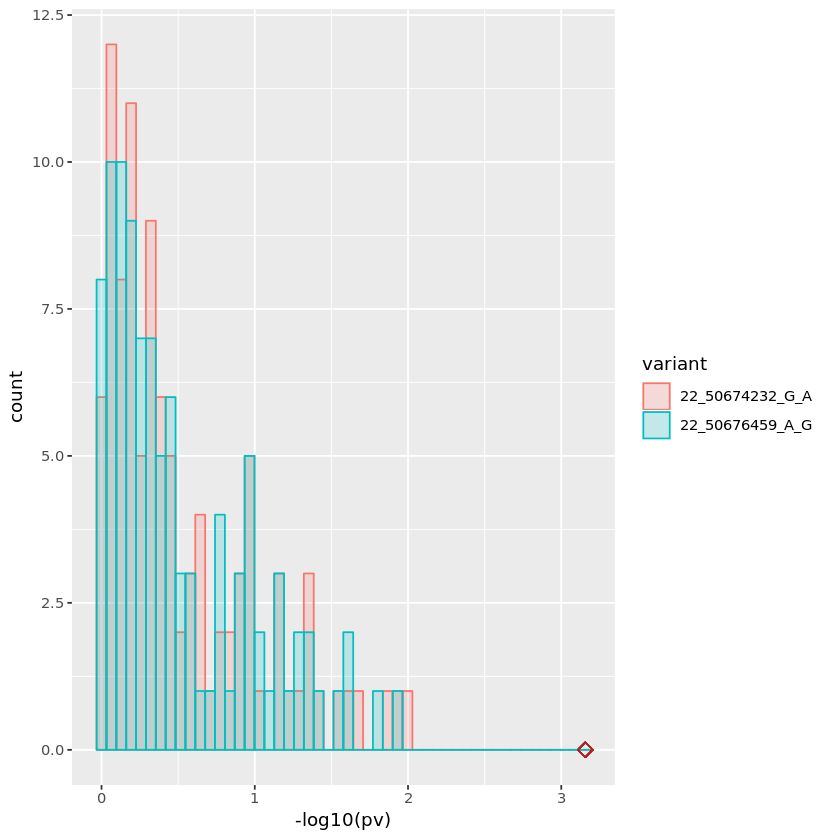

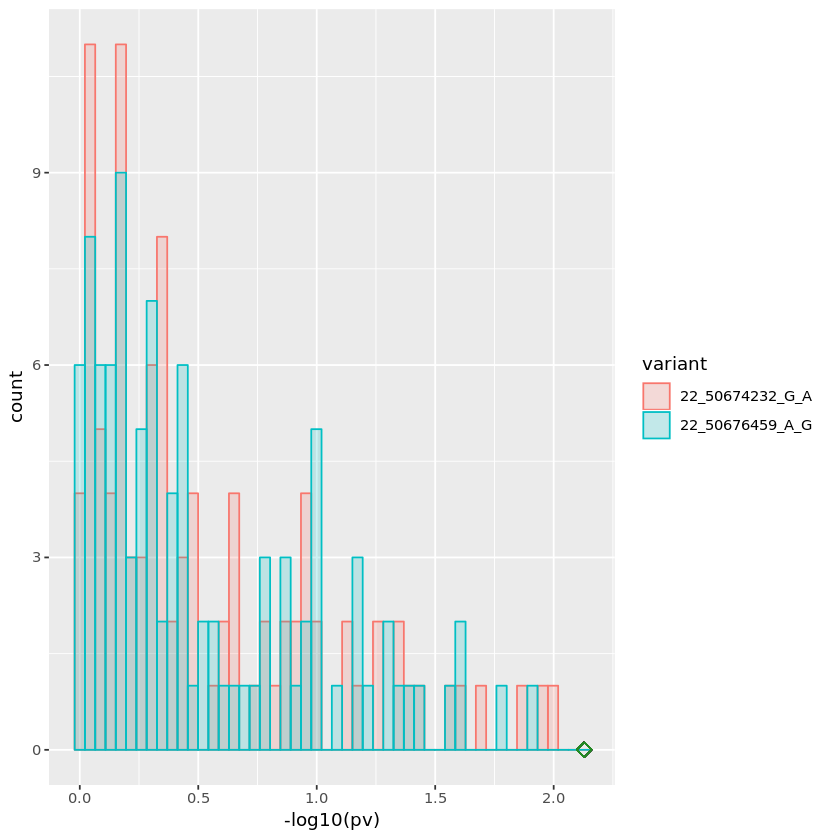

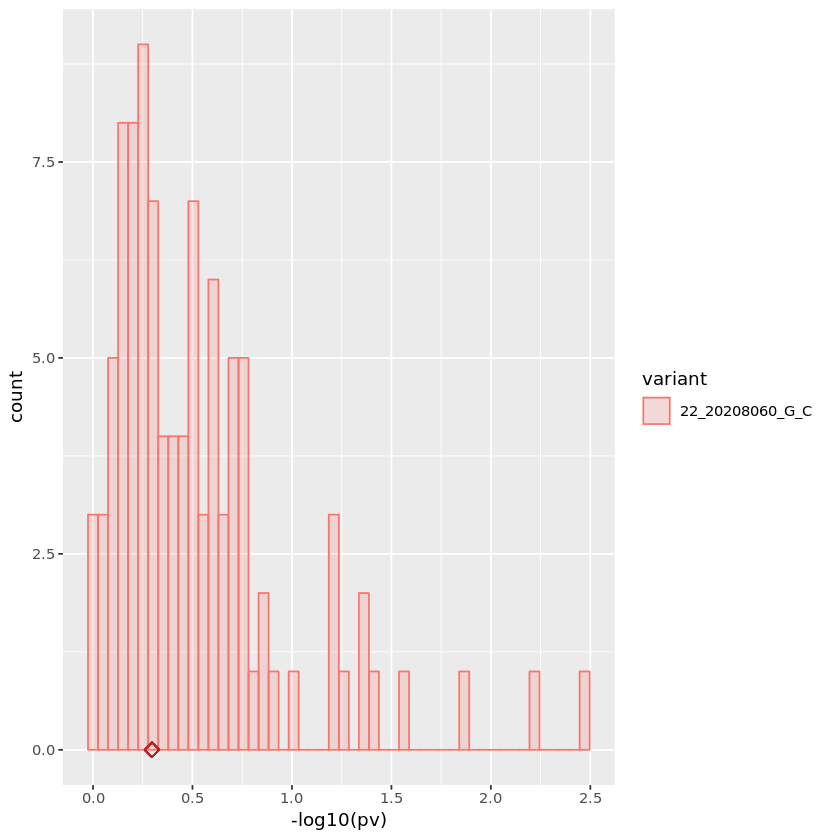

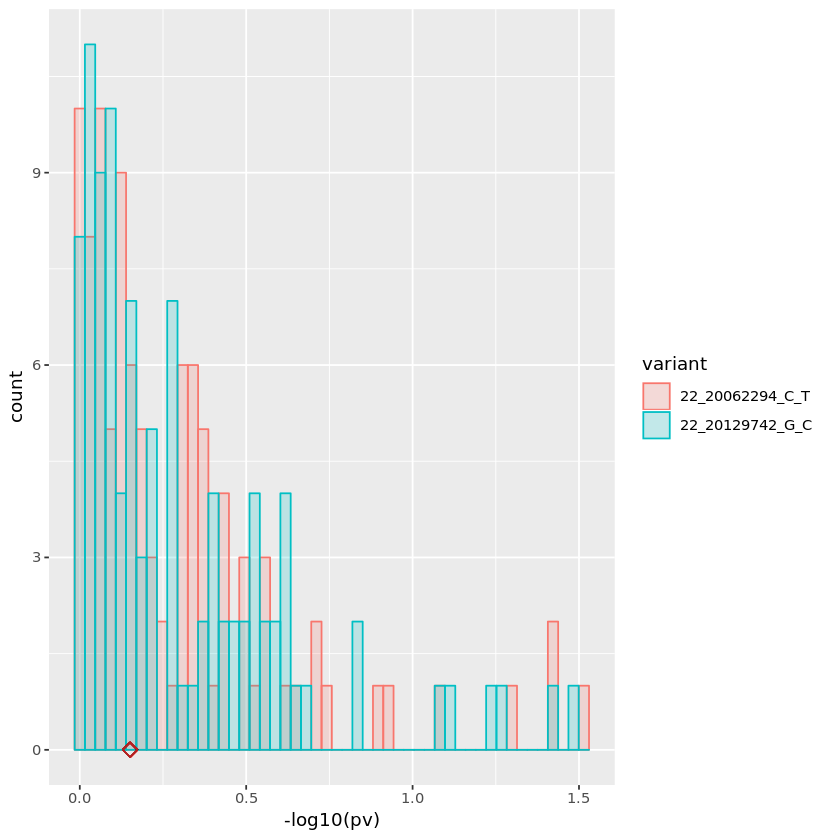

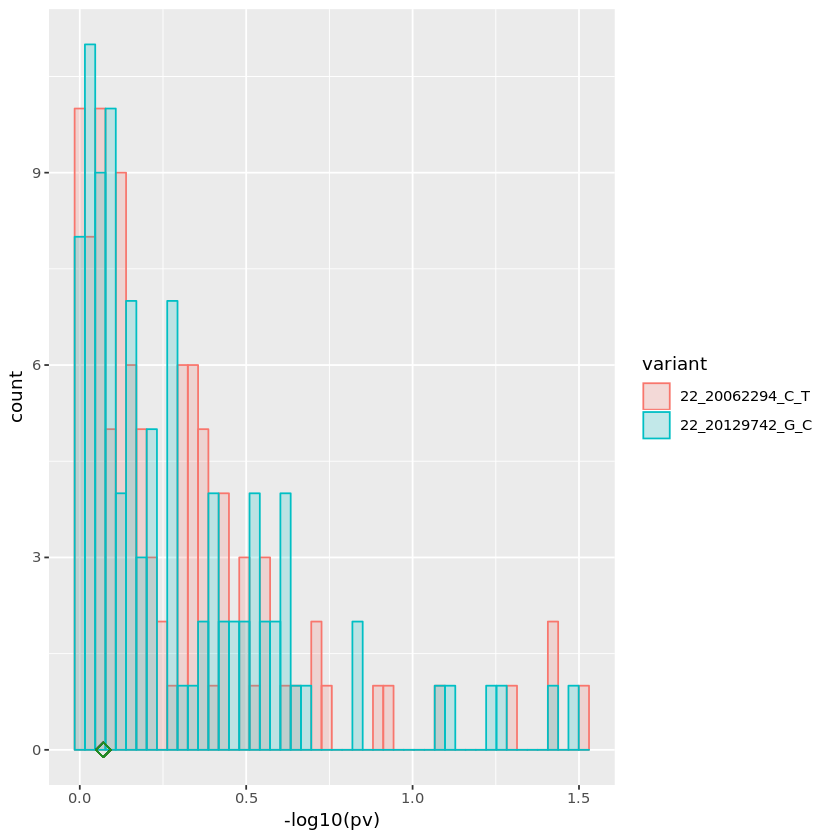

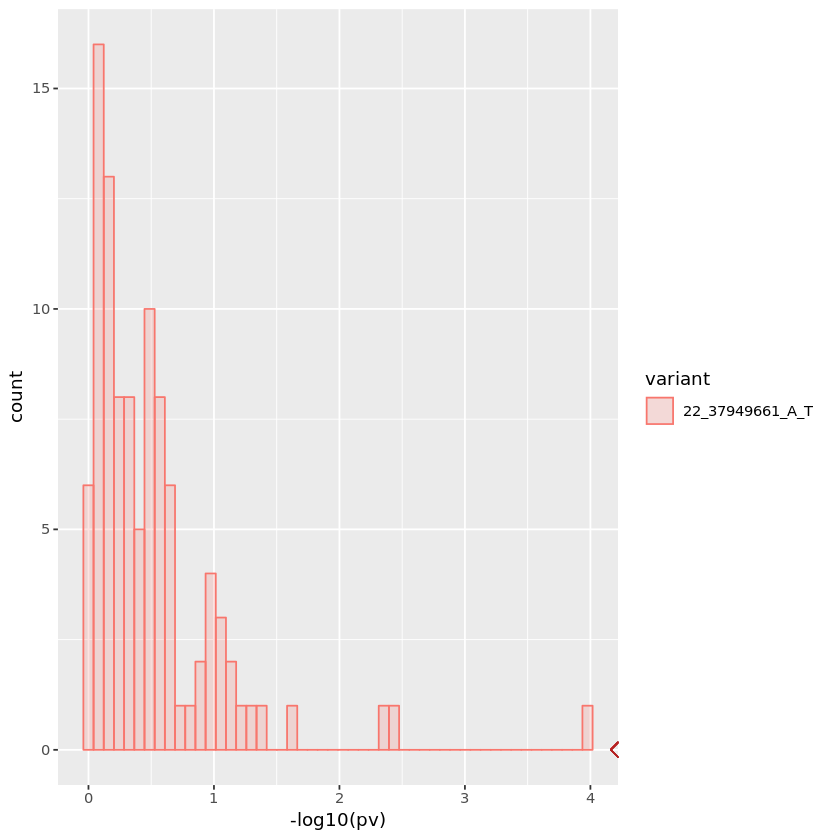

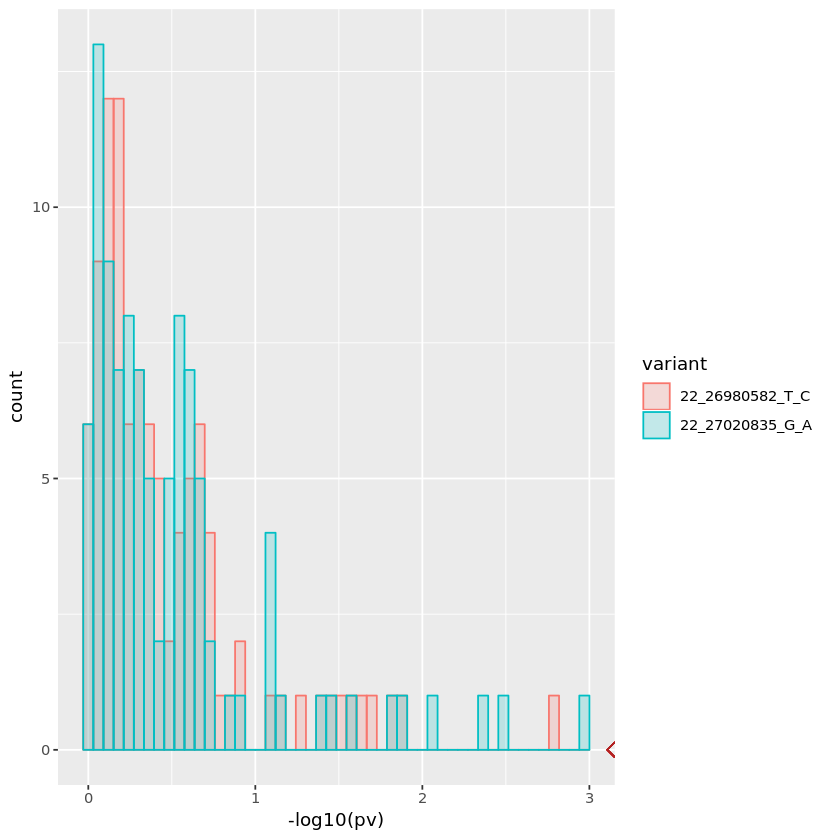

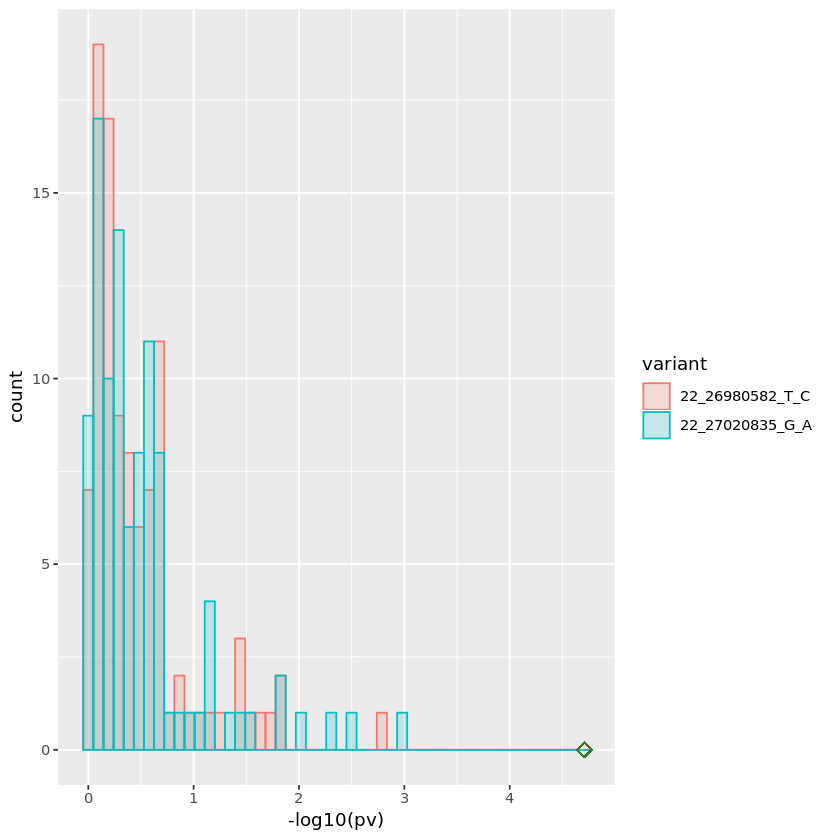

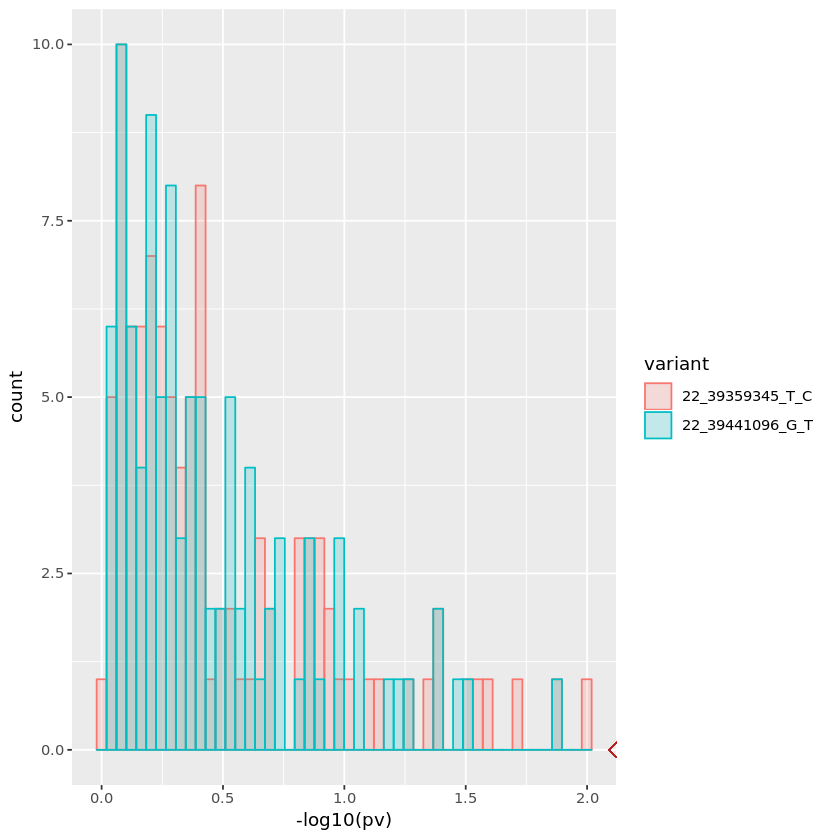

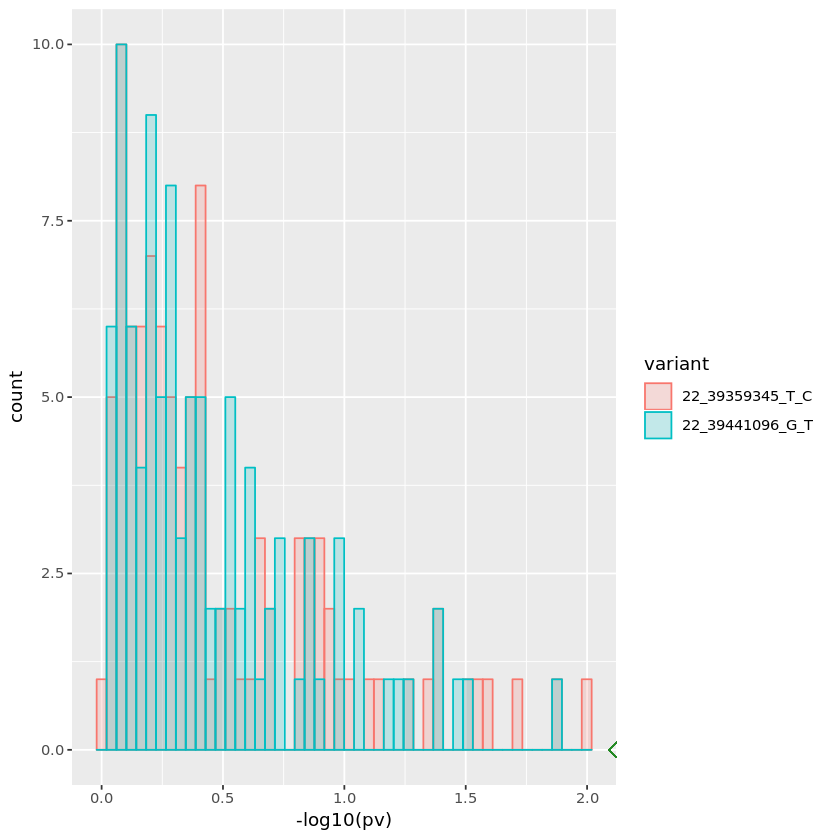

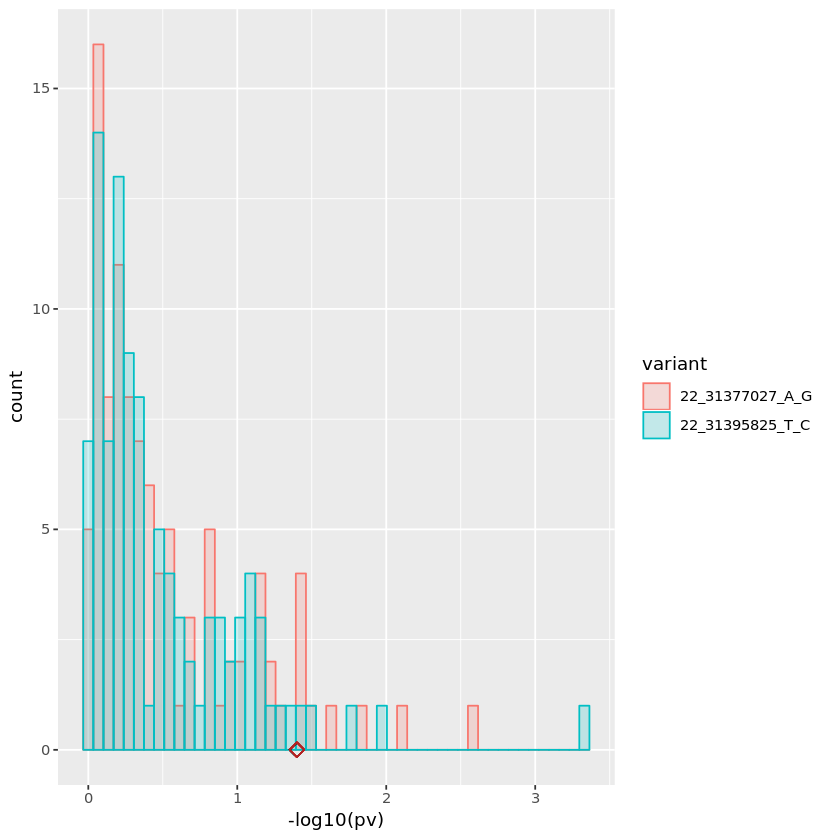

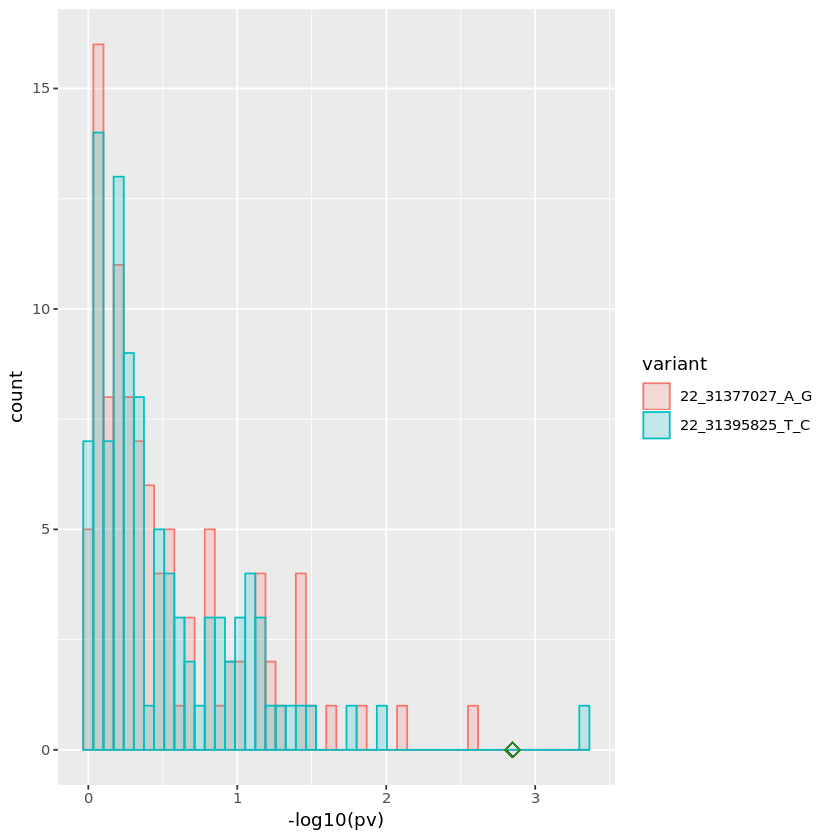

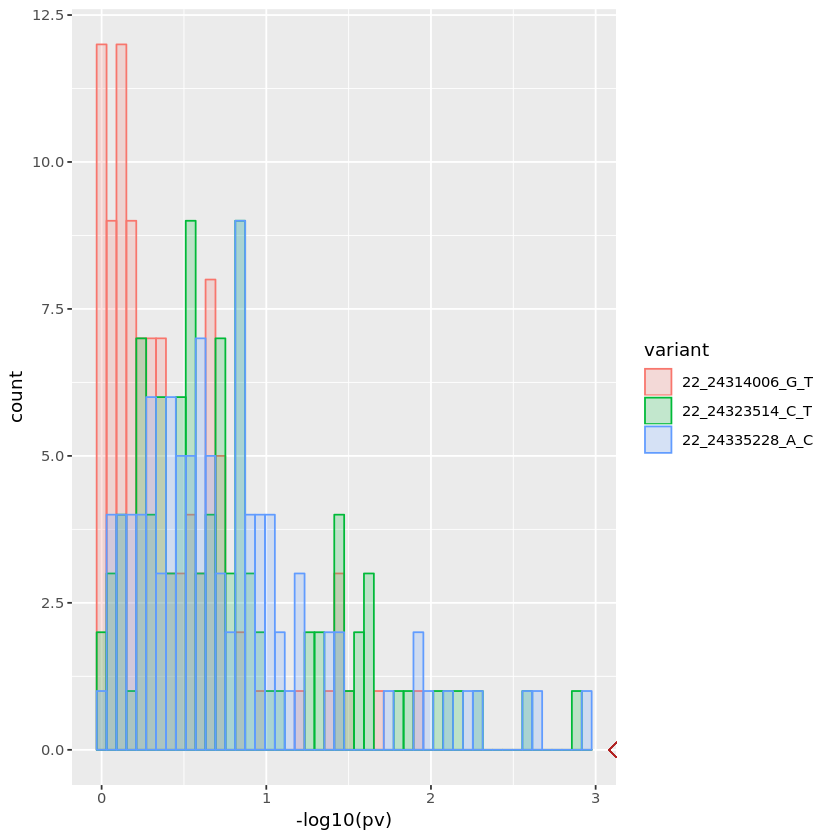

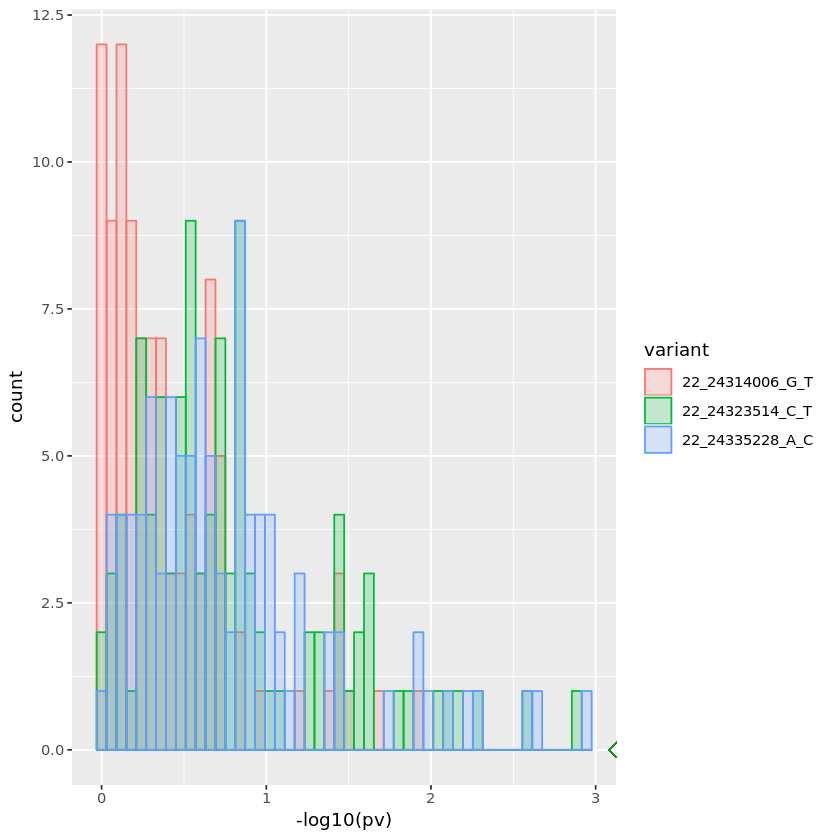

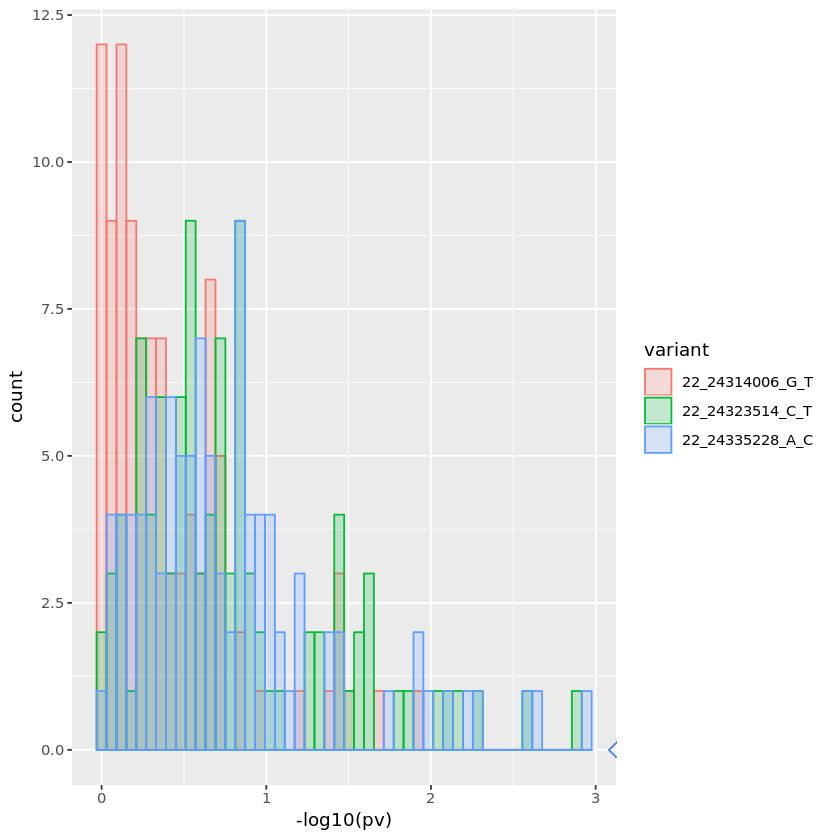

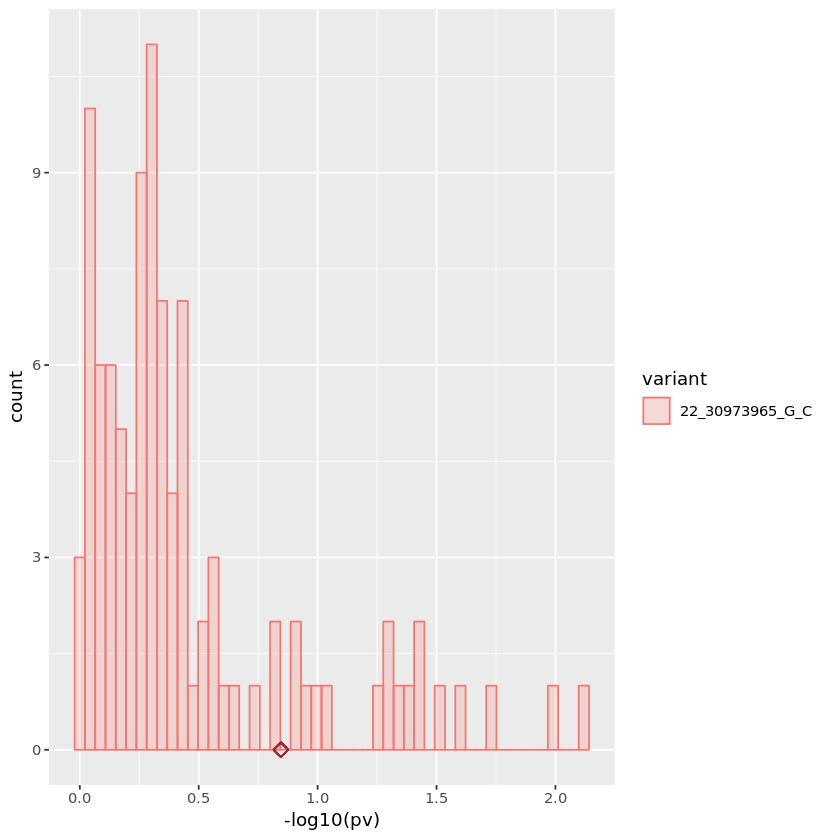

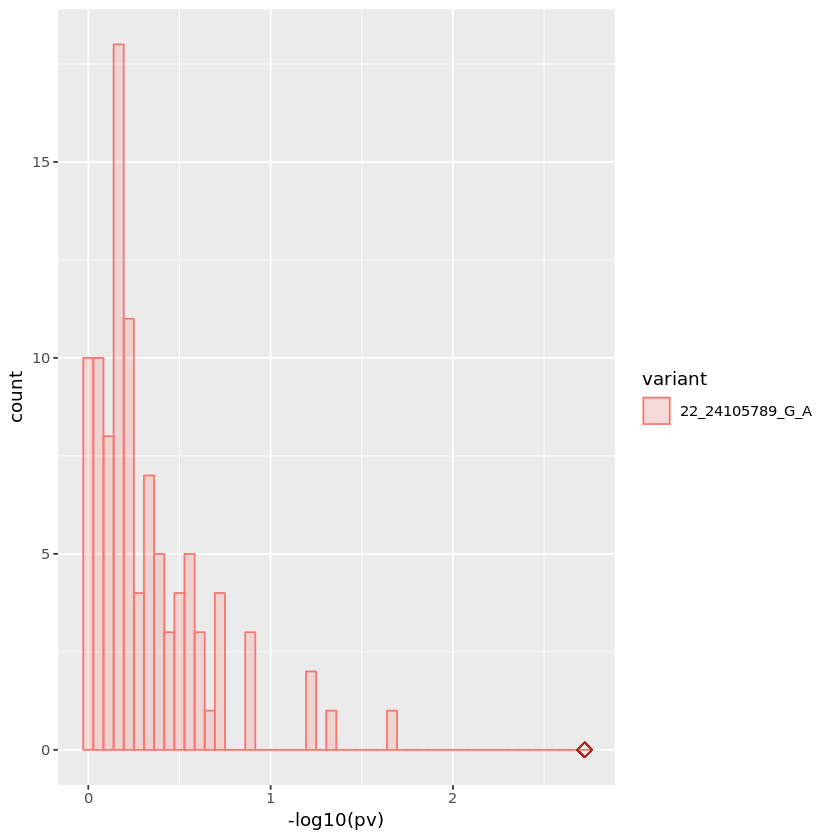

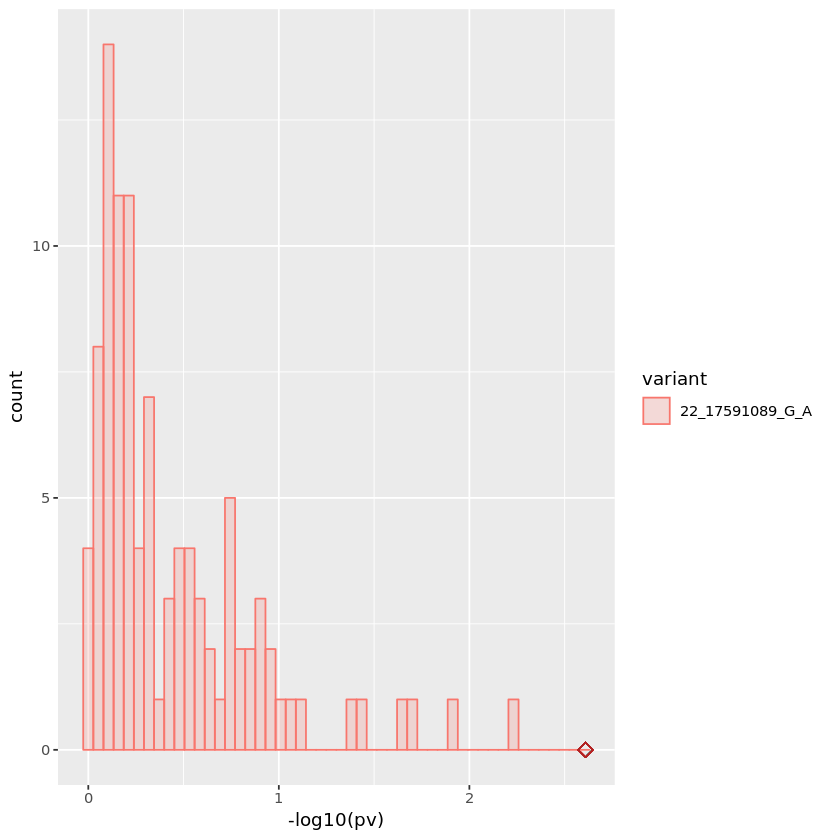

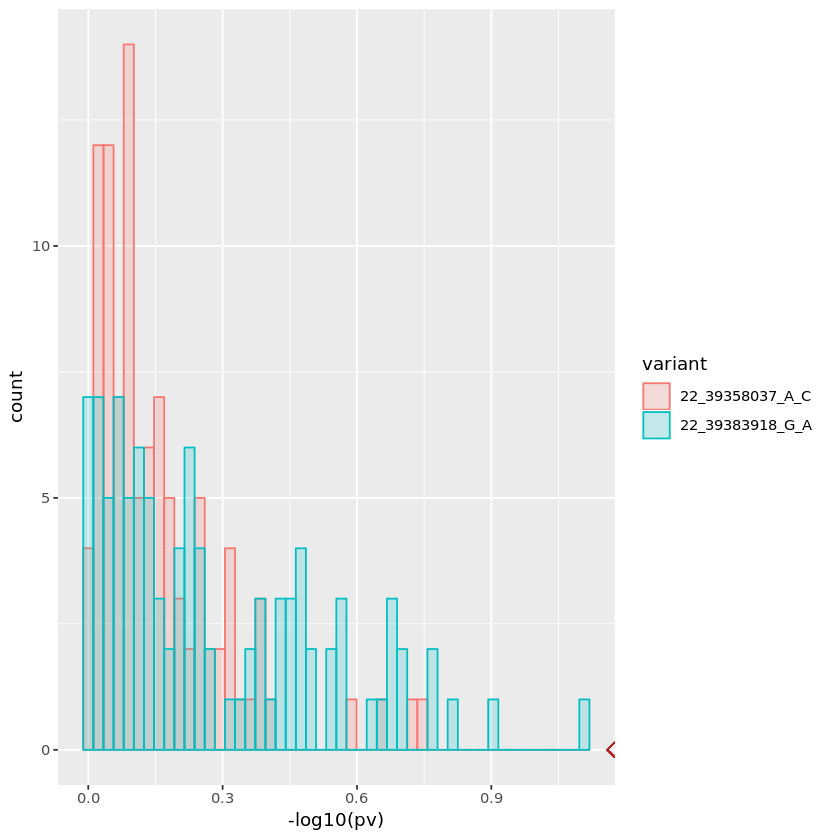

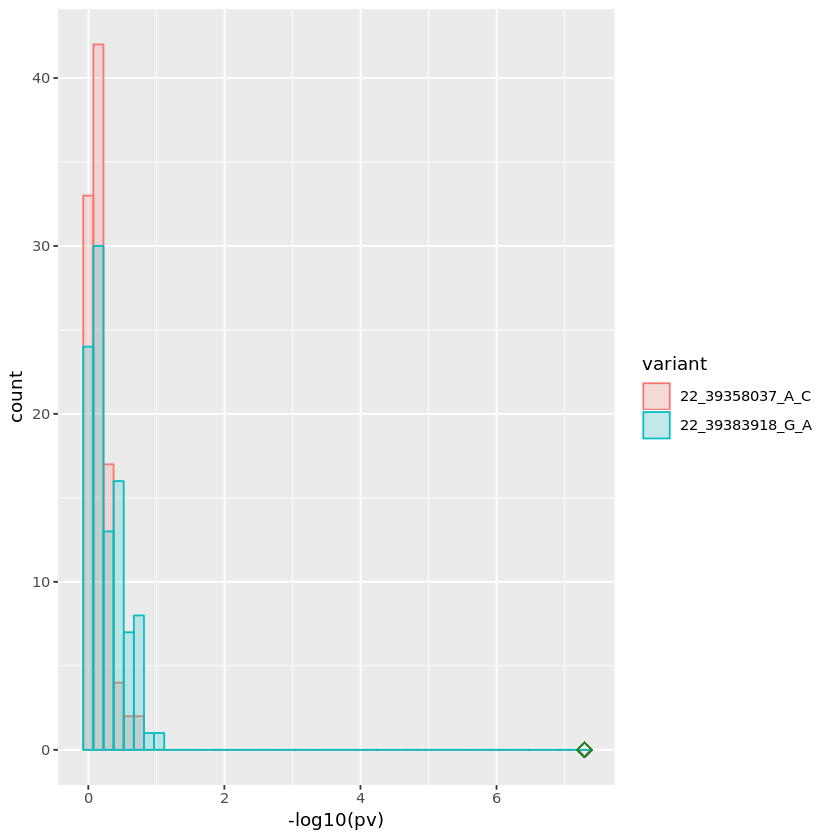

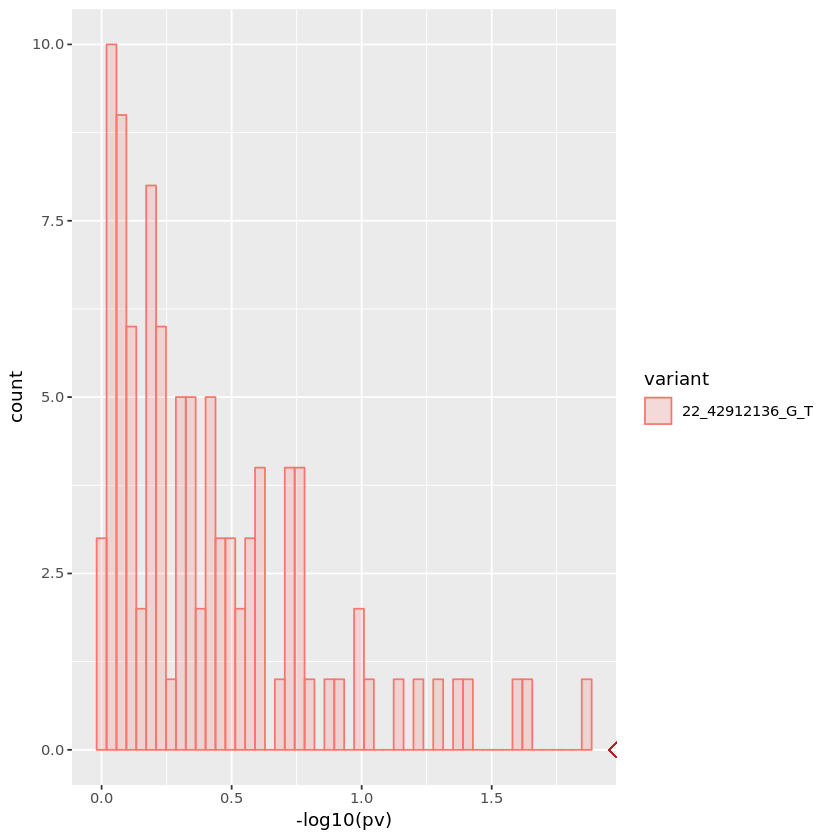

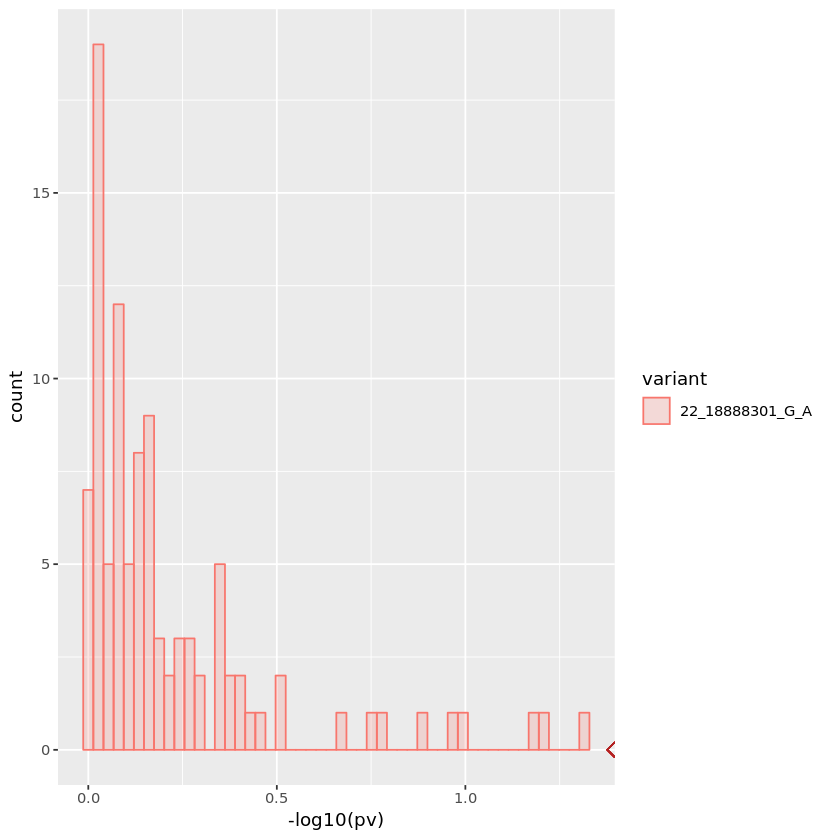

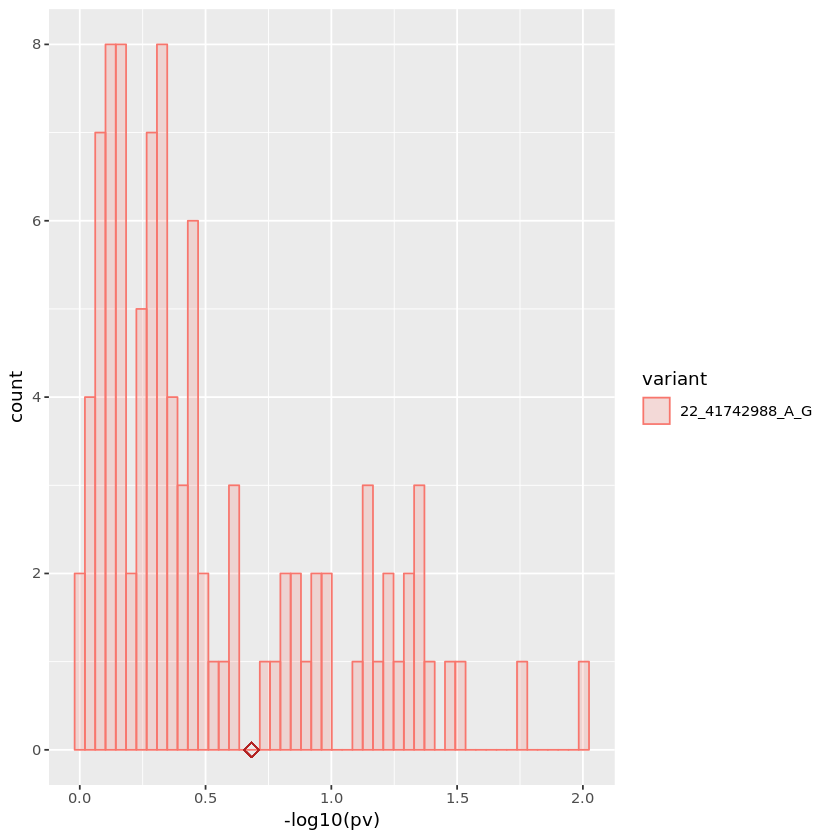

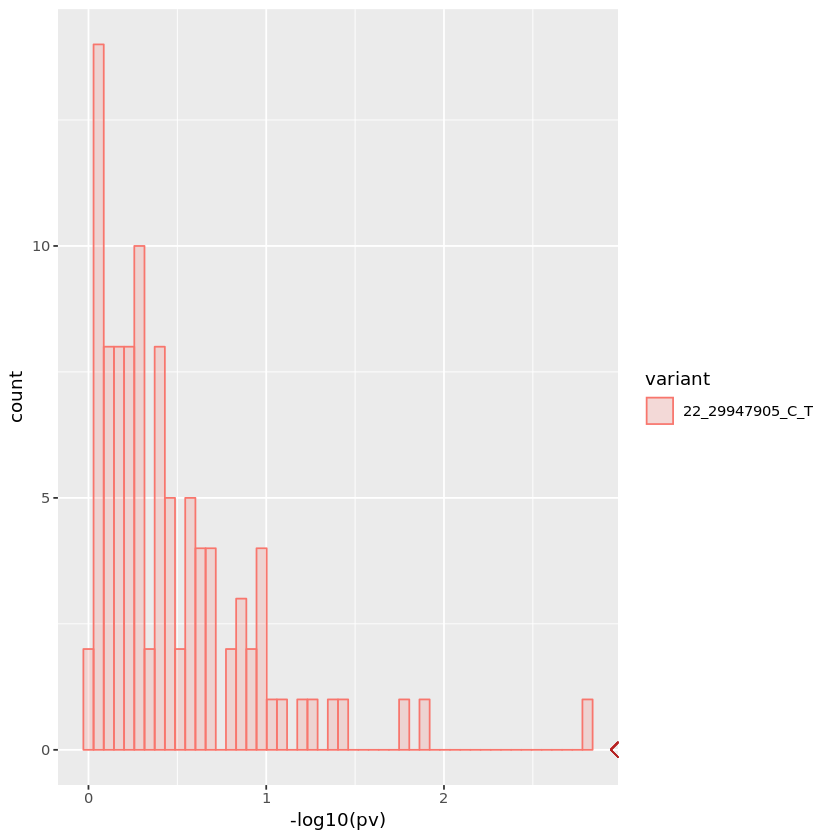

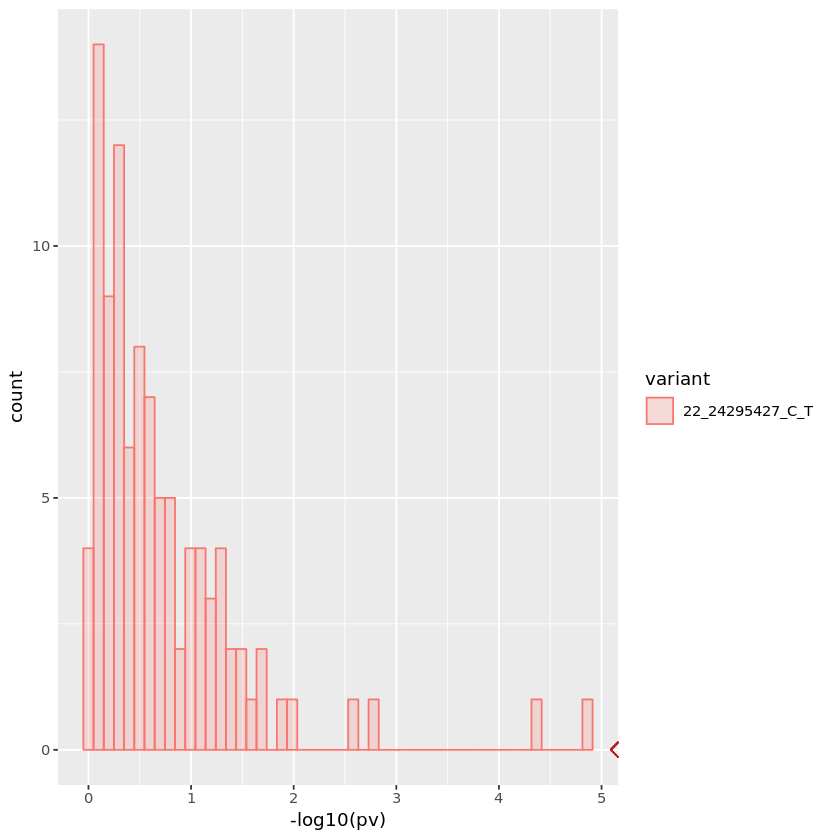

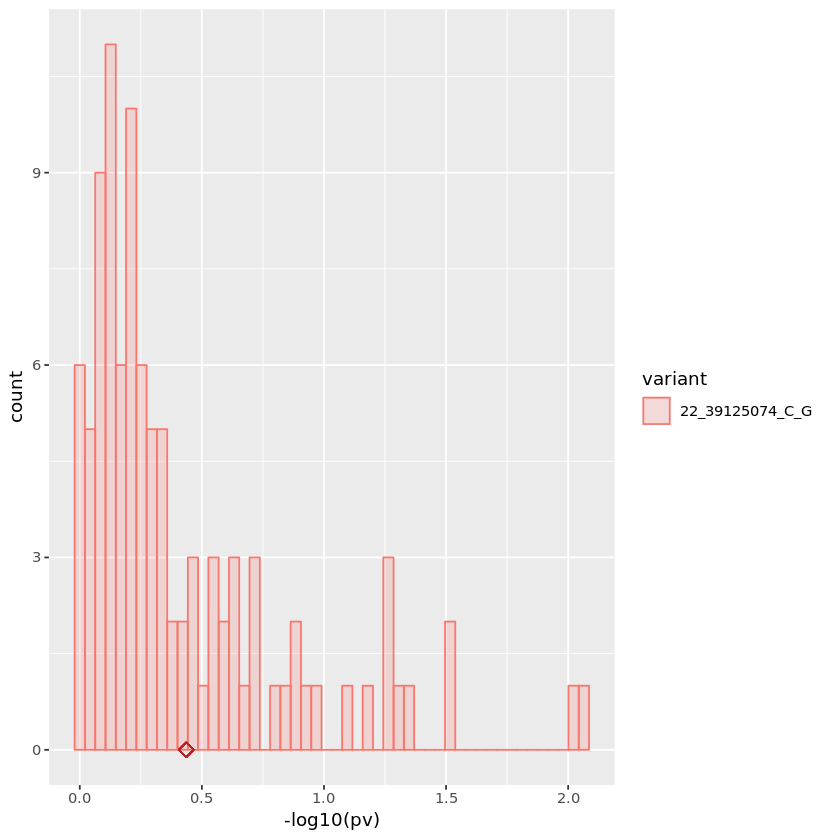

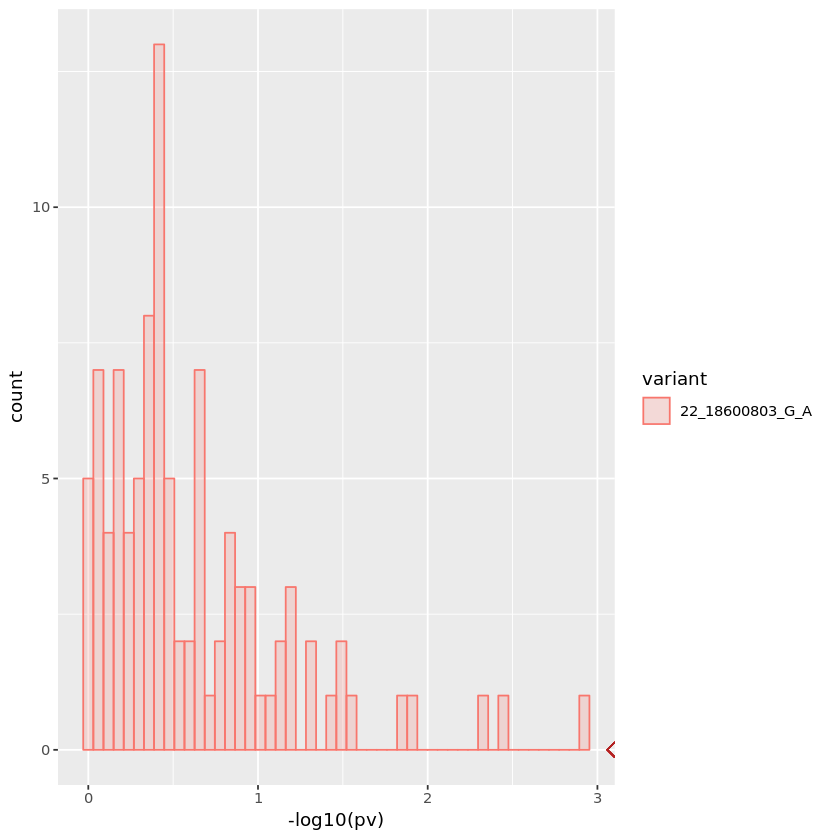

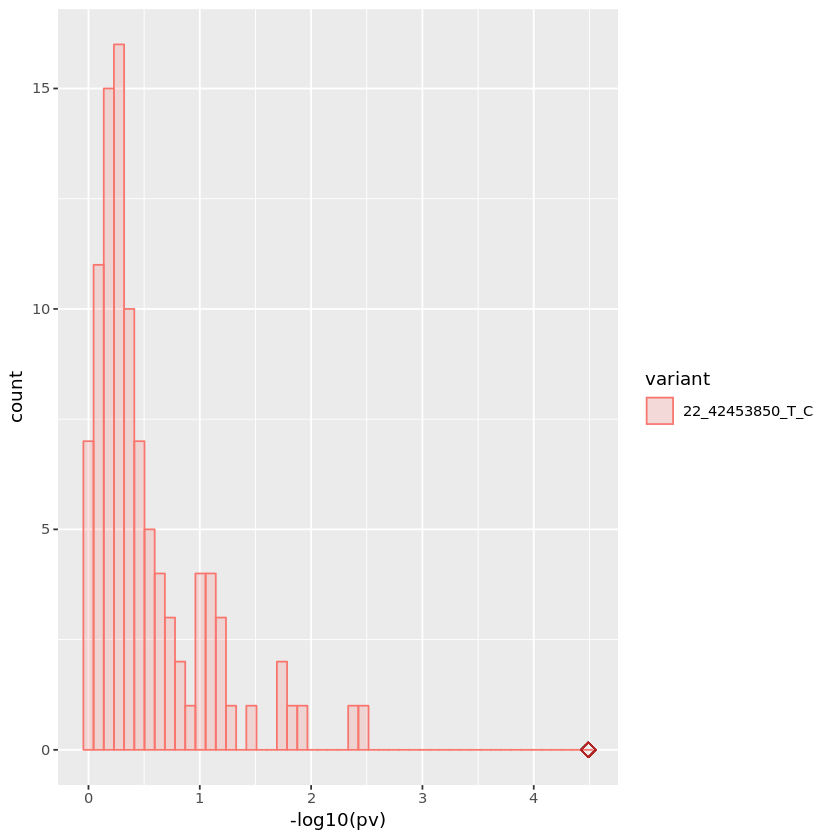

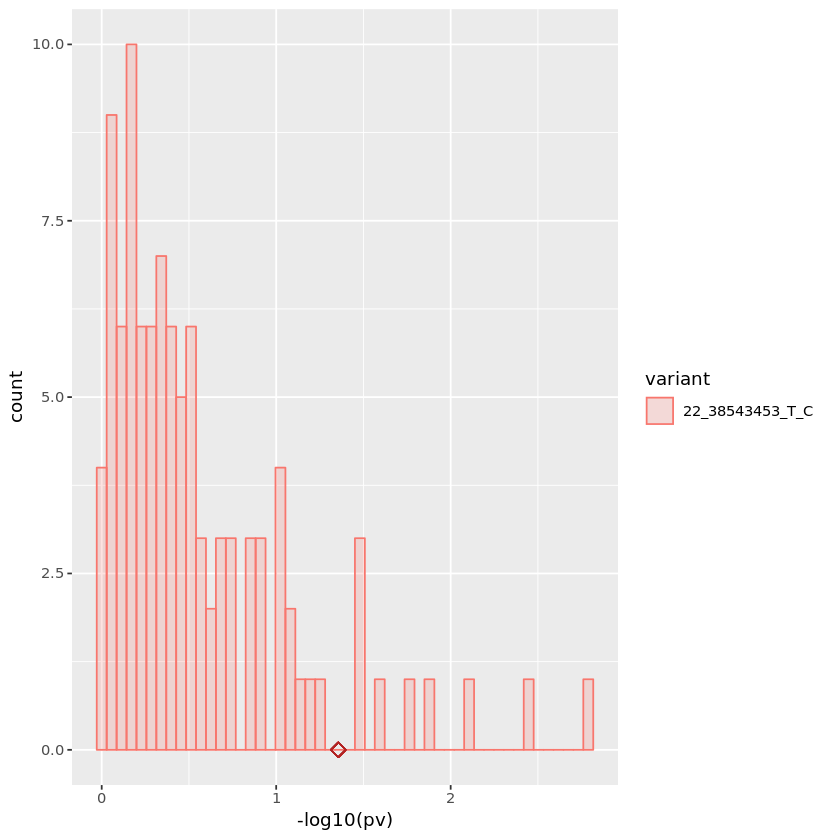

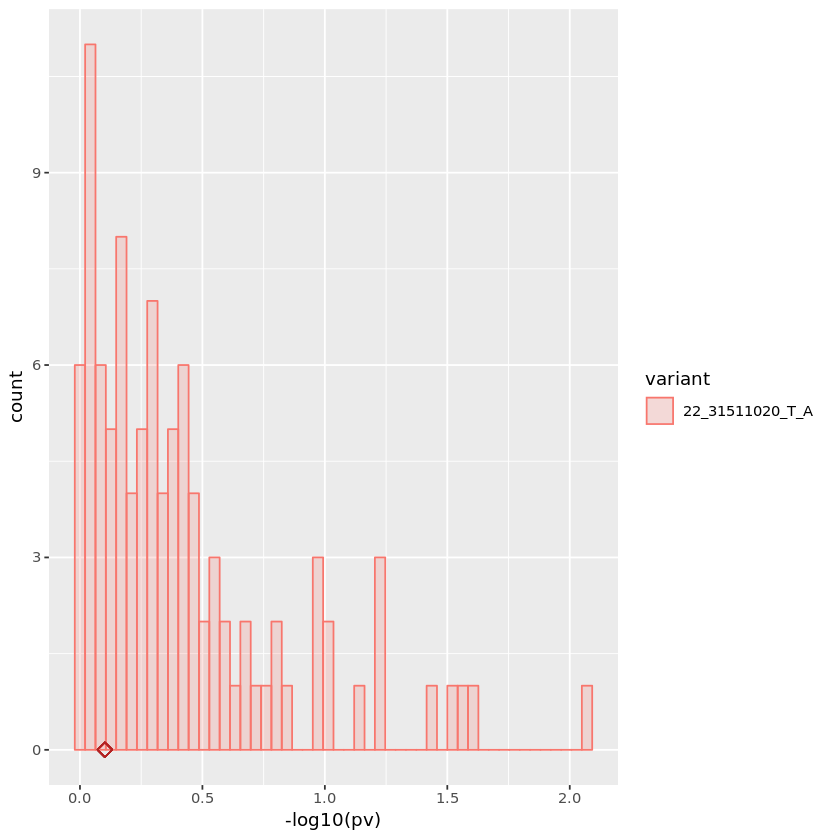

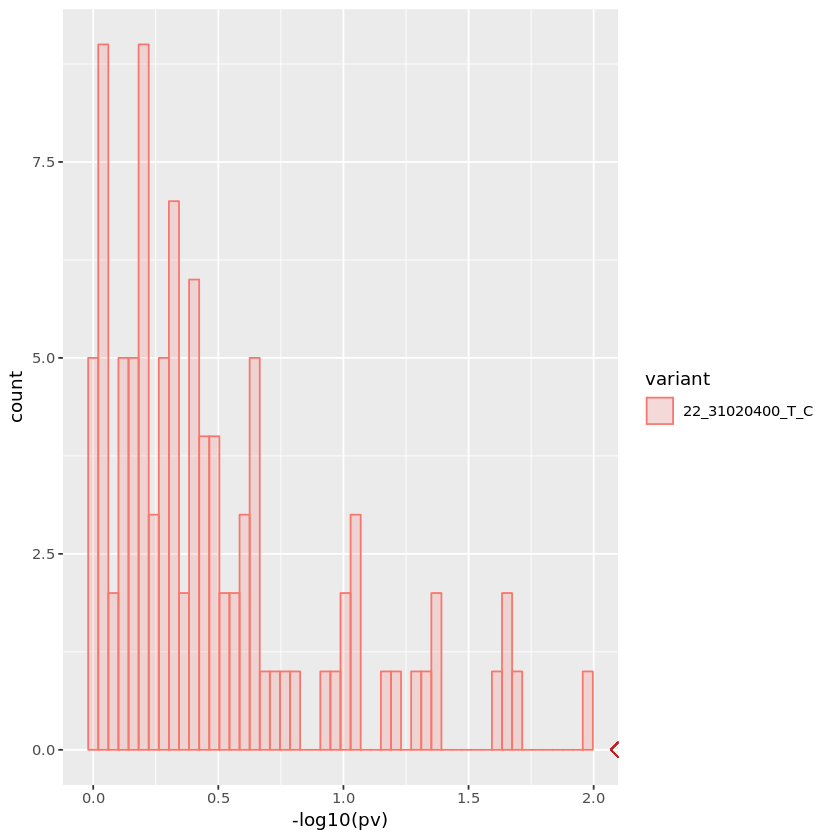

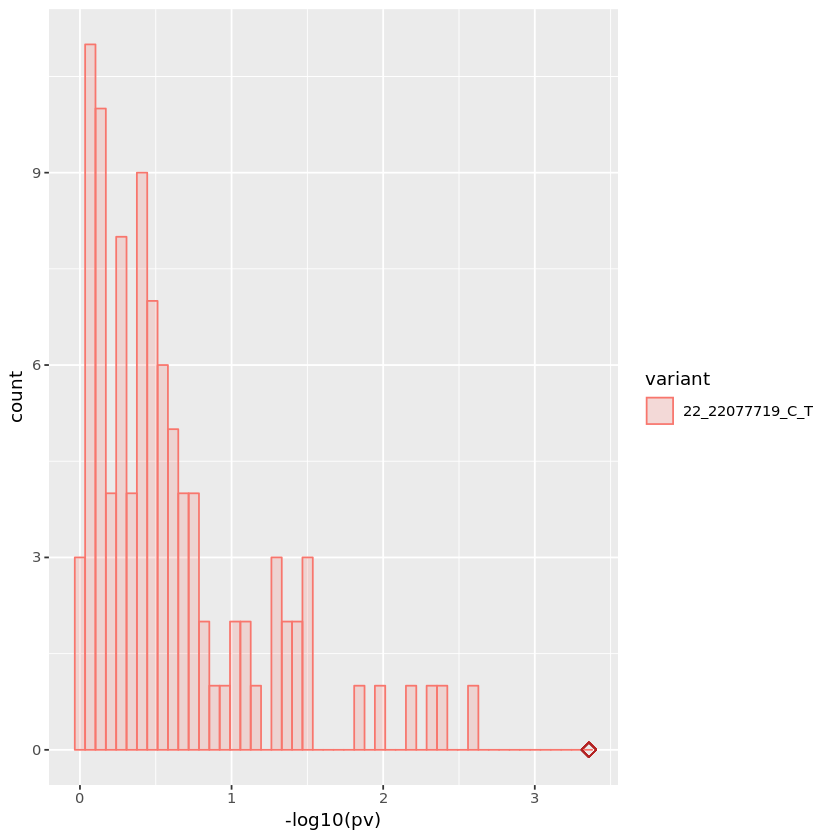

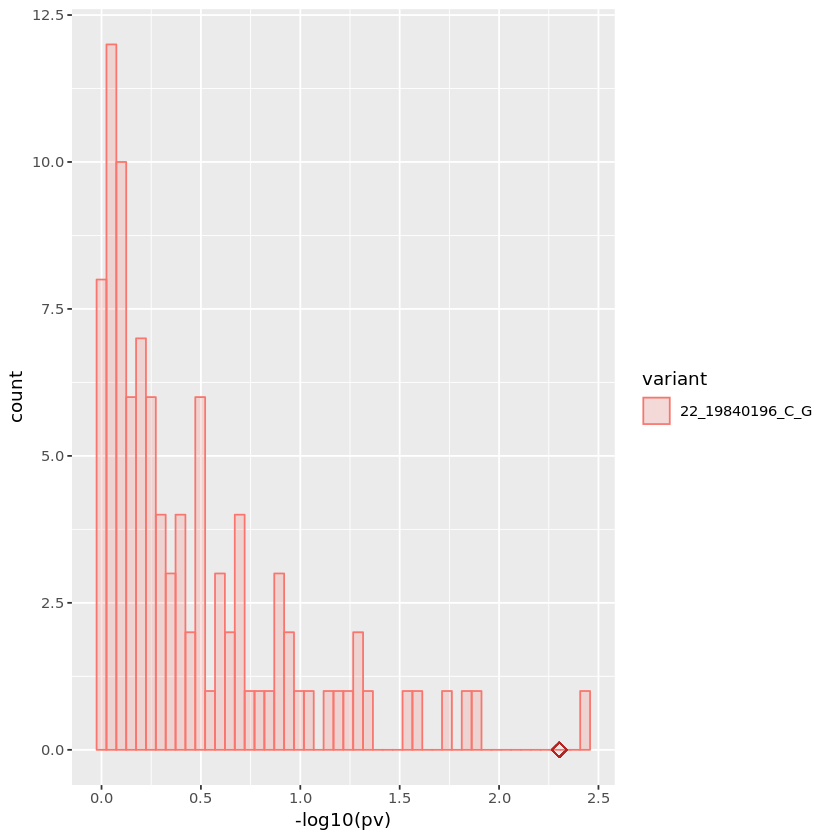

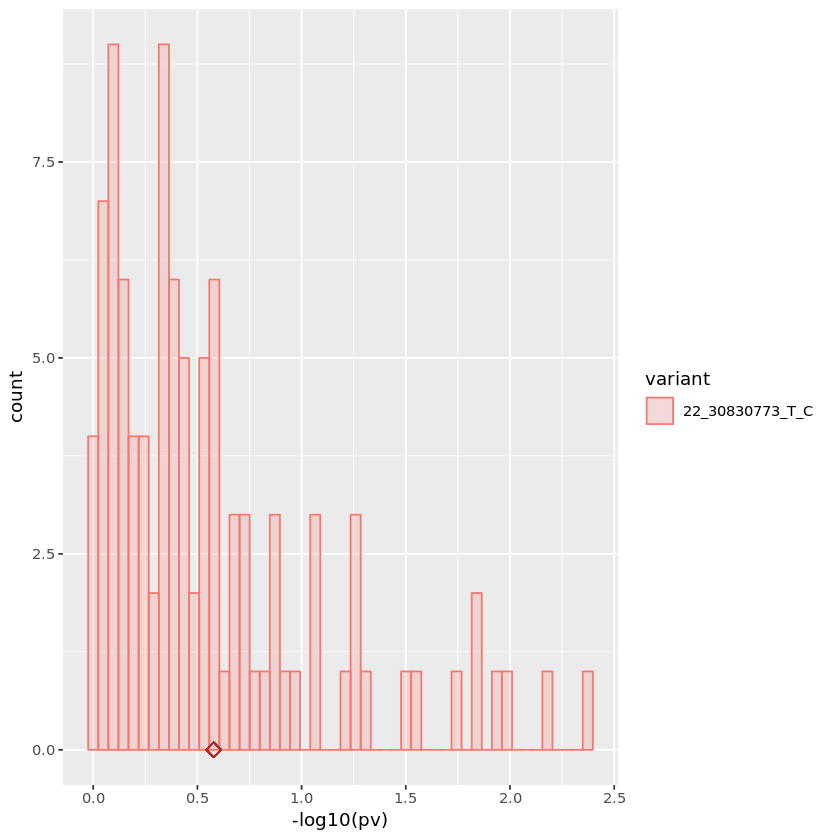

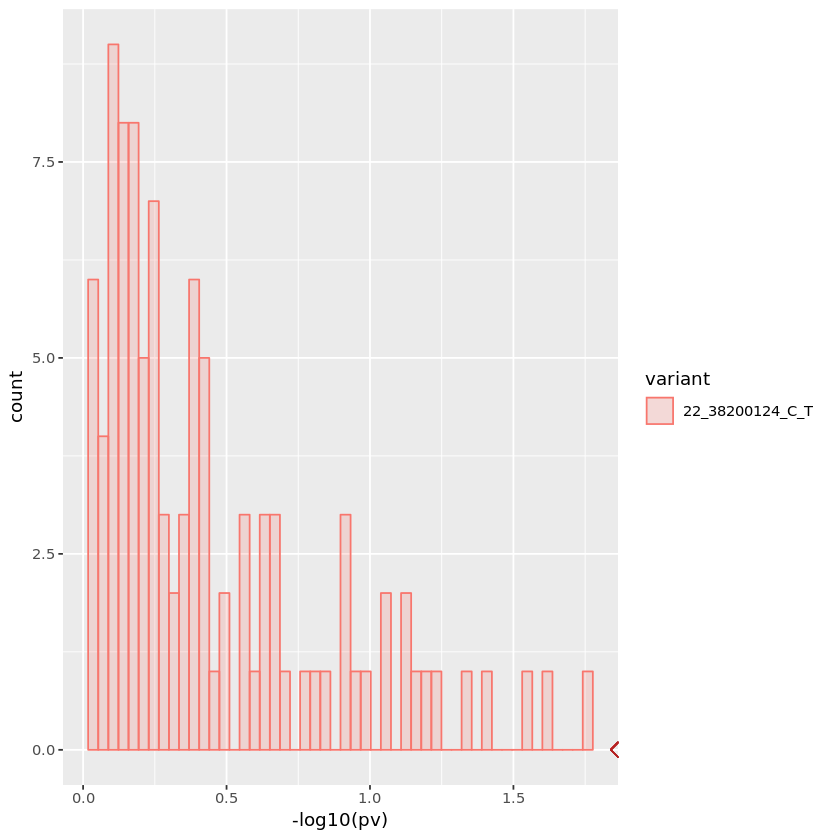

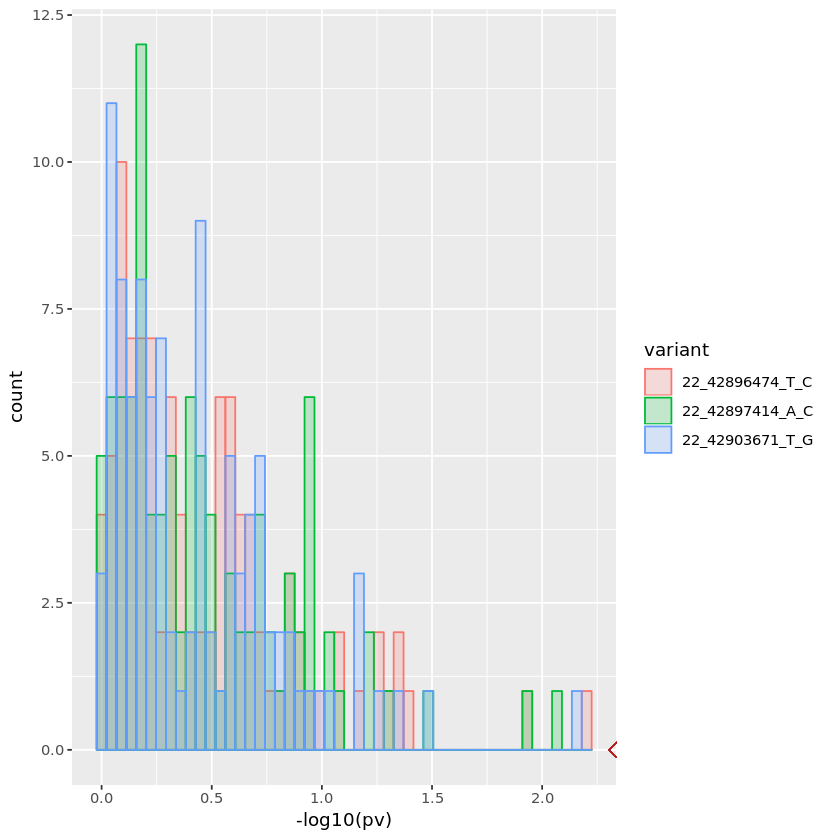

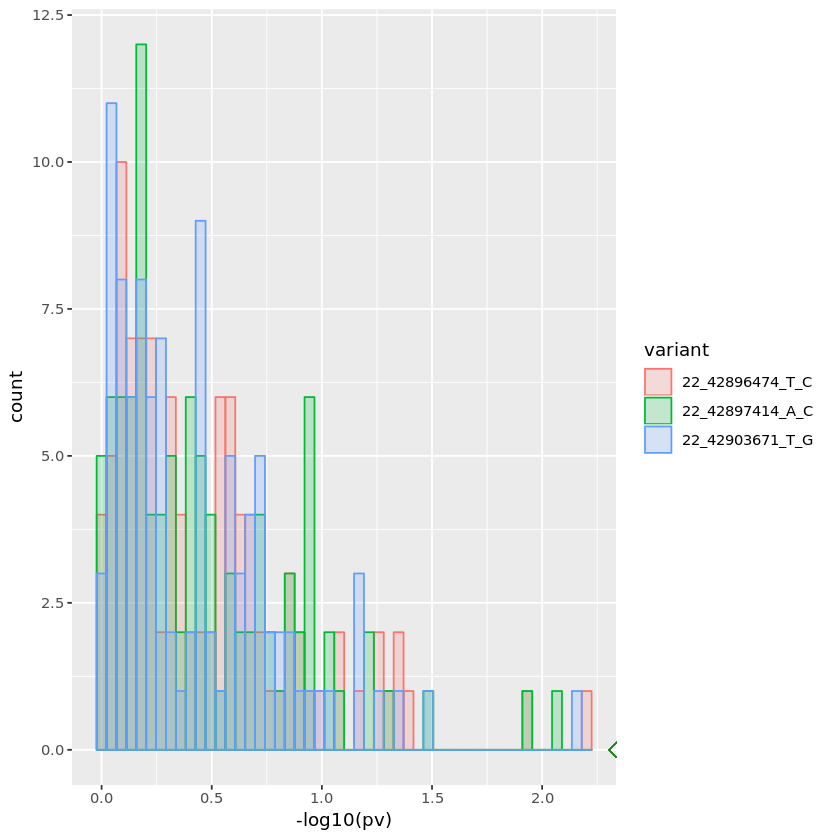

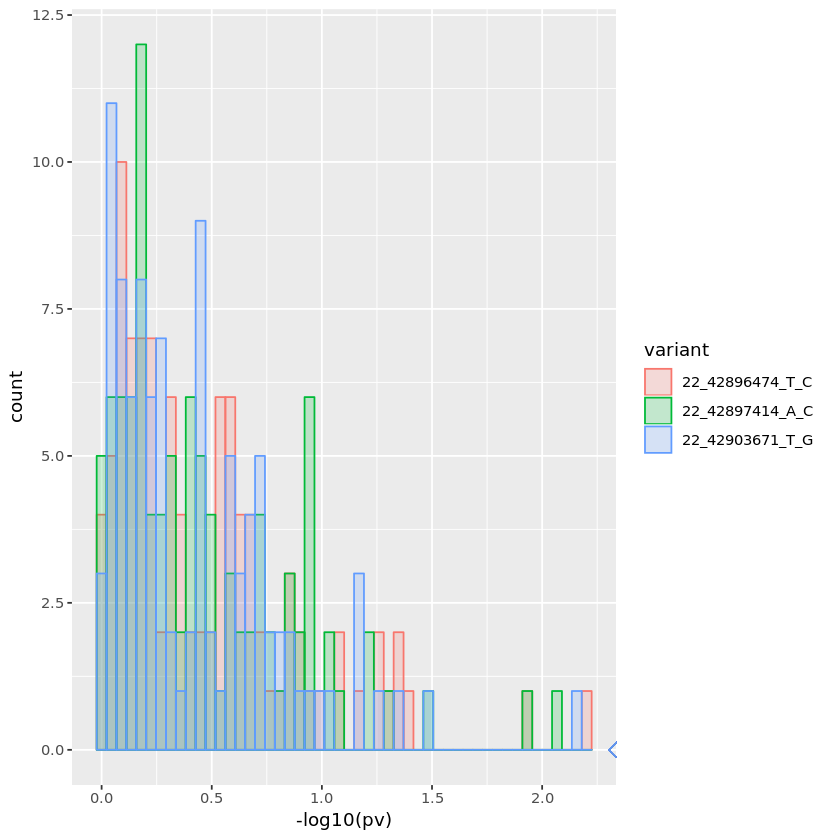

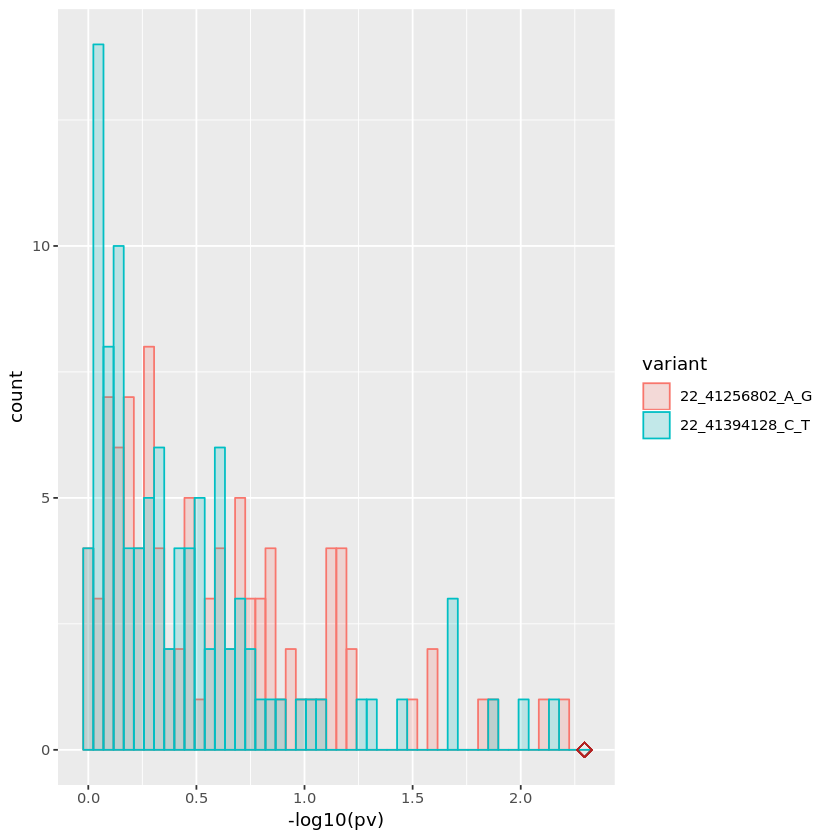

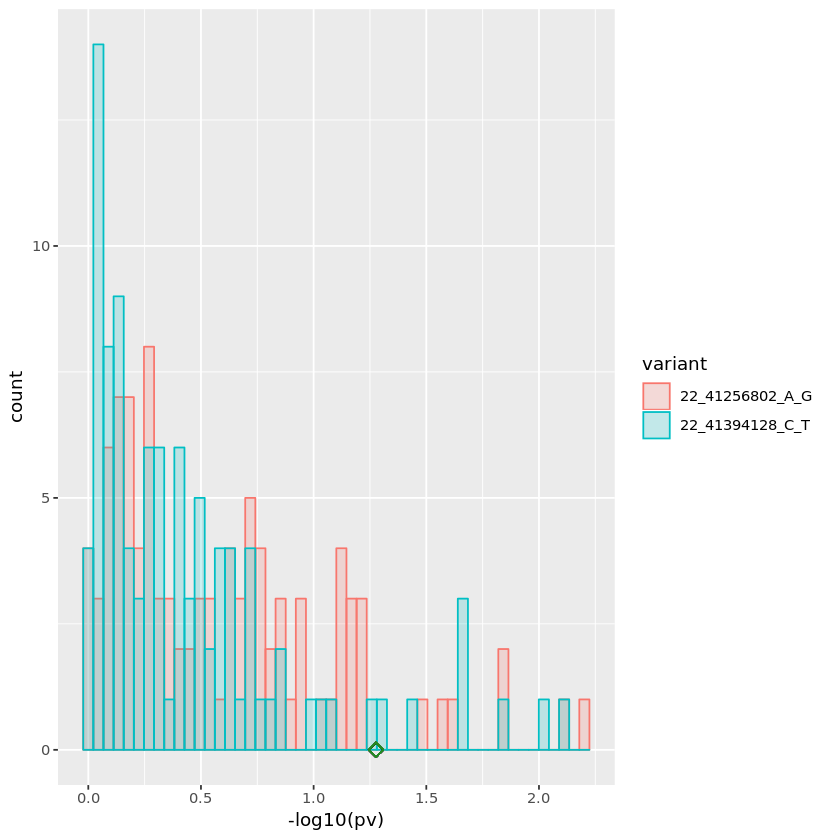

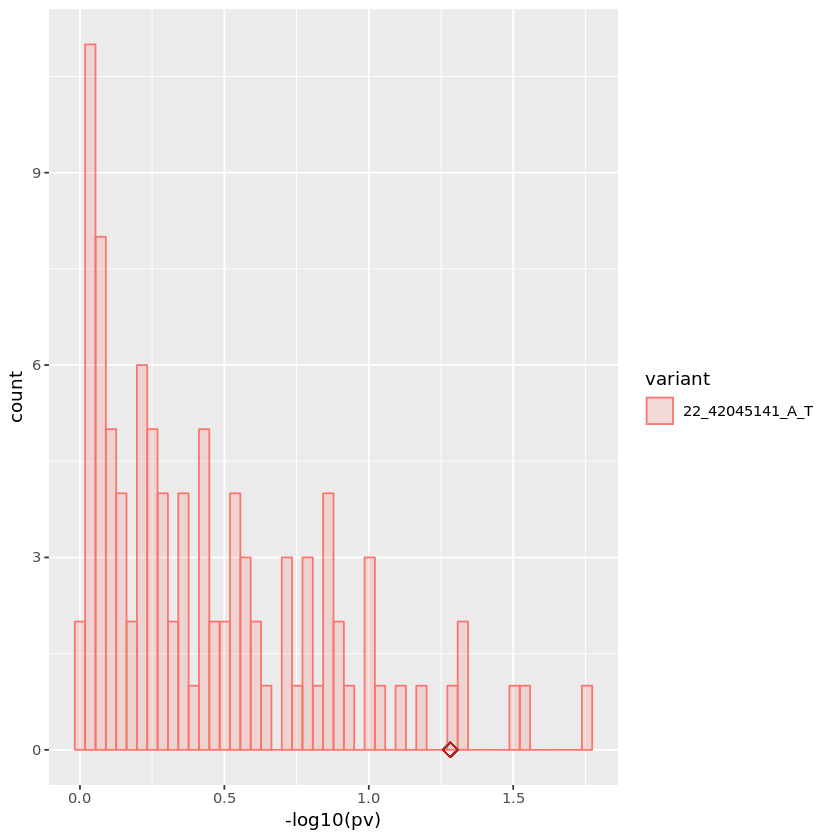

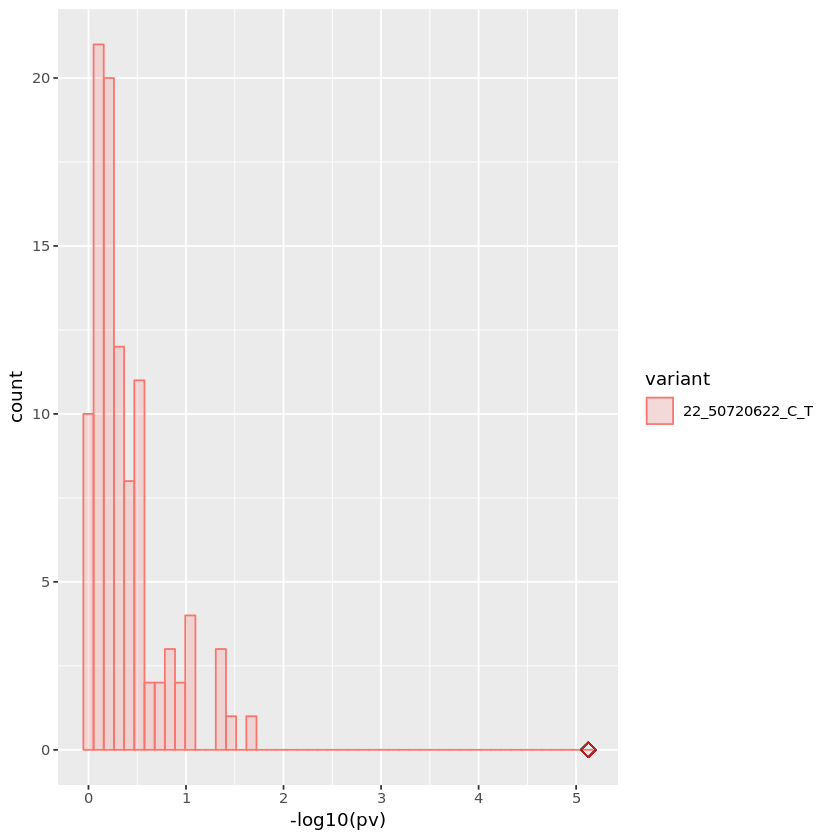

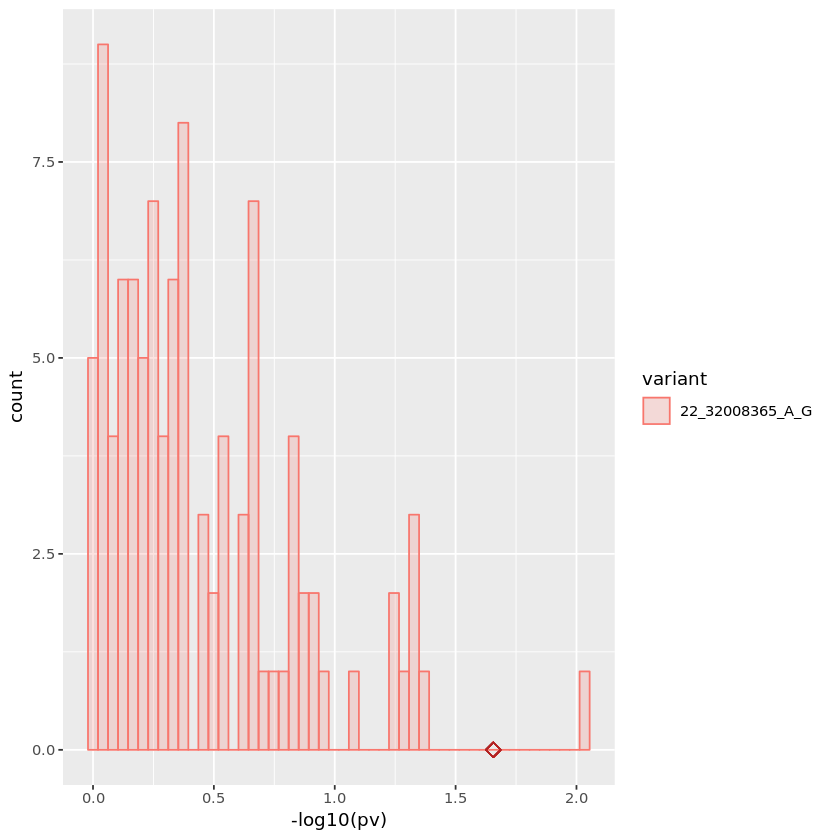

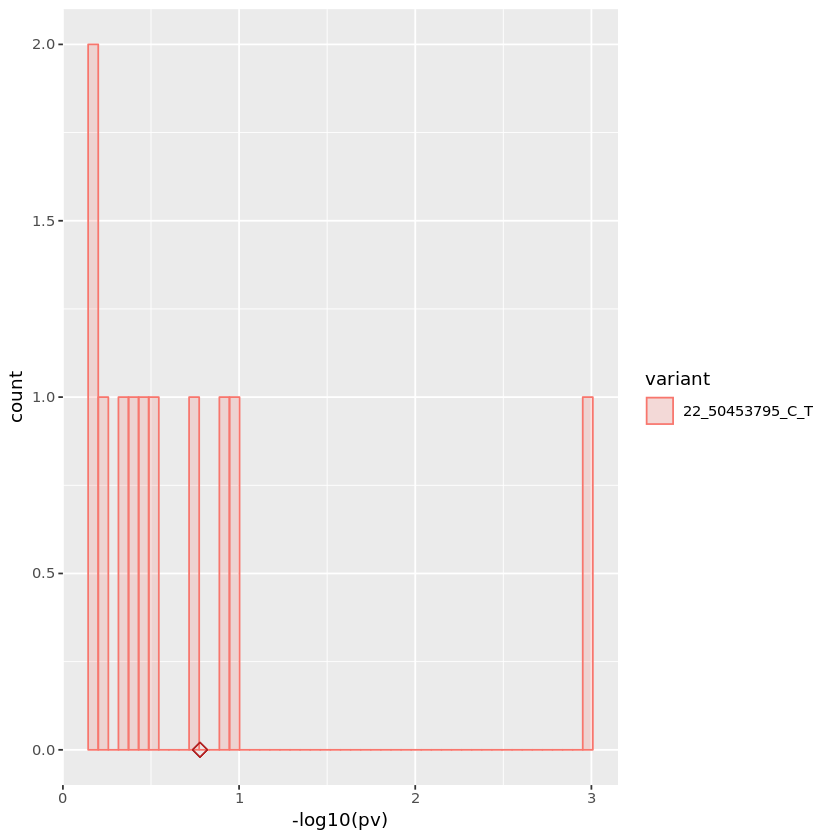

In [15]:
cols = c("firebrick","forestgreen","cornflowerblue")
for (gene in unique(df$gene)){
    df_plot = df[df$gene == gene,]
    df_plot$variant = as.character(df_plot$variant)
    nsnps = length(unique(df_plot$variant))
    p = ggplot(df_plot, aes(x = -log10(pv))) 
    p = p + geom_histogram(aes(color = variant, fill = variant), alpha = 0.2, position = "identity", bins = 50)
#     print(p)
    for (i in 1:nsnps){
        p_real = df0[df0$gene == gene & df0$variant == unique(df_plot$variant)[i],"pv_raw"]
        p = p + geom_point(aes(x = -log10(p_real),y = 0), col = cols[i], alpha = 0.5, pch = 23, size = 3)
        print(p)
    }
}

In [14]:
##############################
##############################
##############################
##############################

In [113]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/1mofa_factor_endo_eqtl/summary_endo_eqtl.csv"
df0 = read.csv(filename, row.names = 1)
df0$variant = df0$snpID
head(df0)

gene                    n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A   3      3.928081e-09 22_42896474_T_C 1.178424e-08
1 ENSG00000189306_RRP7A   3      7.479951e-11 22_42897414_A_C 2.243985e-10
2 ENSG00000189306_RRP7A   3      2.721076e-16 22_42903671_T_G 8.163229e-16
3 ENSG00000196236_XPNPEP3 2      3.169915e-06 22_41256802_A_G 6.339831e-06
4 ENSG00000196236_XPNPEP3 2      7.020923e-05 22_41394128_C_T 1.404185e-04
5 ENSG00000185651_UBE2L3  1      2.179310e-03 22_22077719_C_T 2.179310e-03
  pv_adj    variant        
0 0.9864704 22_42896474_T_C
1 0.9864673 22_42897414_A_C
2 0.9864574 22_42903671_T_G
3 0.9864757 22_41256802_A_G
4 0.9864782 22_41394128_C_T
5 0.9864809 22_22077719_C_T

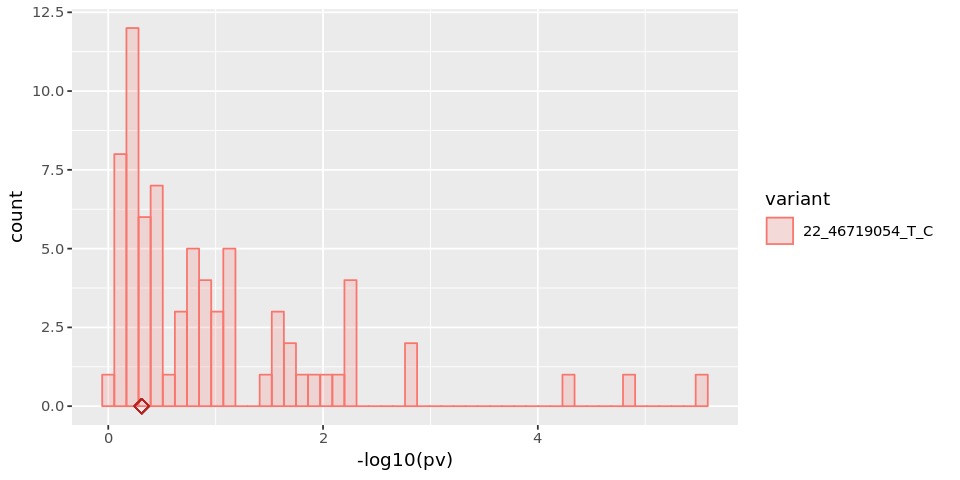

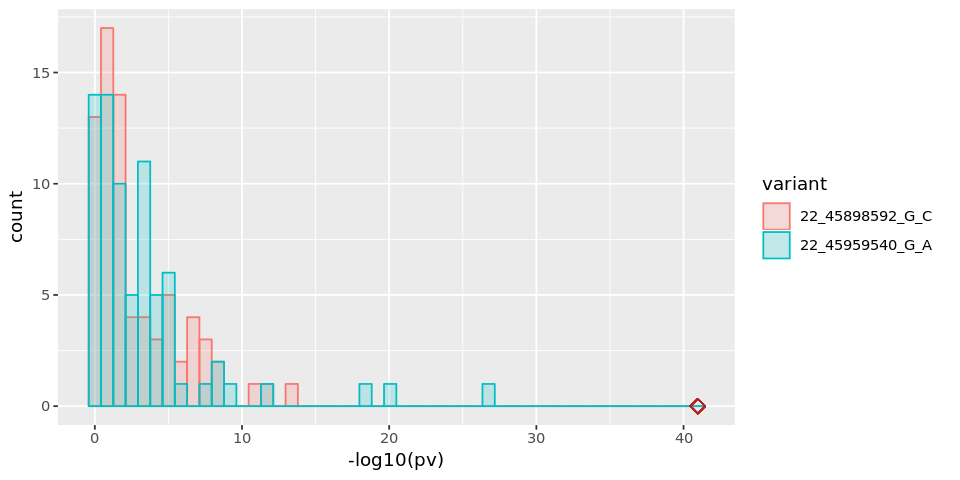

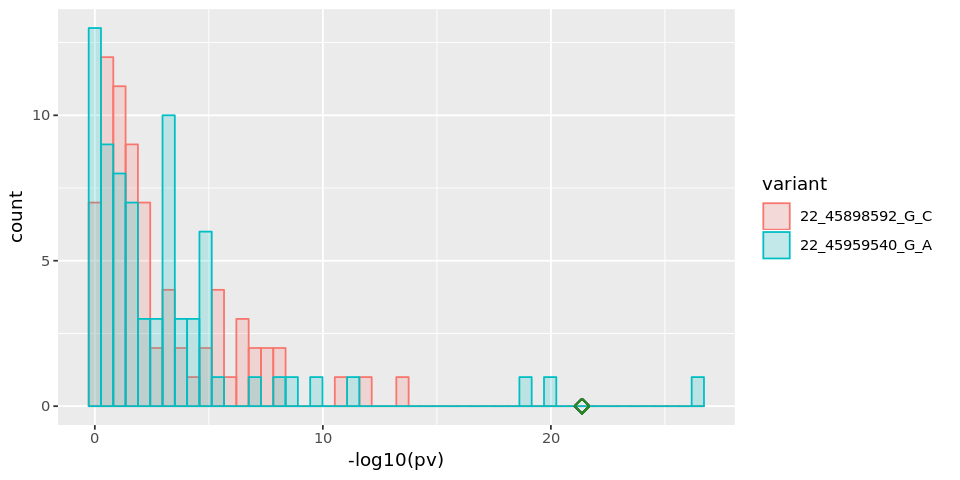

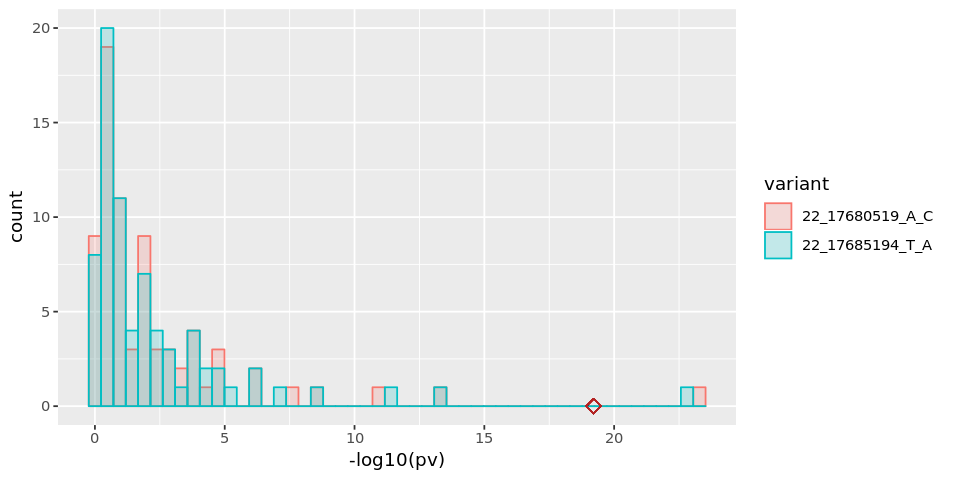

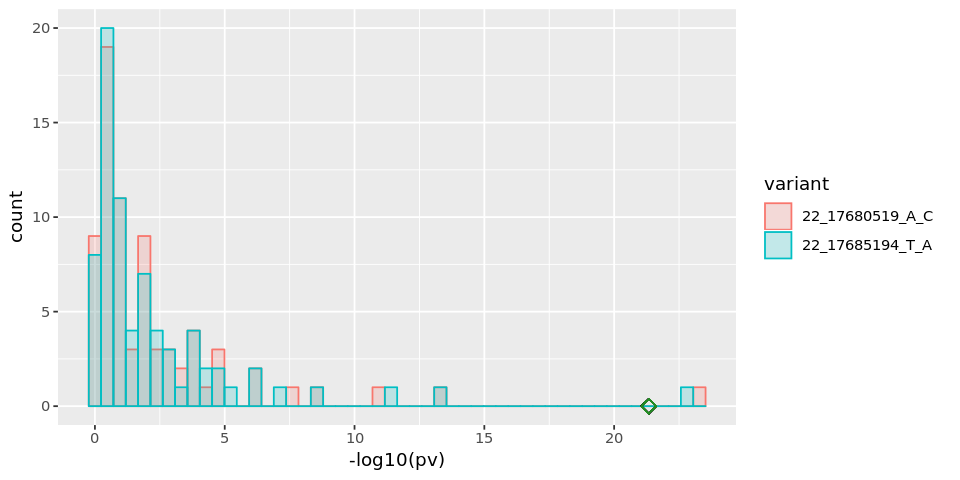

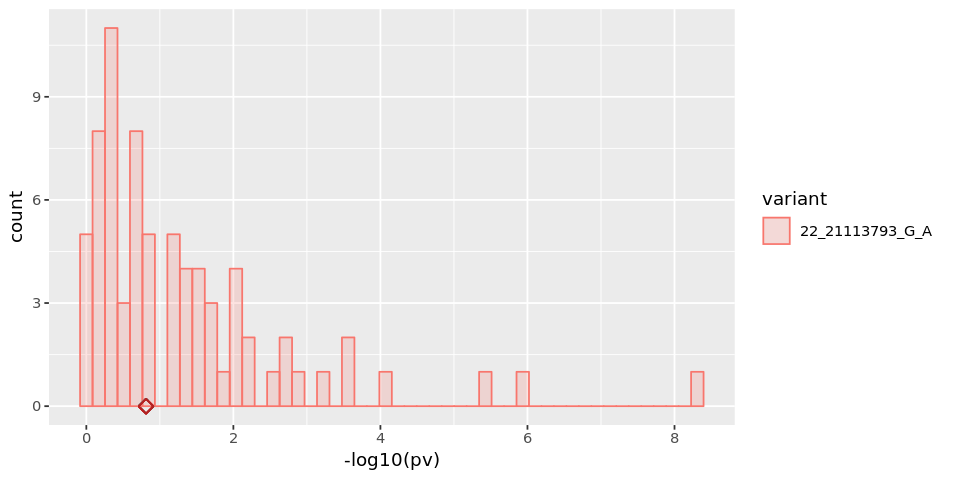

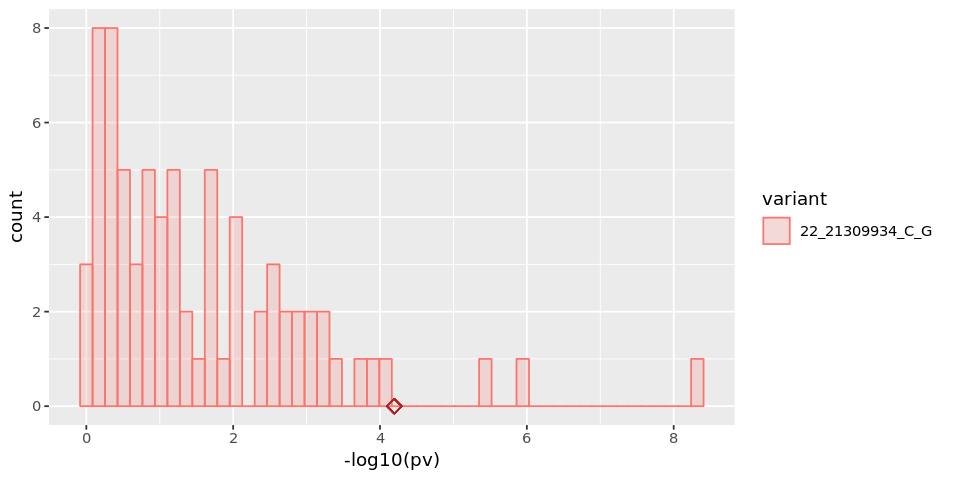

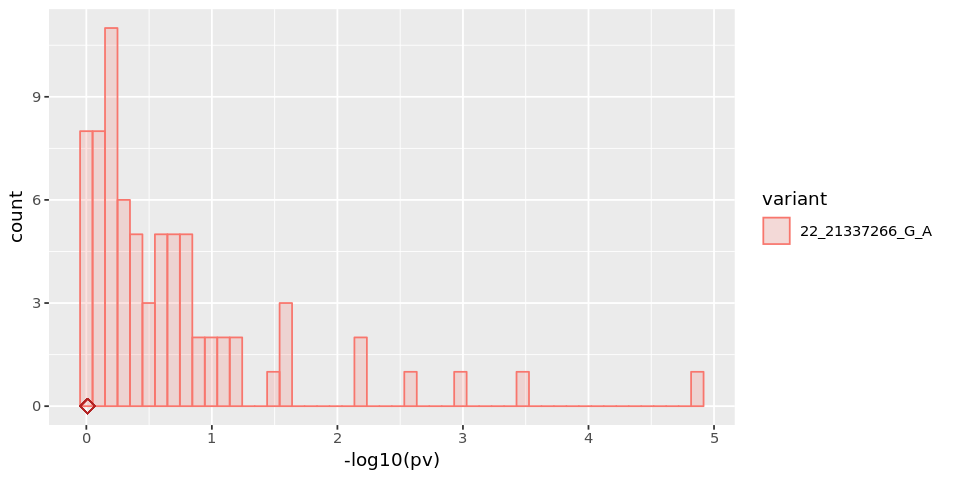

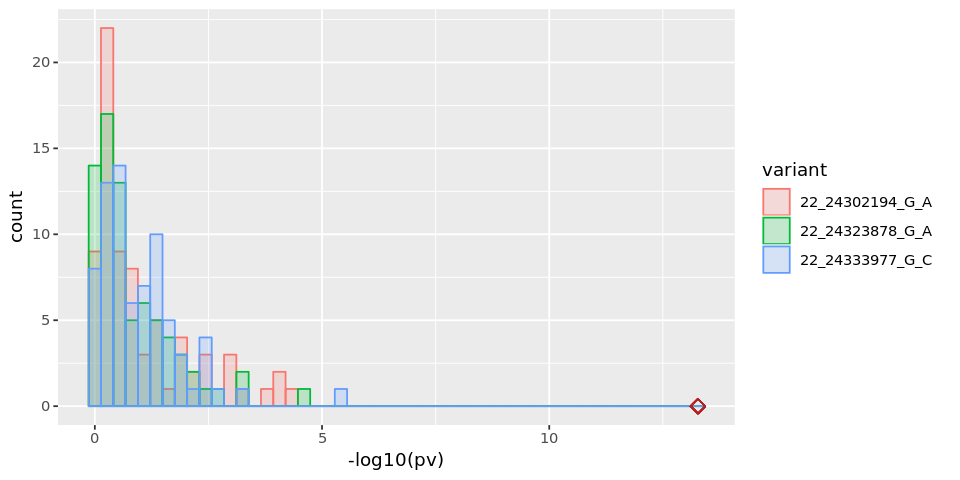

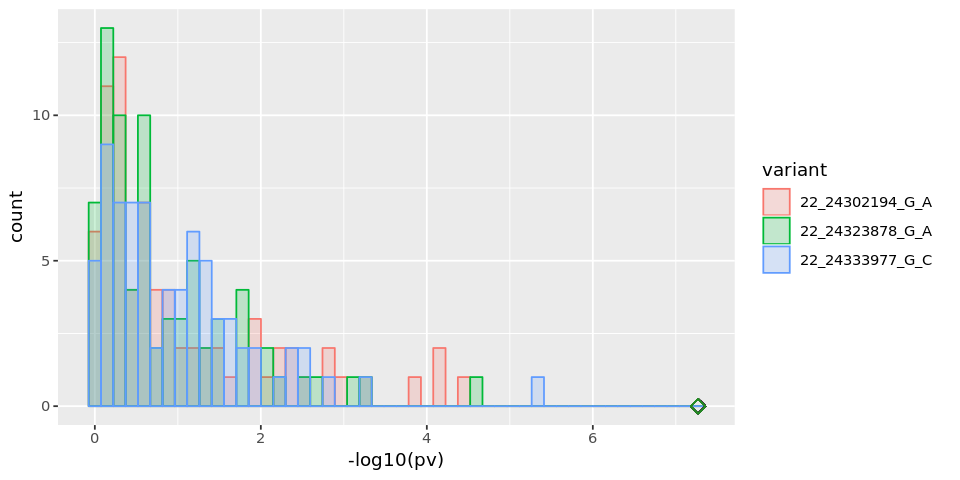

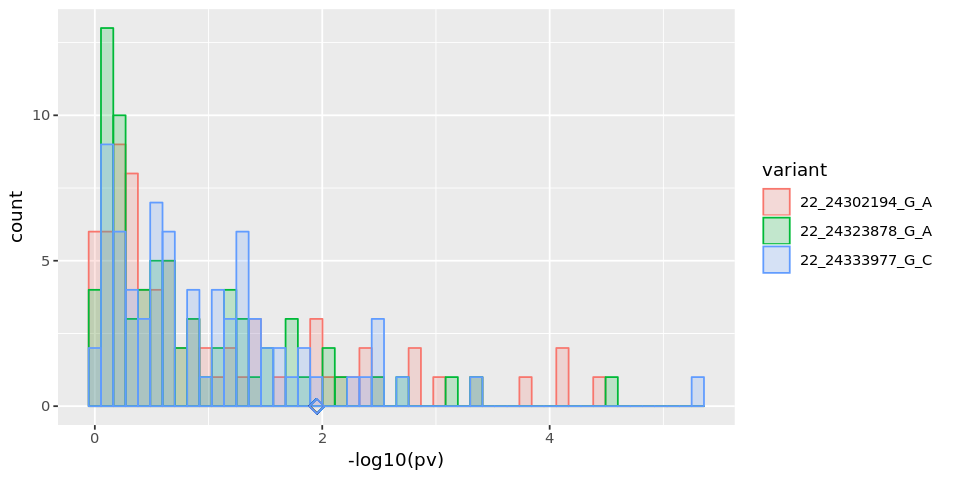

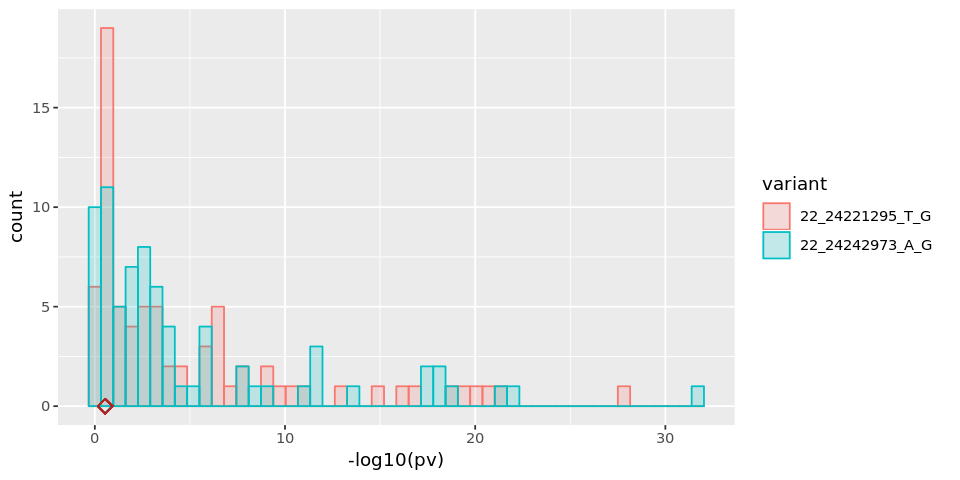

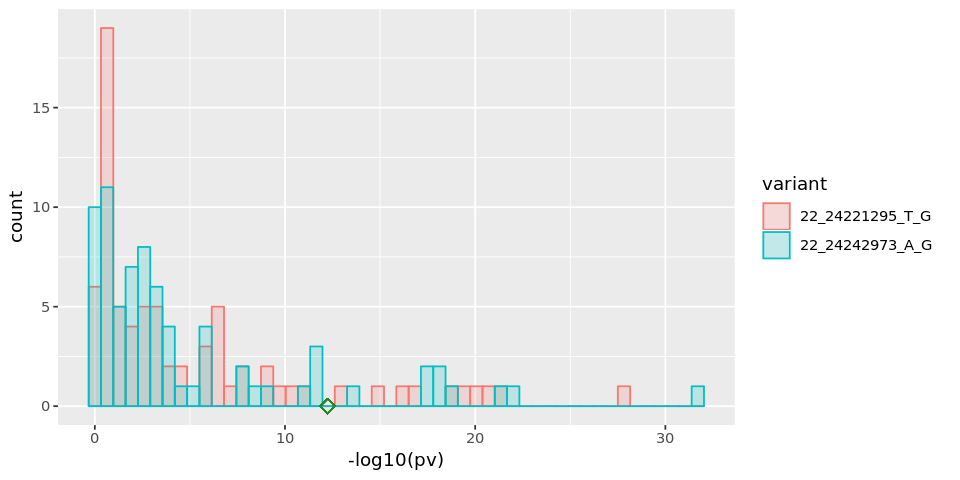

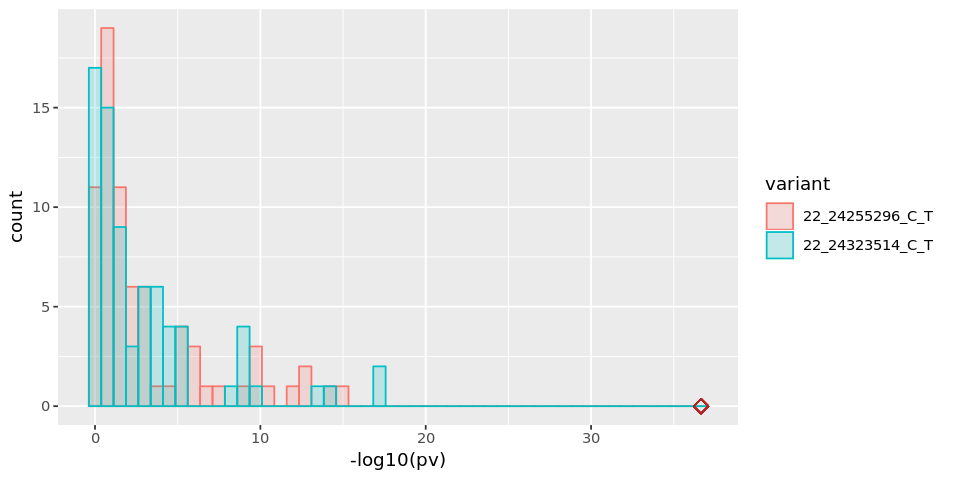

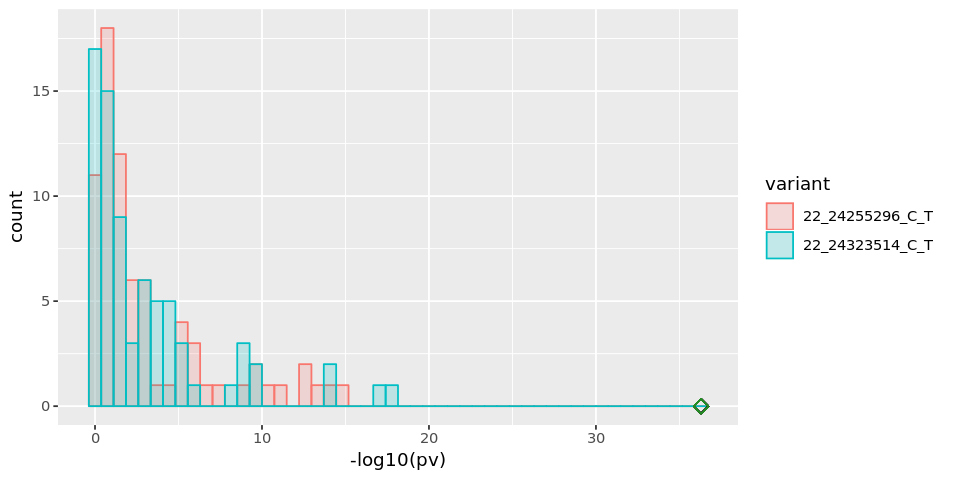

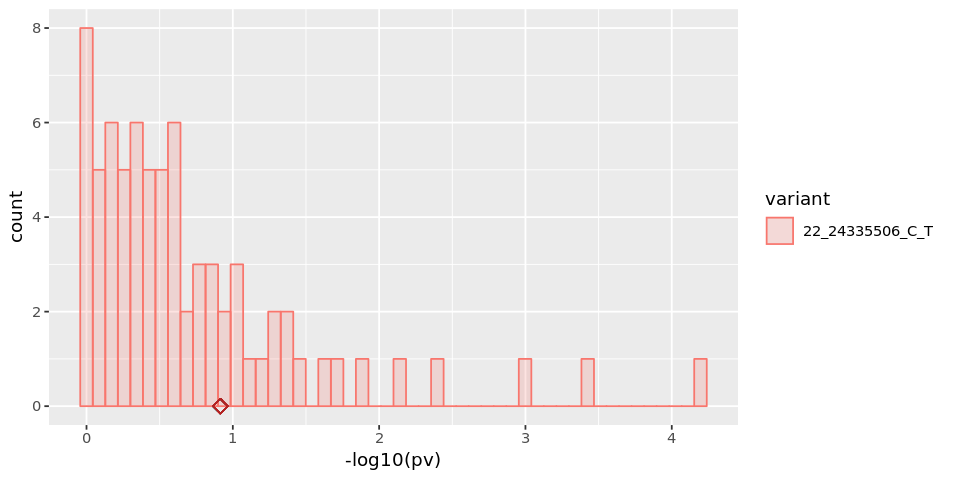

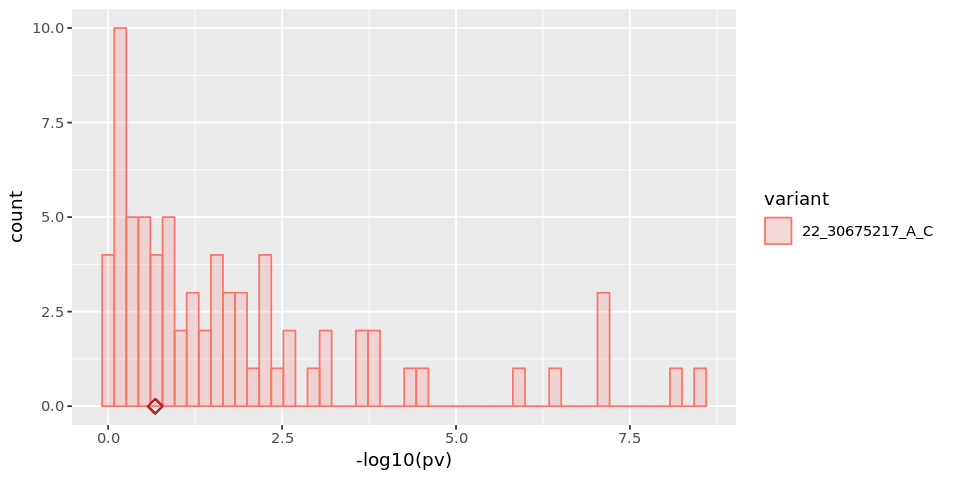

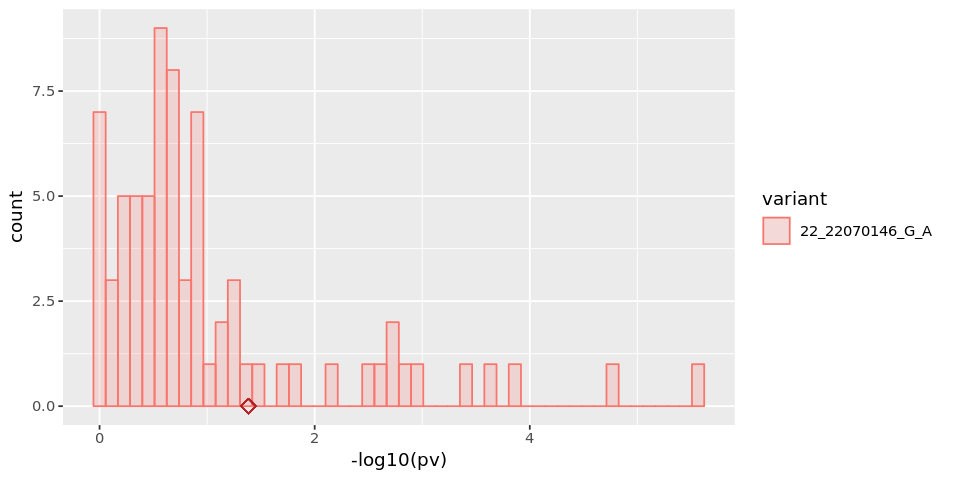

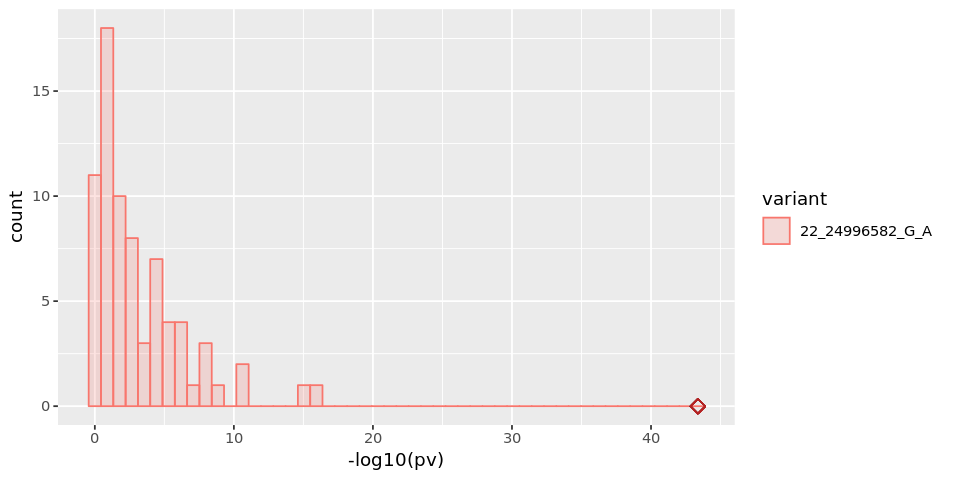

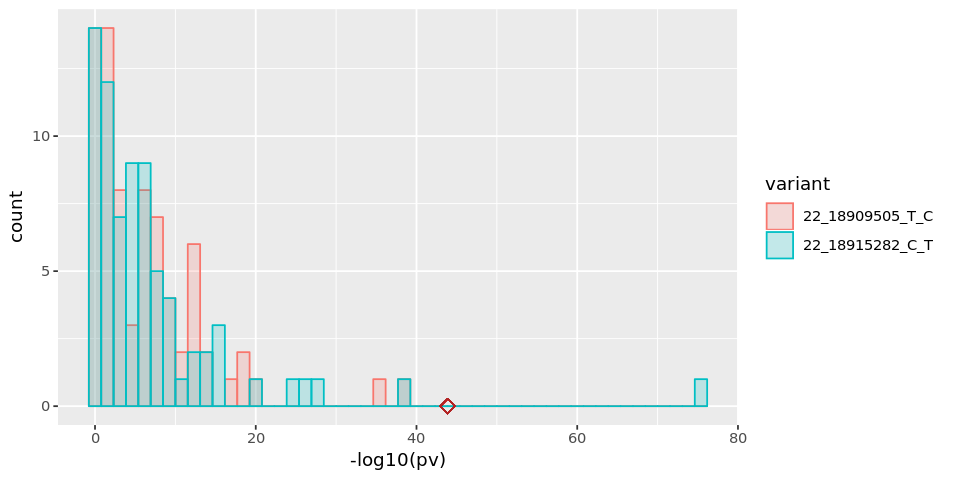

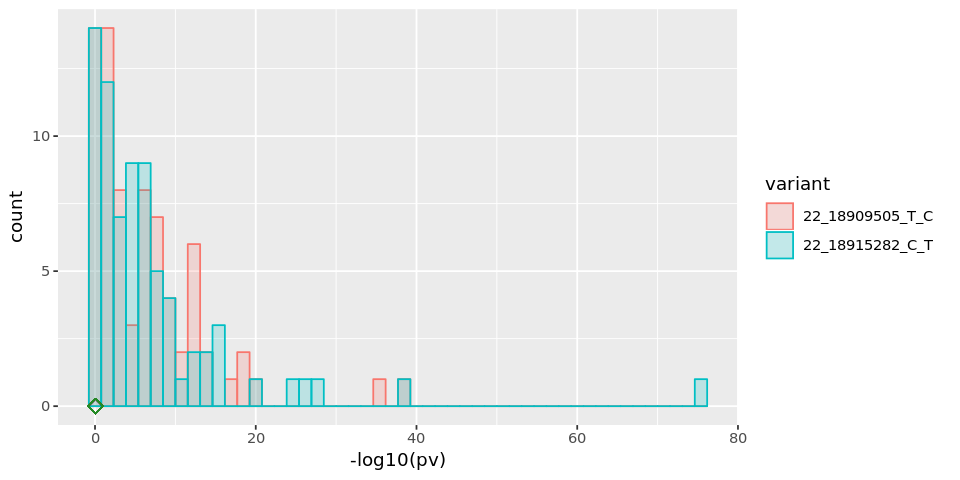

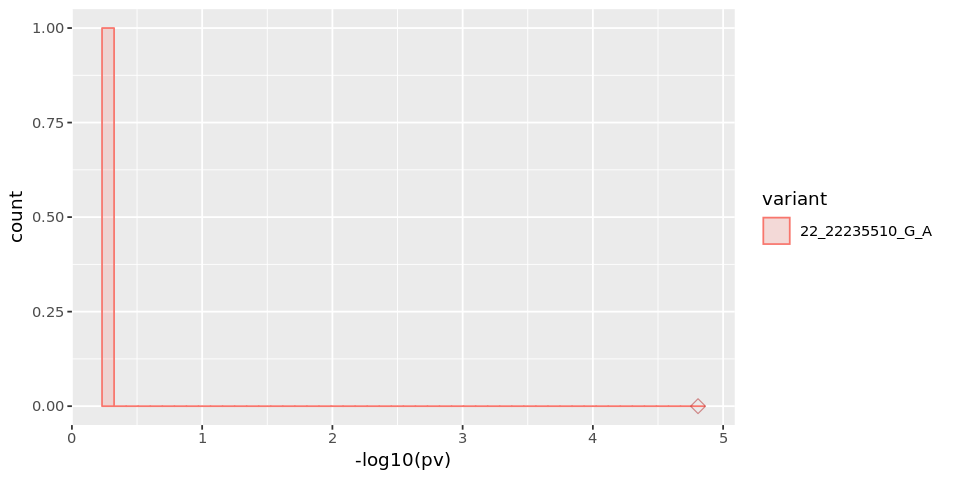

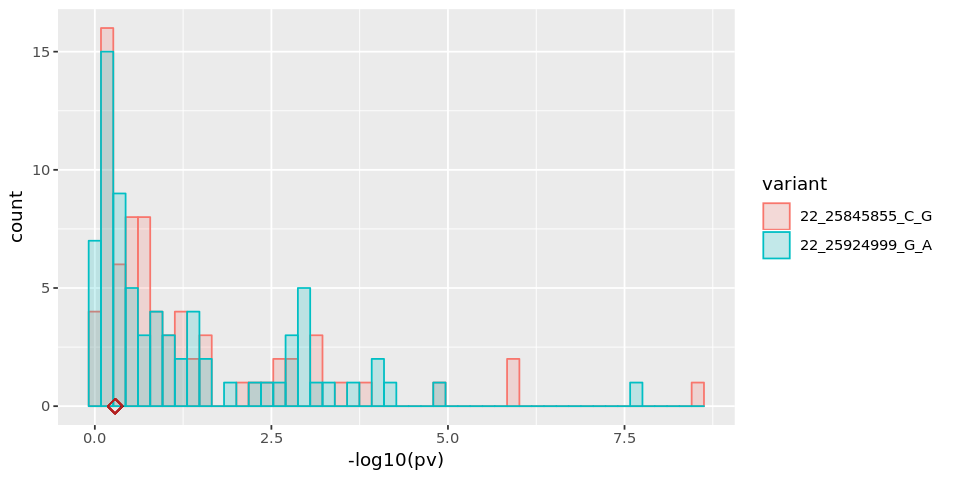

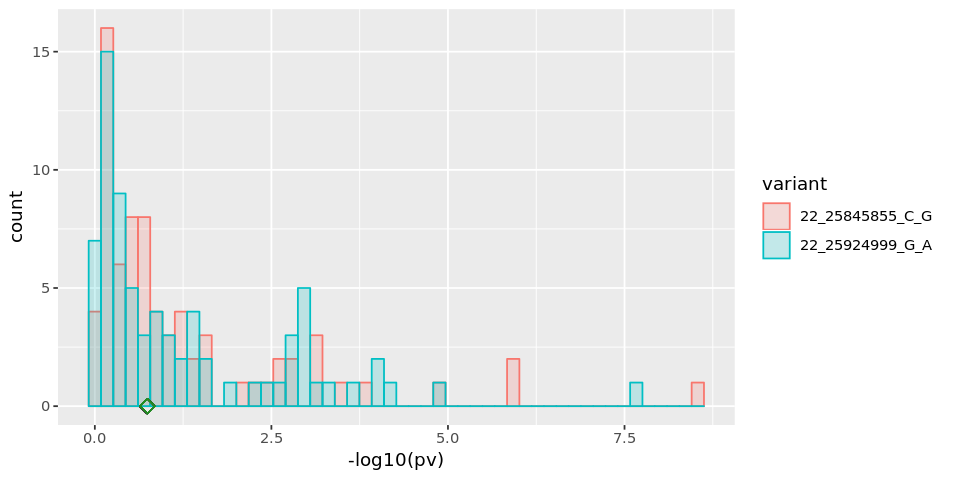

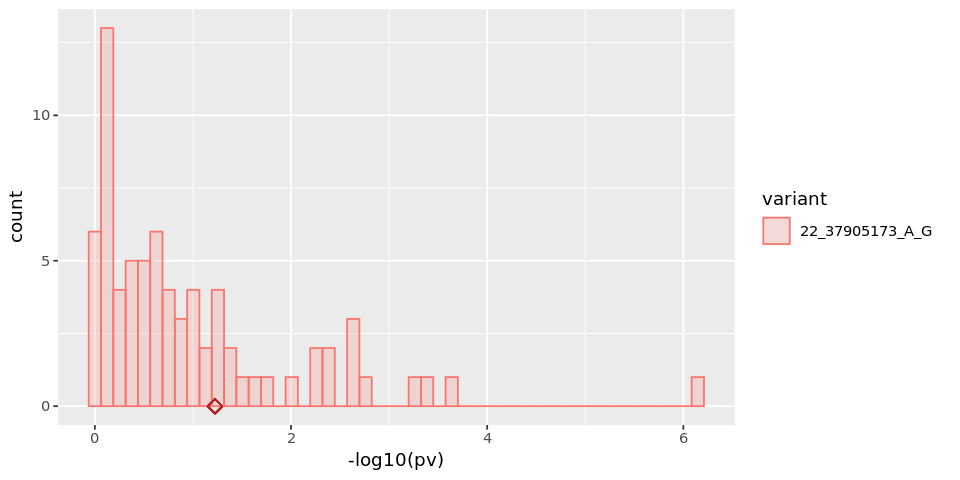

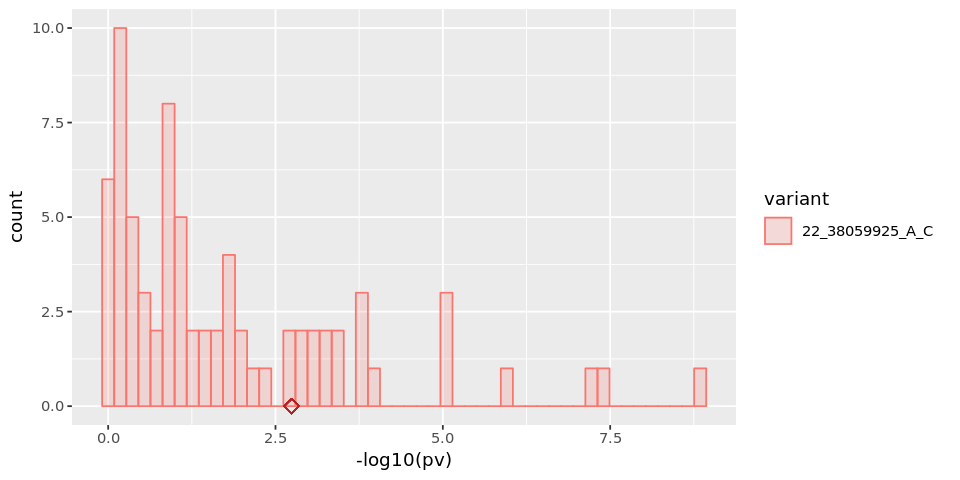

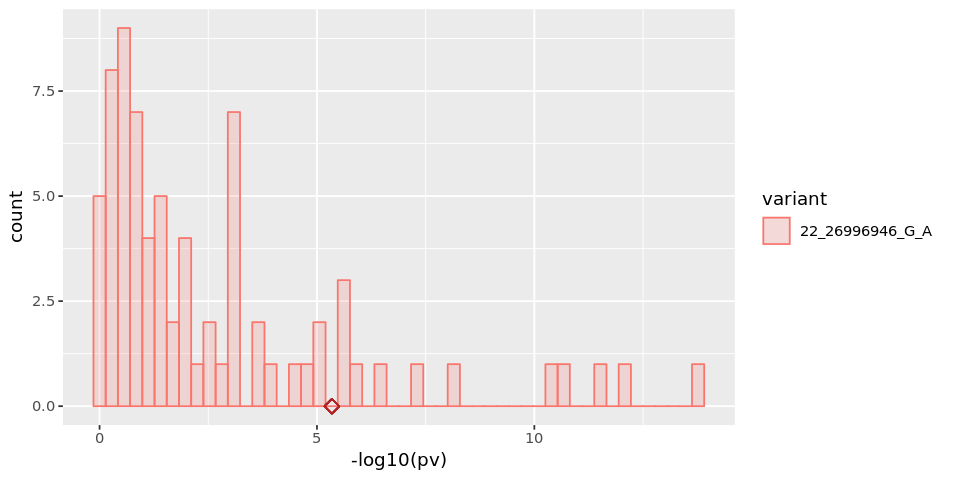

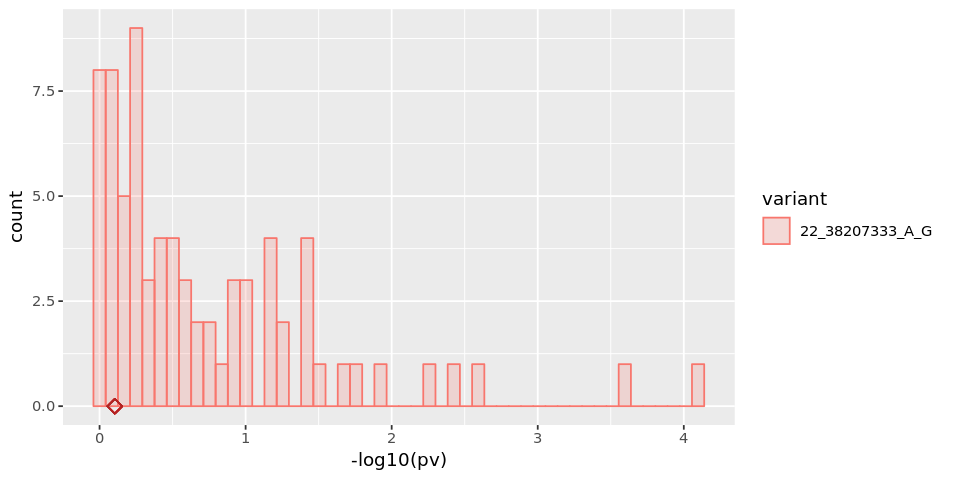

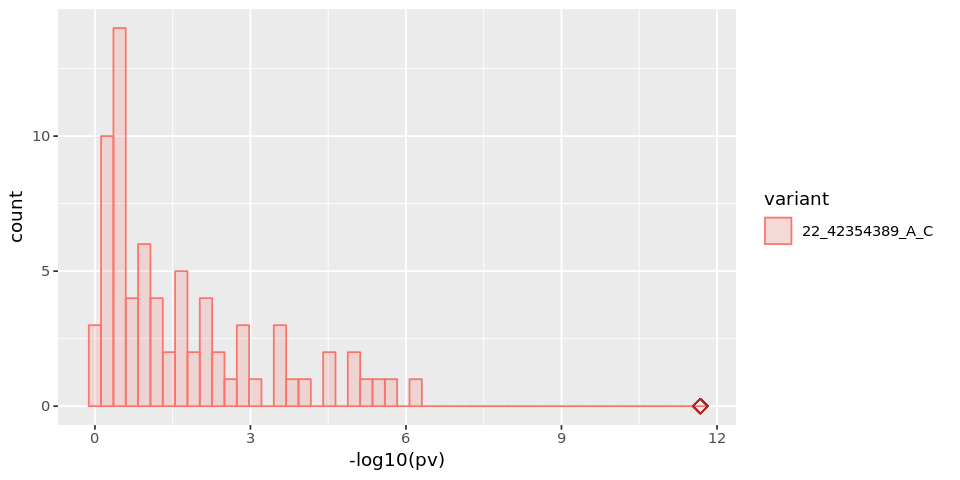

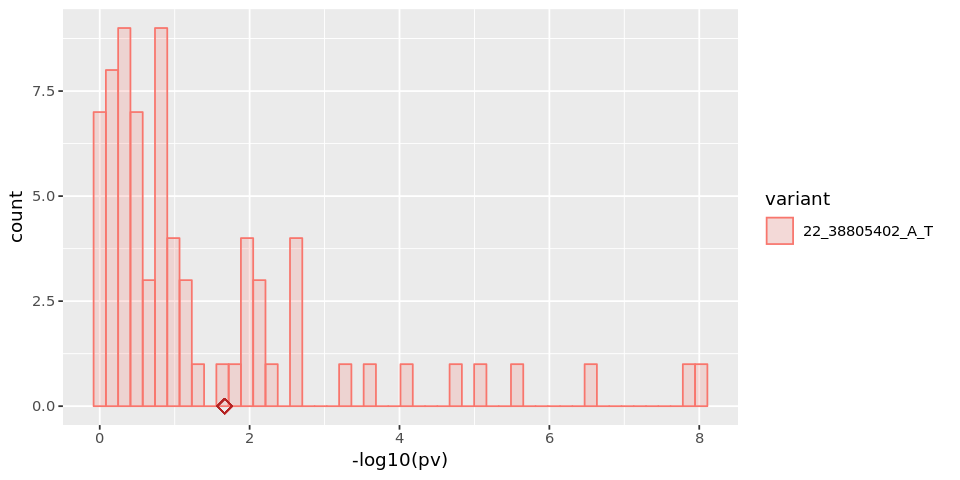

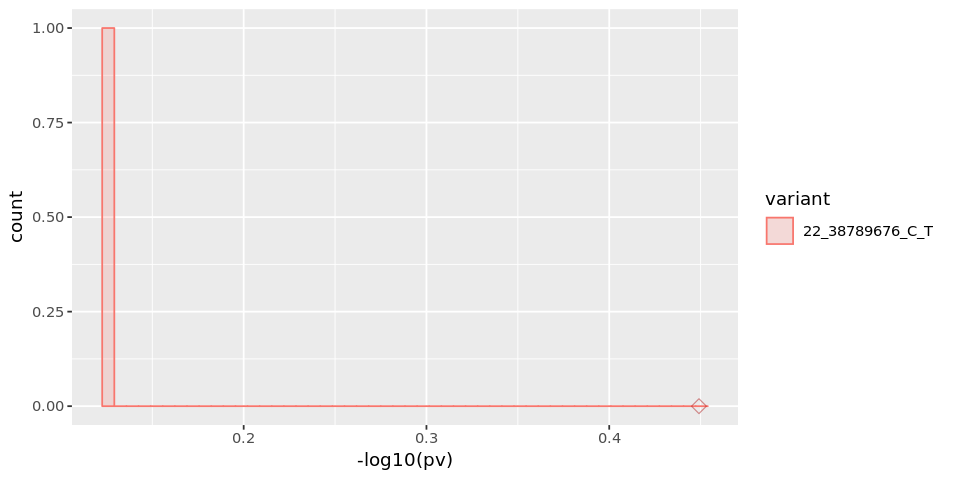

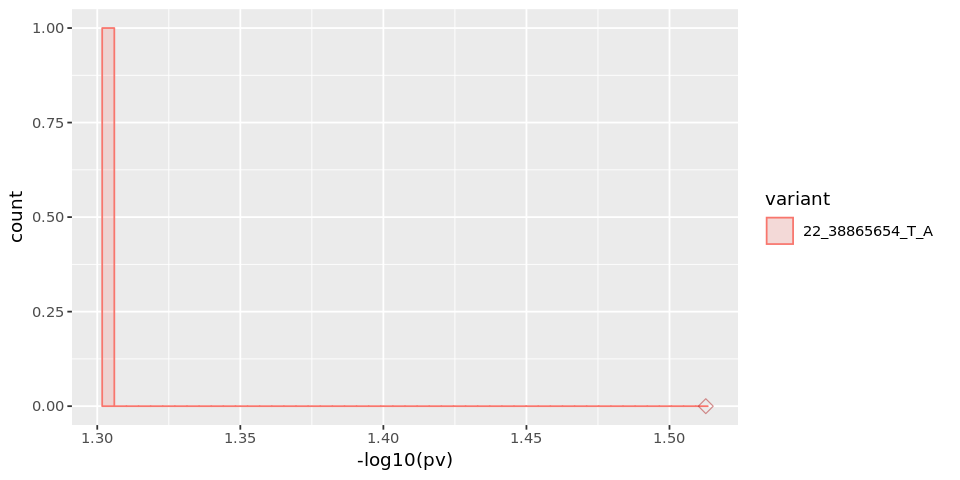

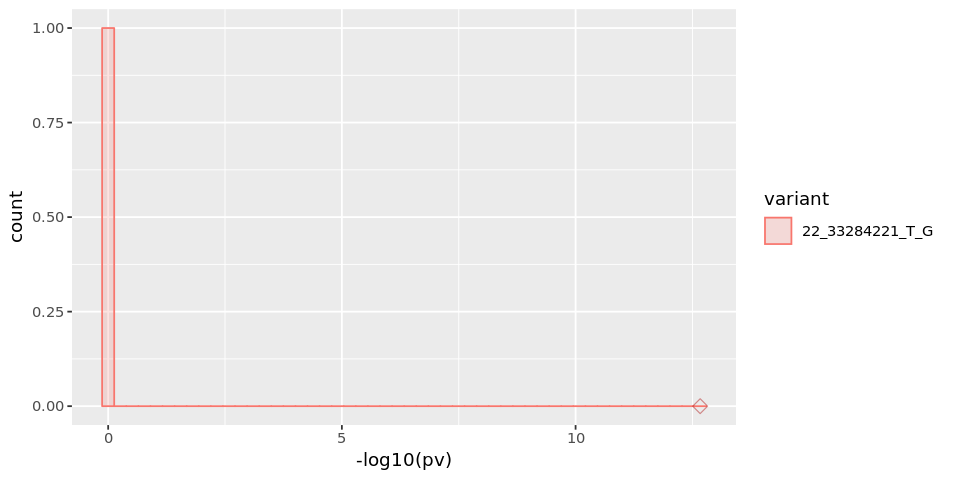

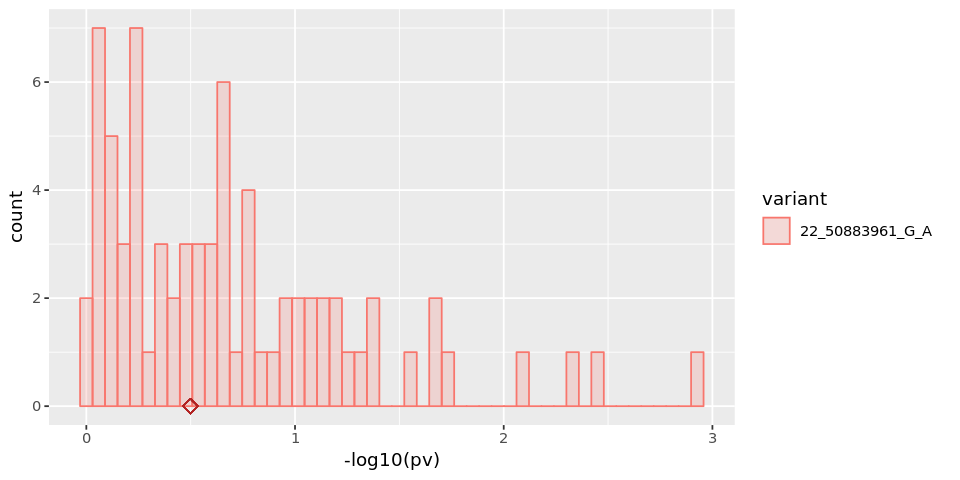

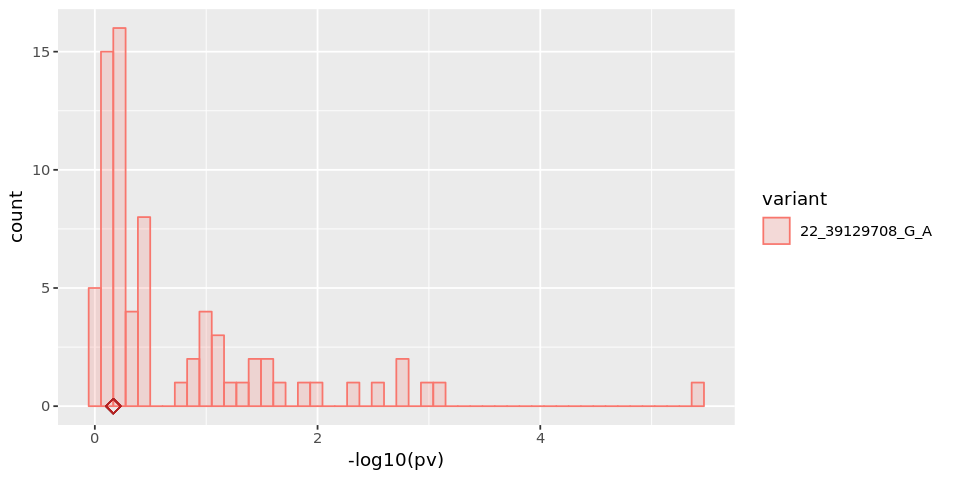

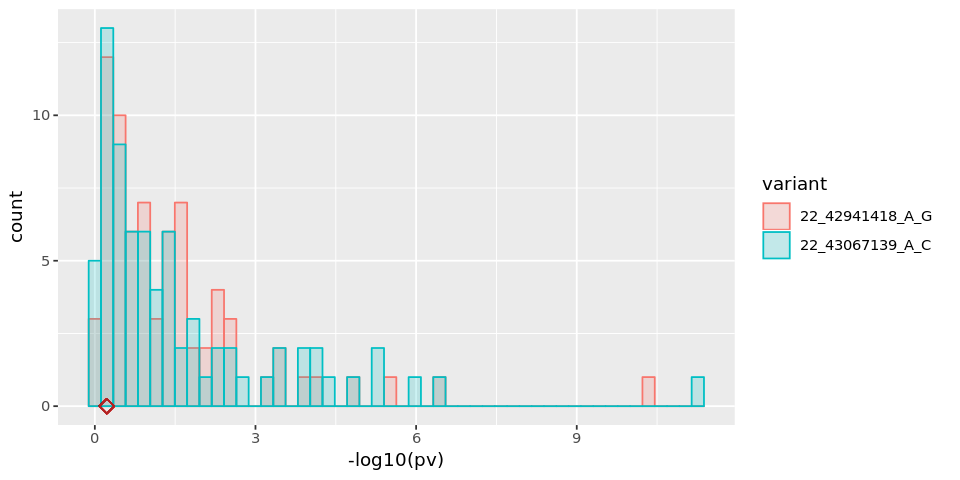

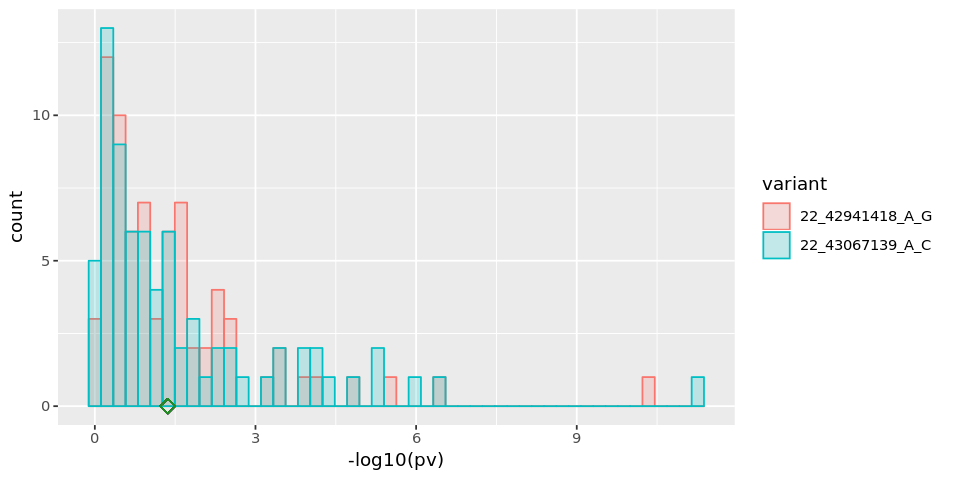

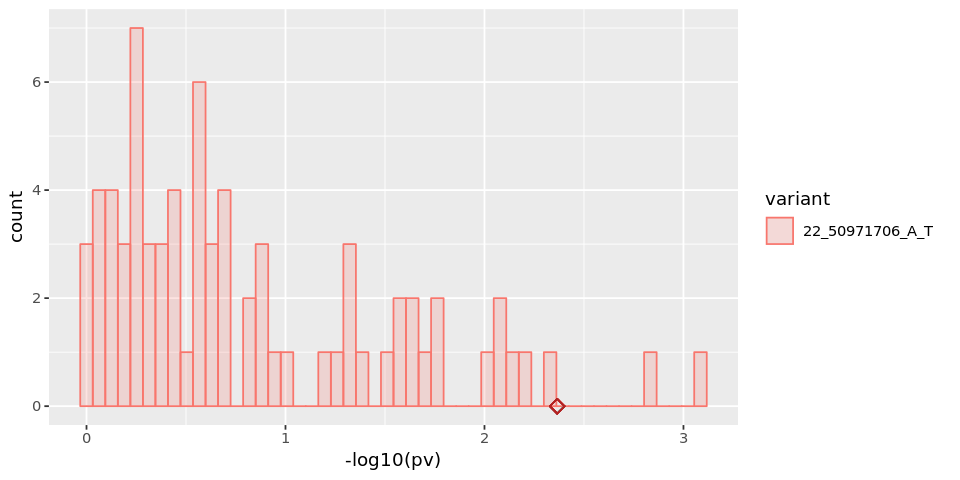

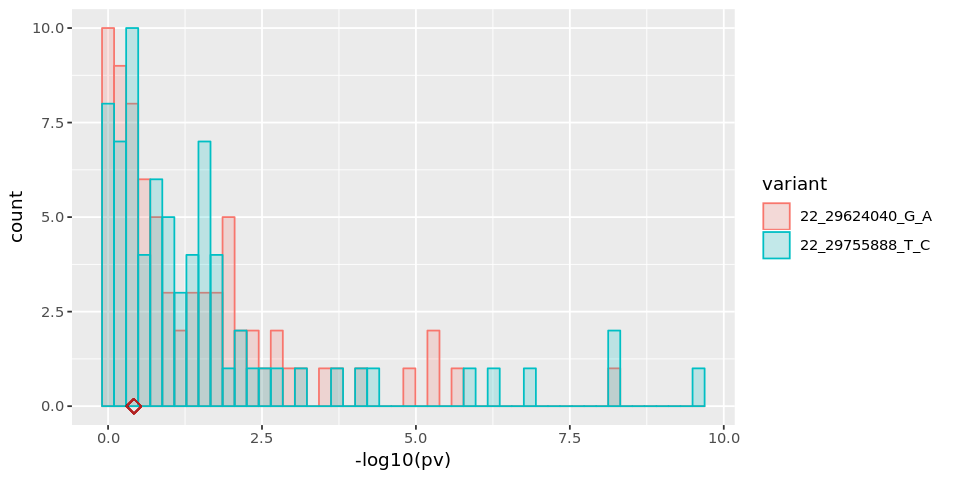

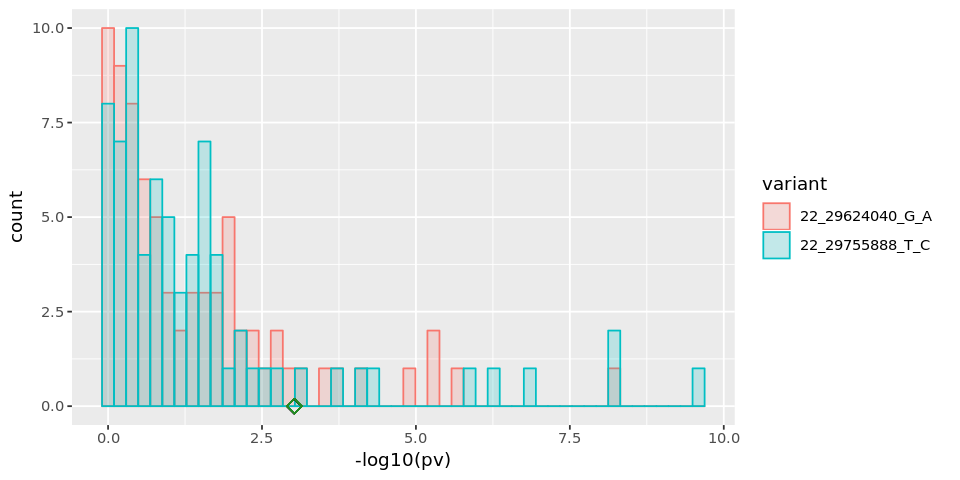

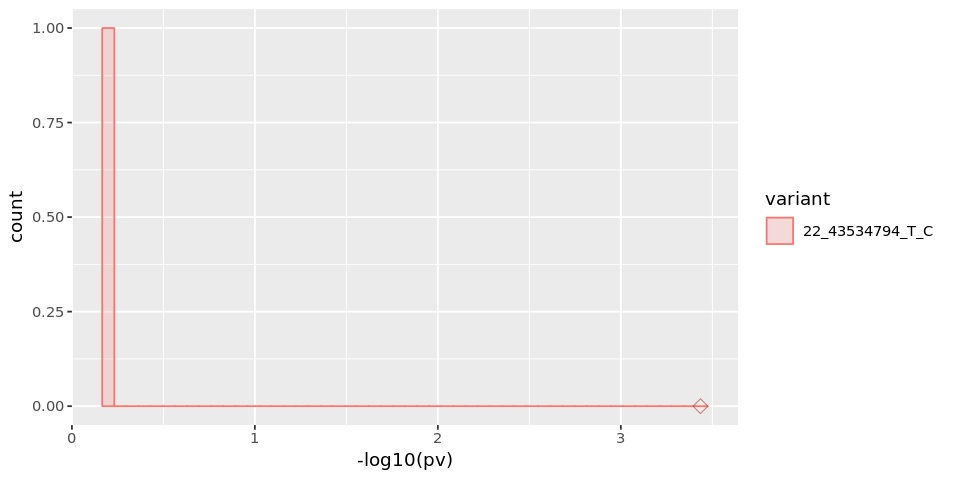

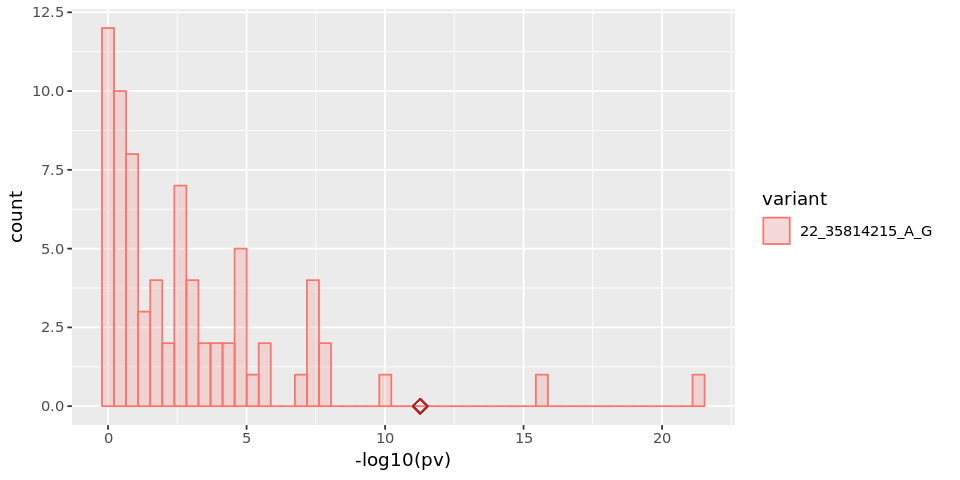

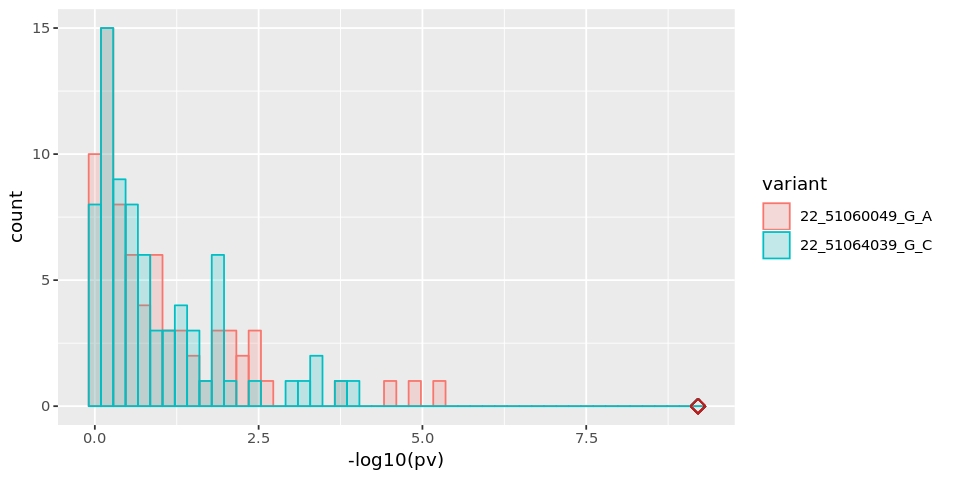

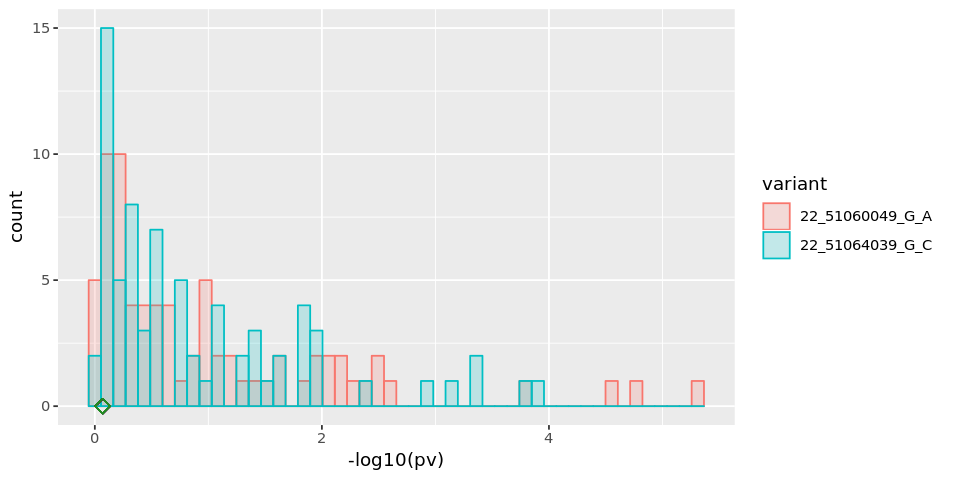

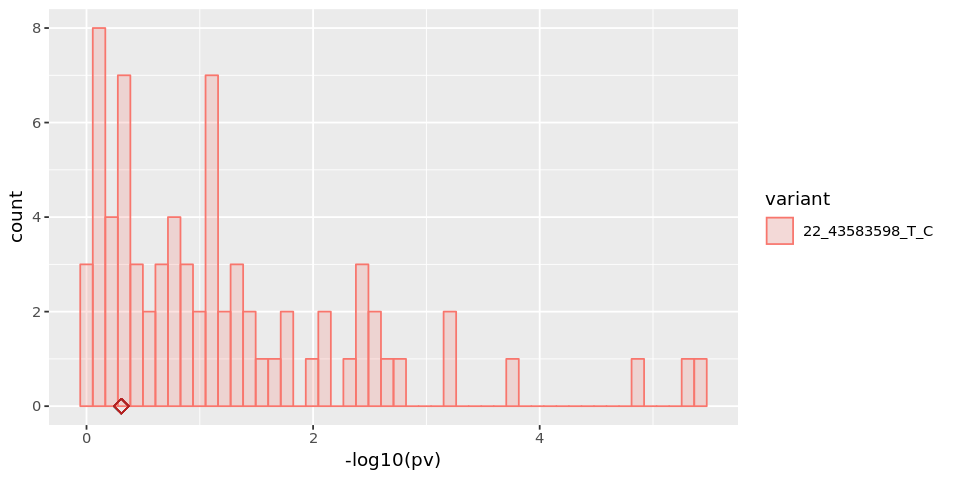

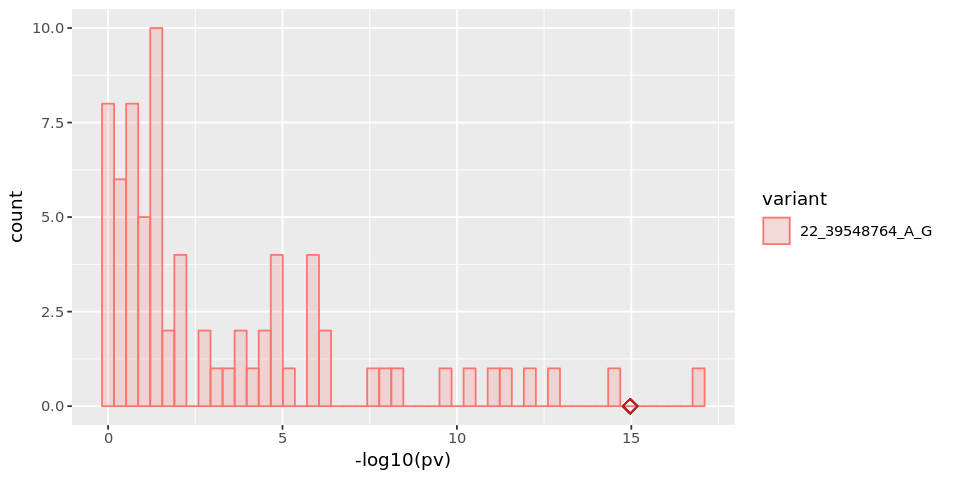

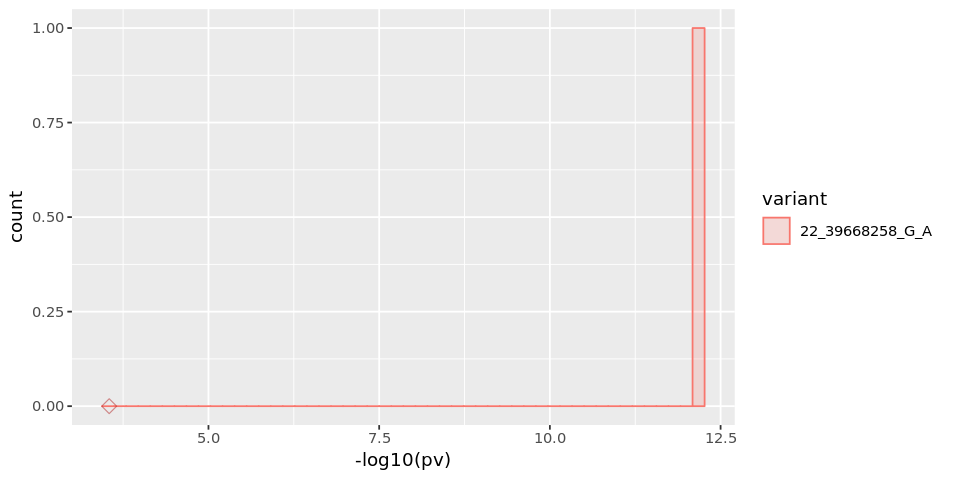

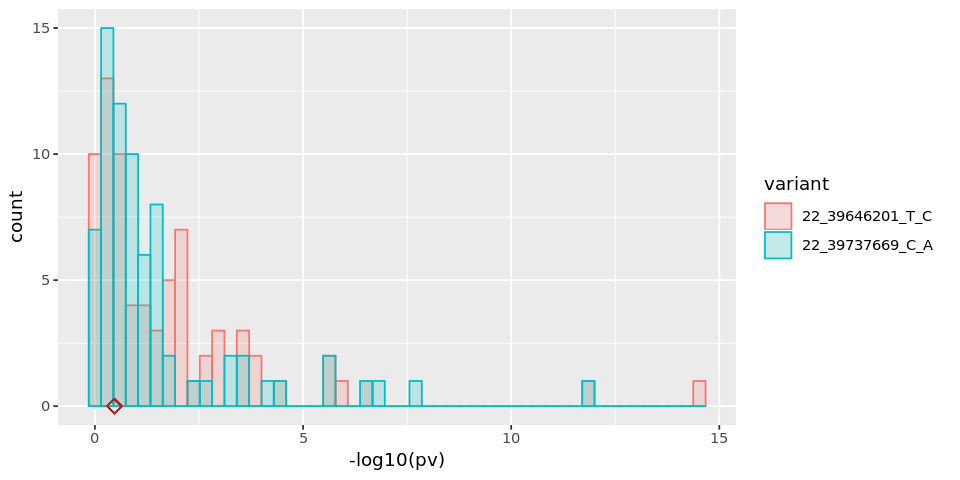

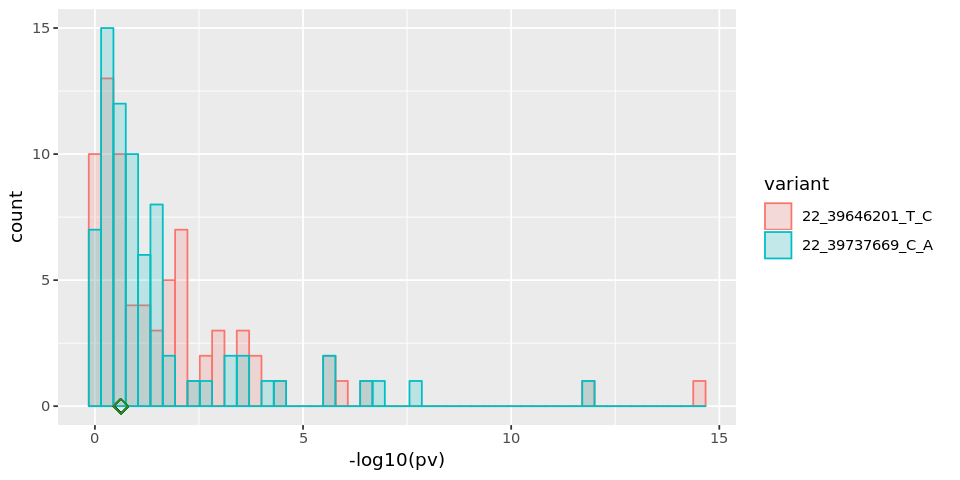

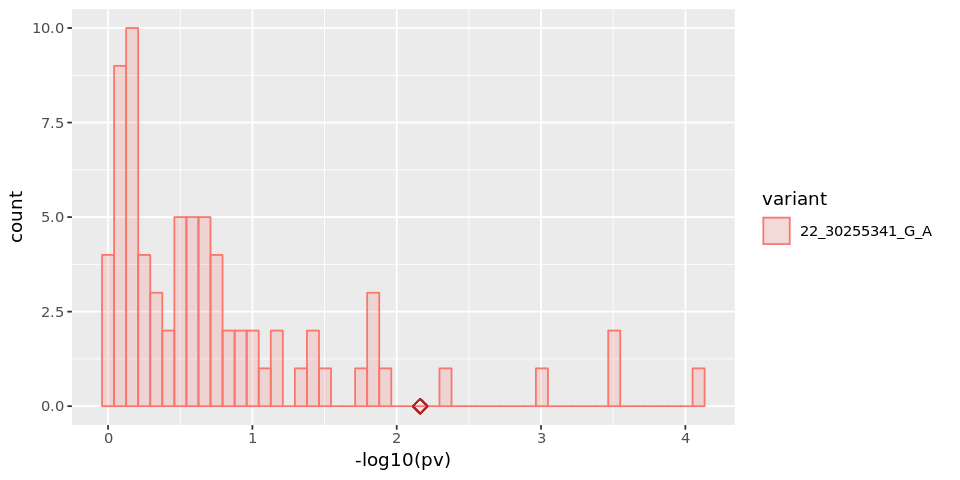

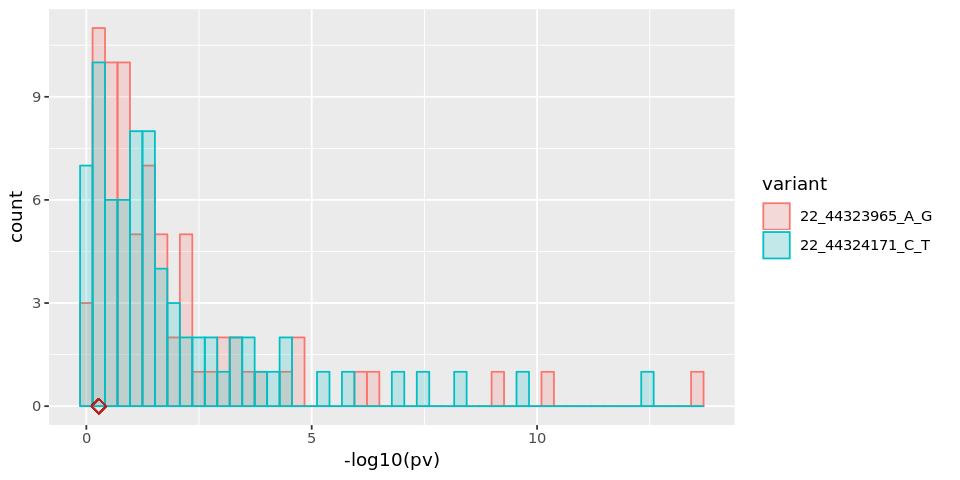

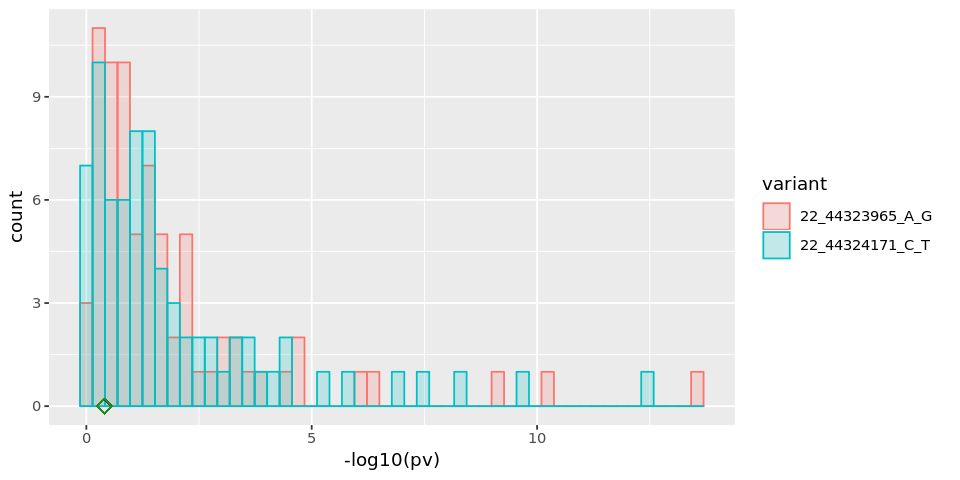

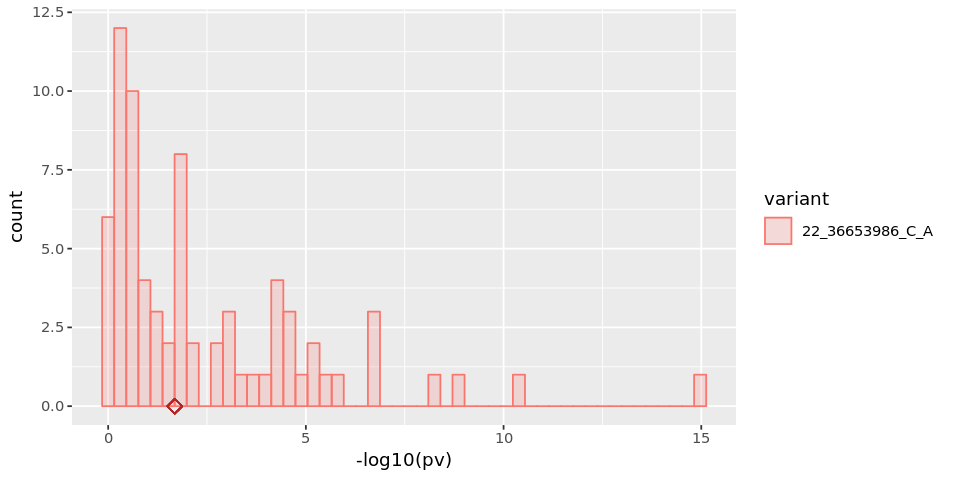

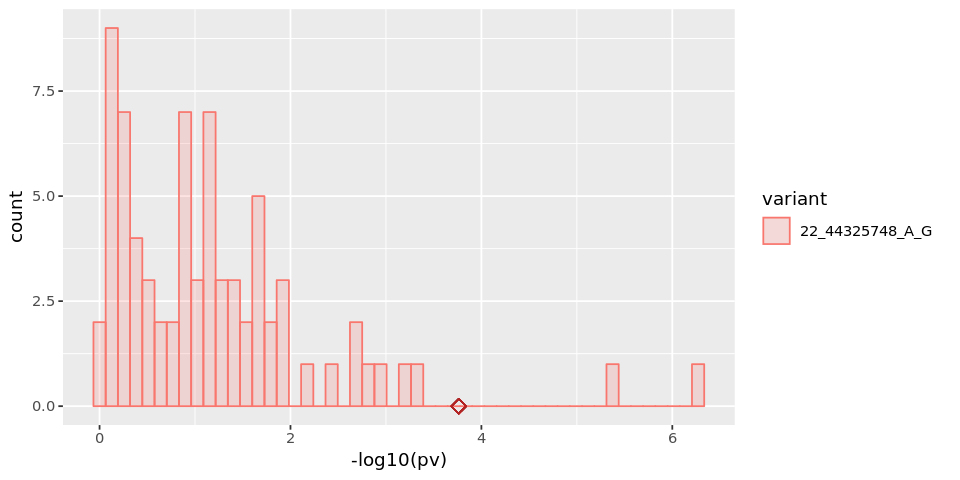

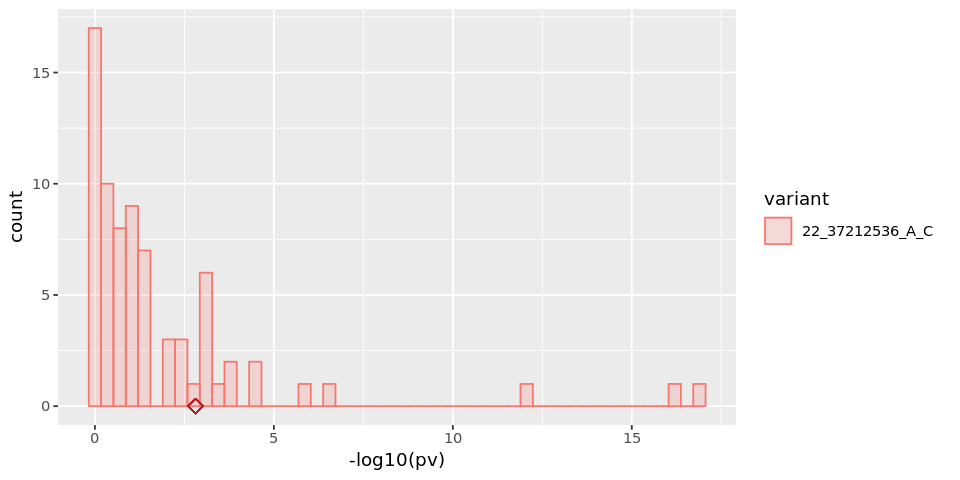

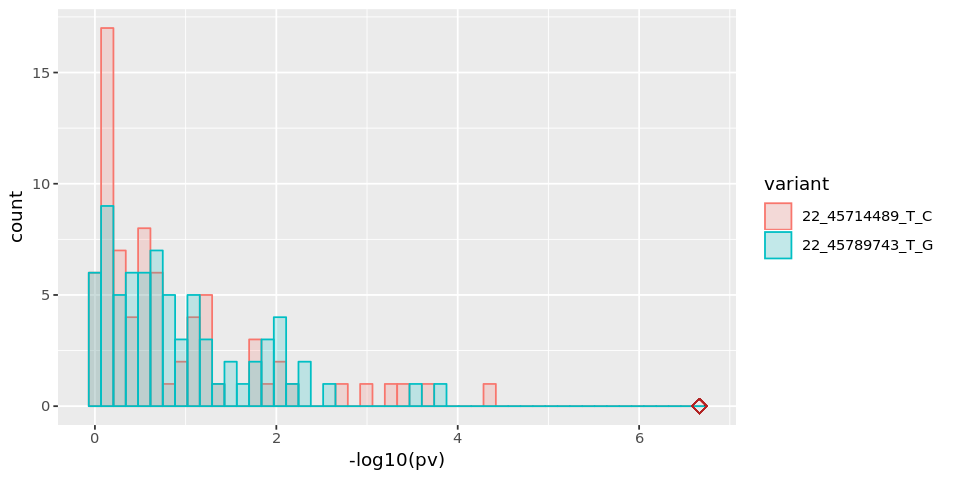

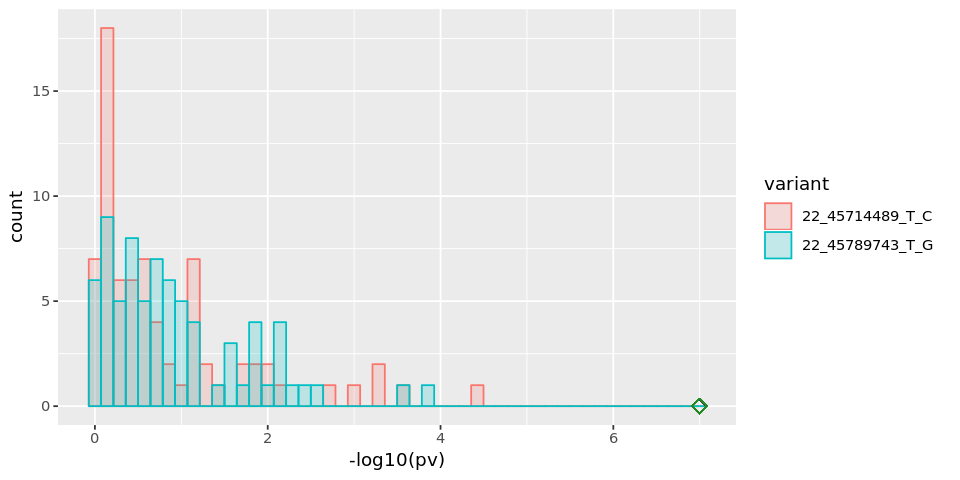

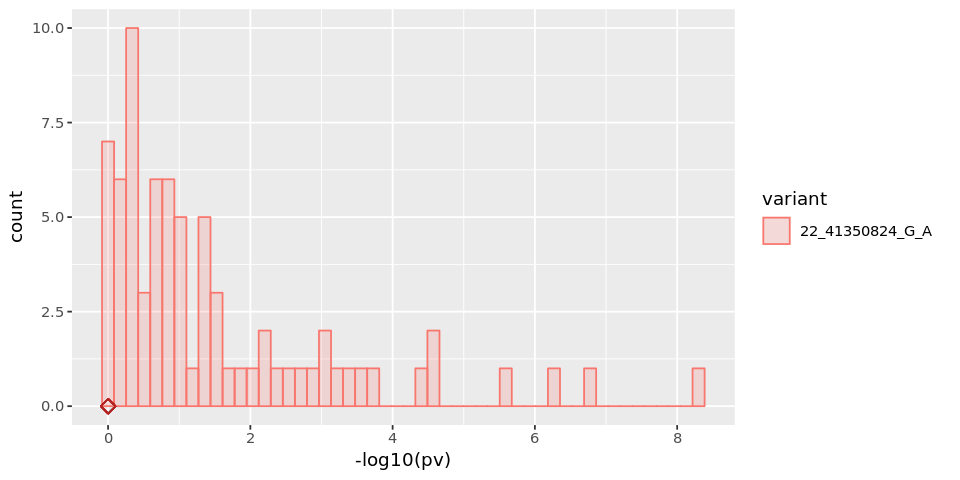

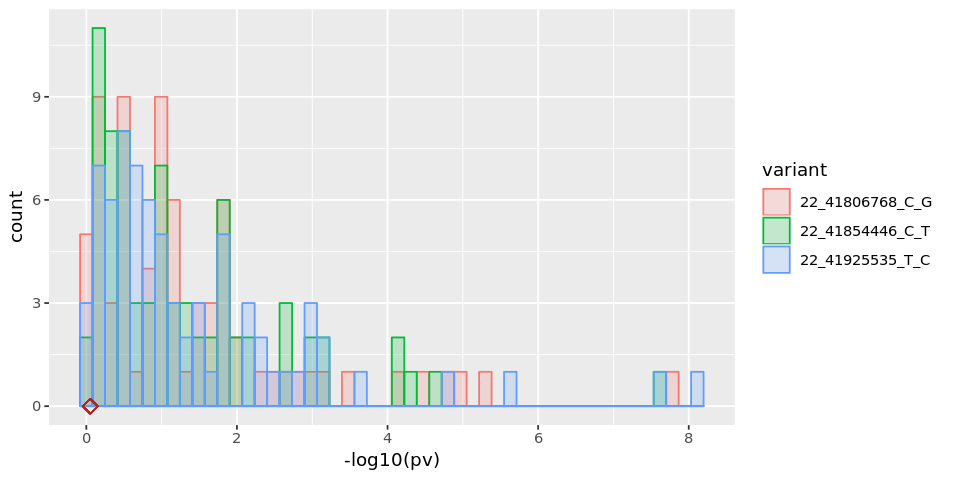

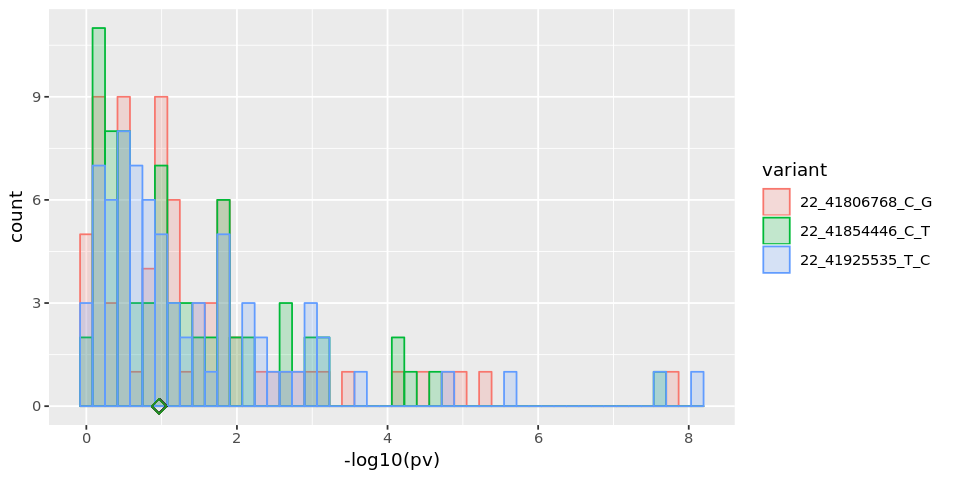

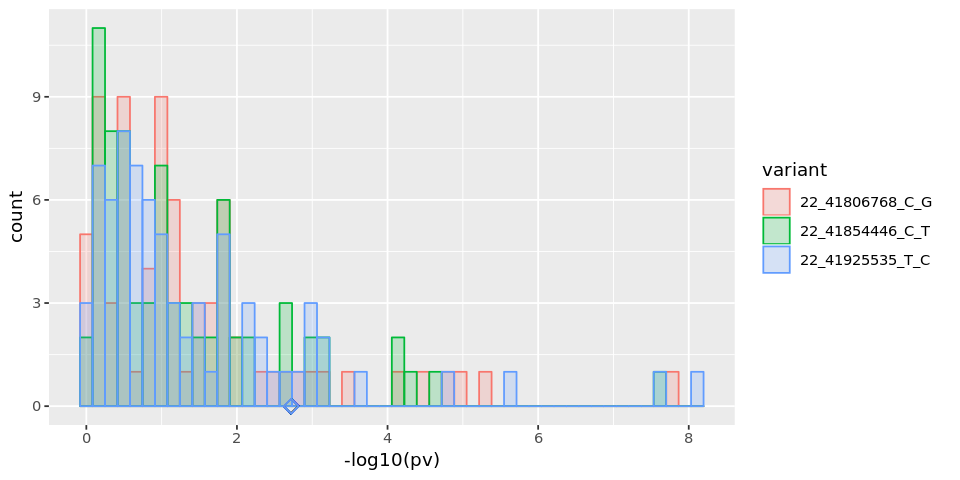

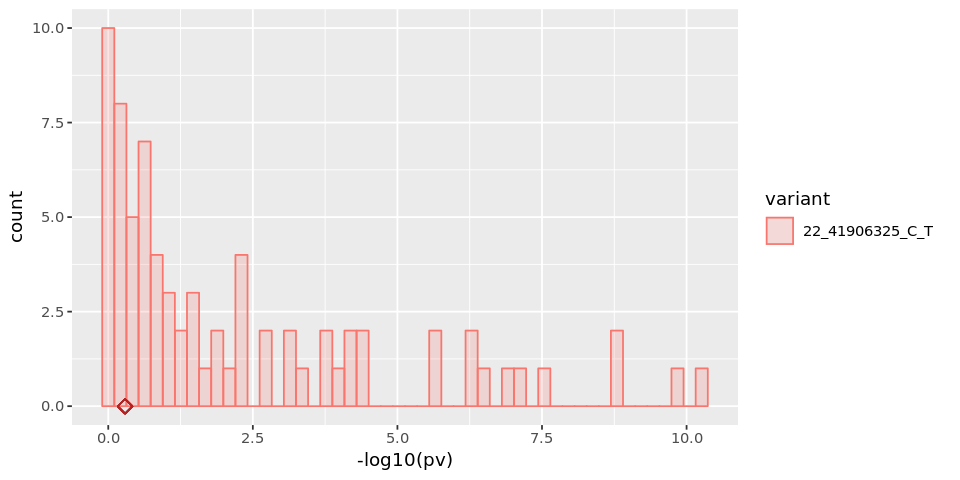

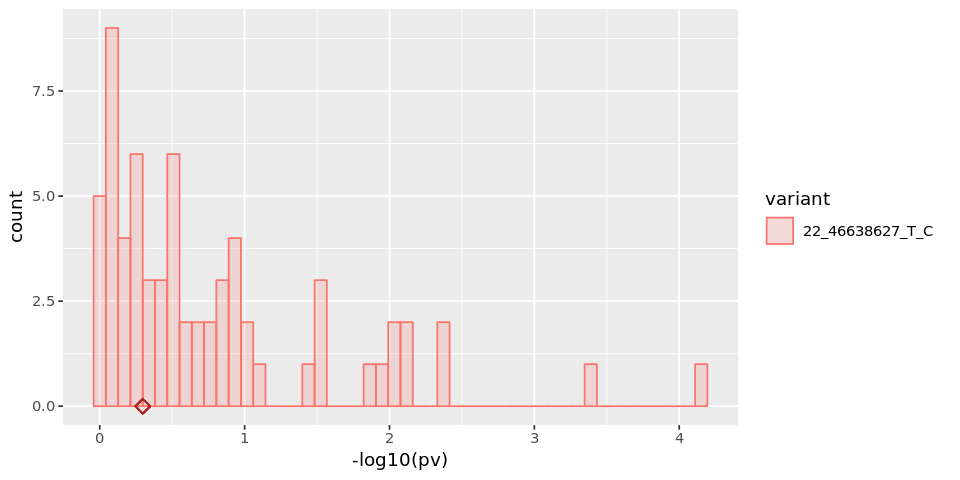

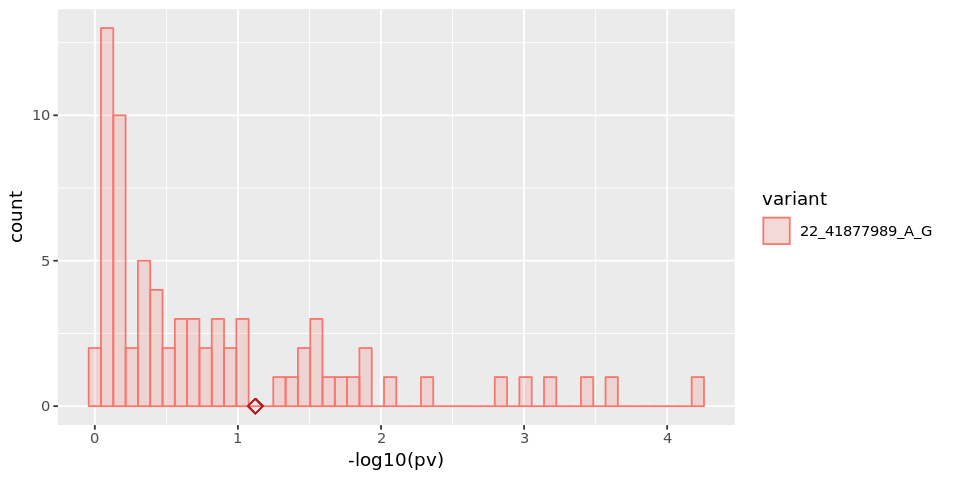

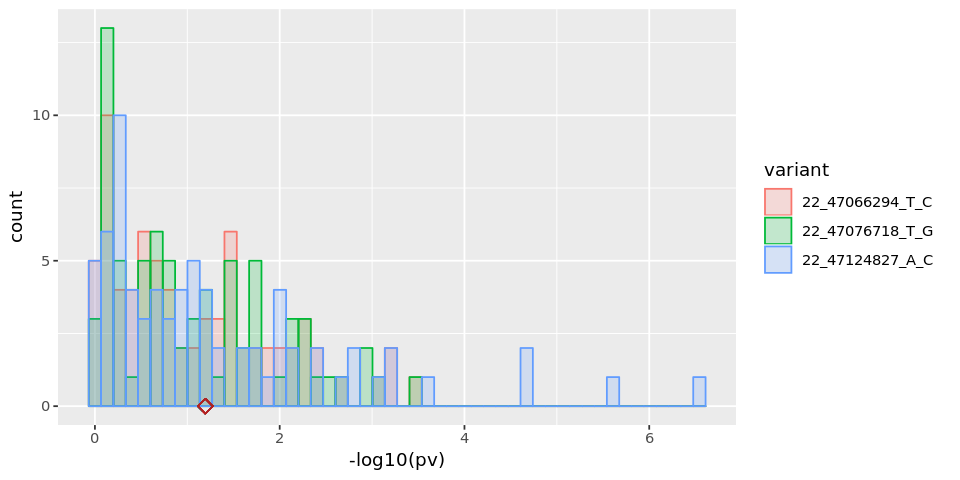

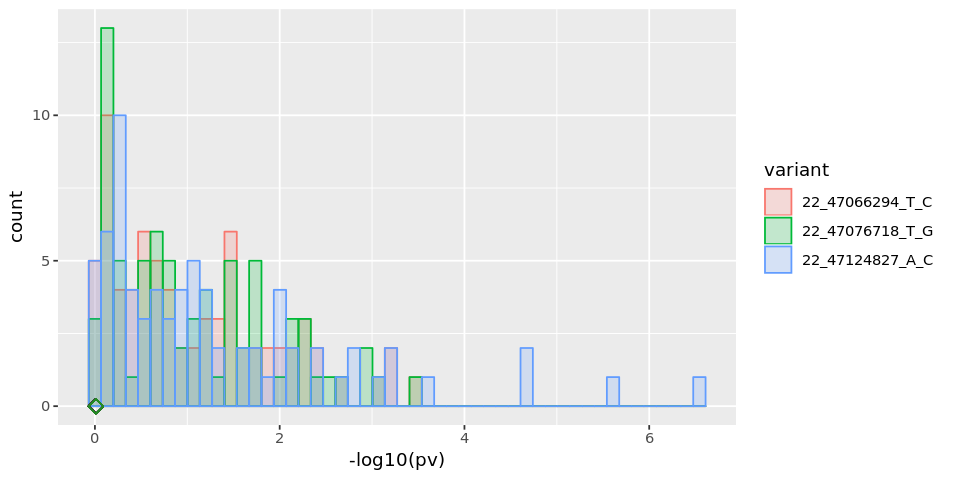

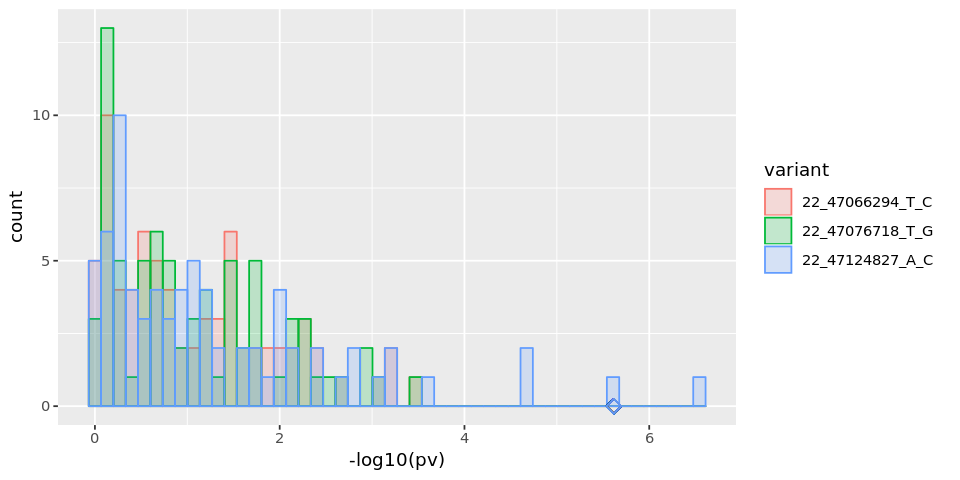

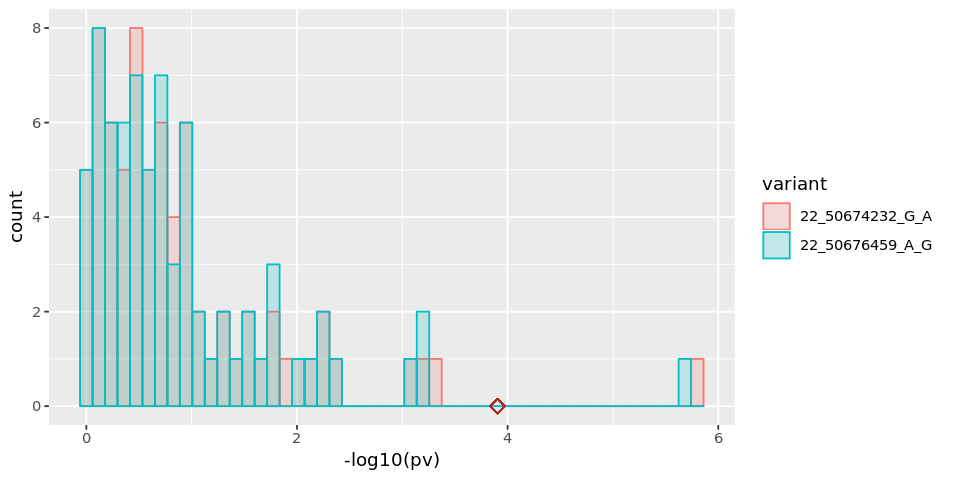

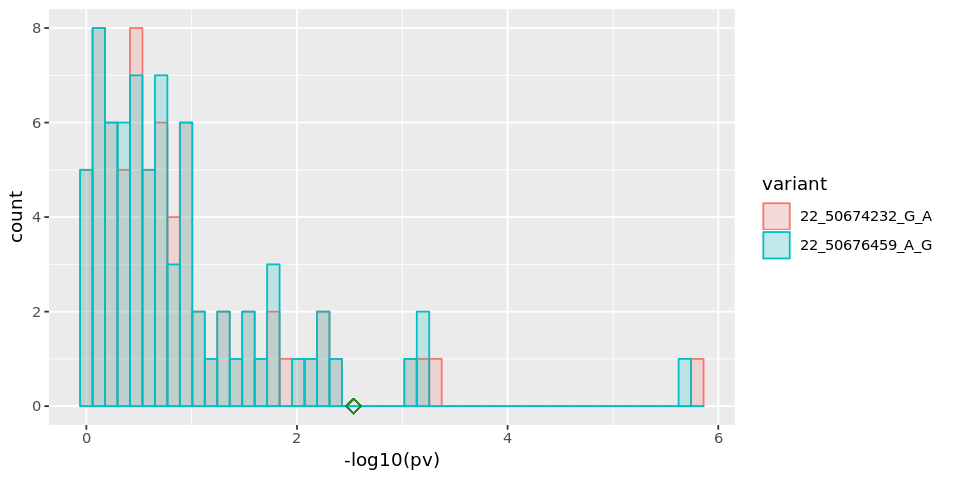

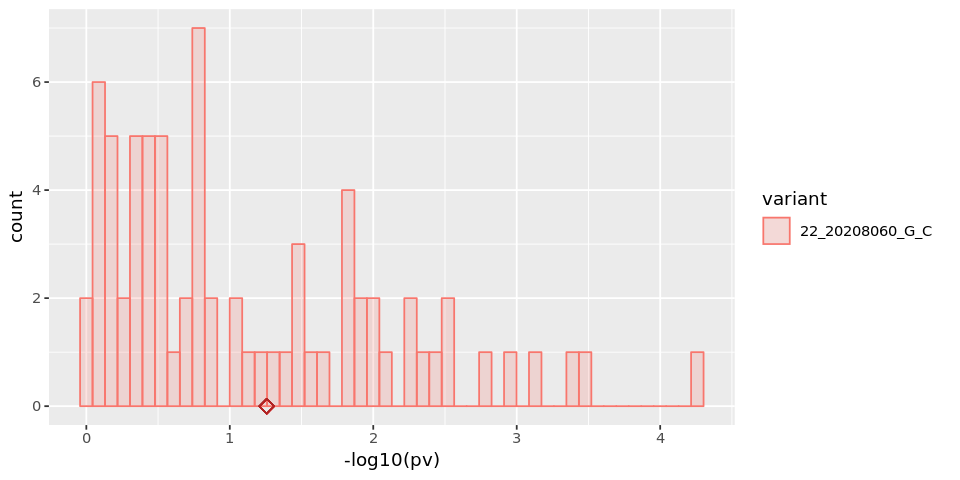

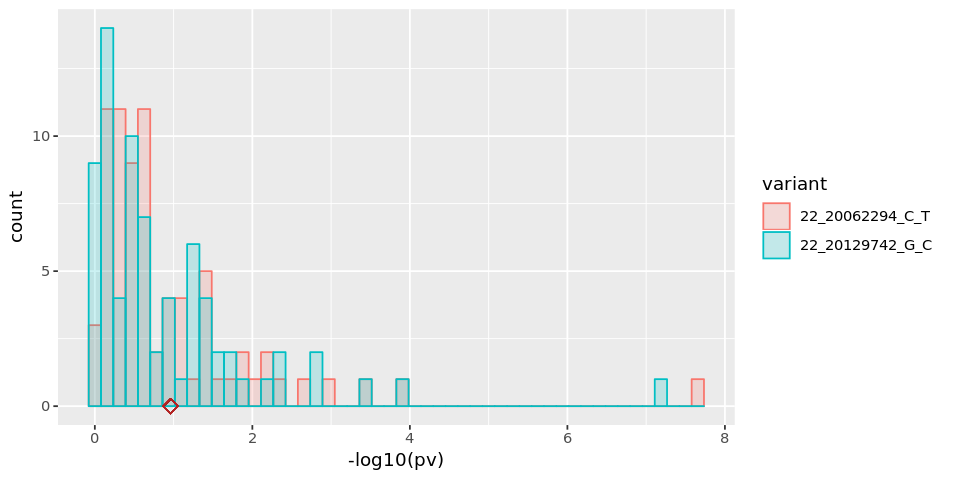

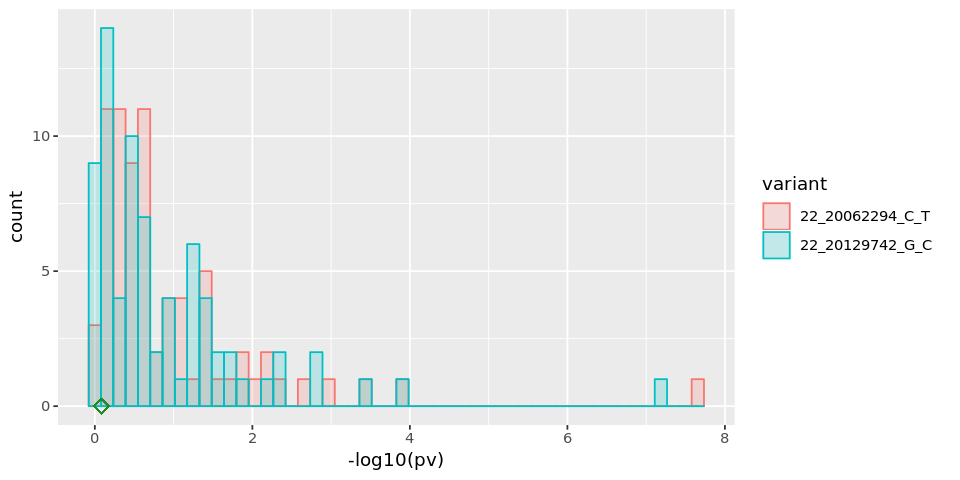

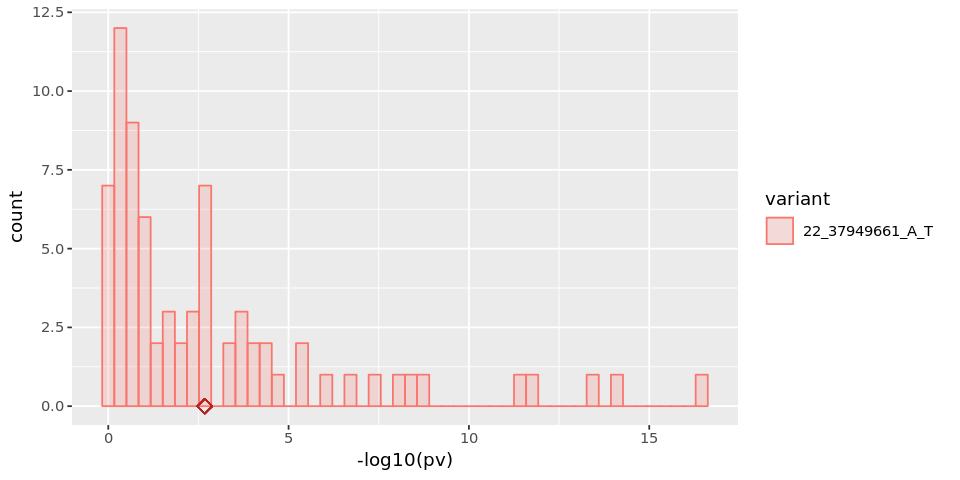

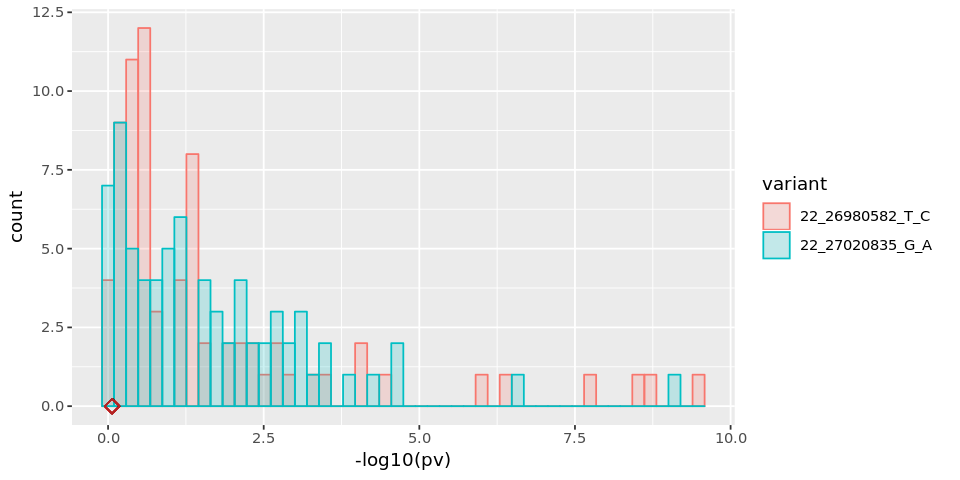

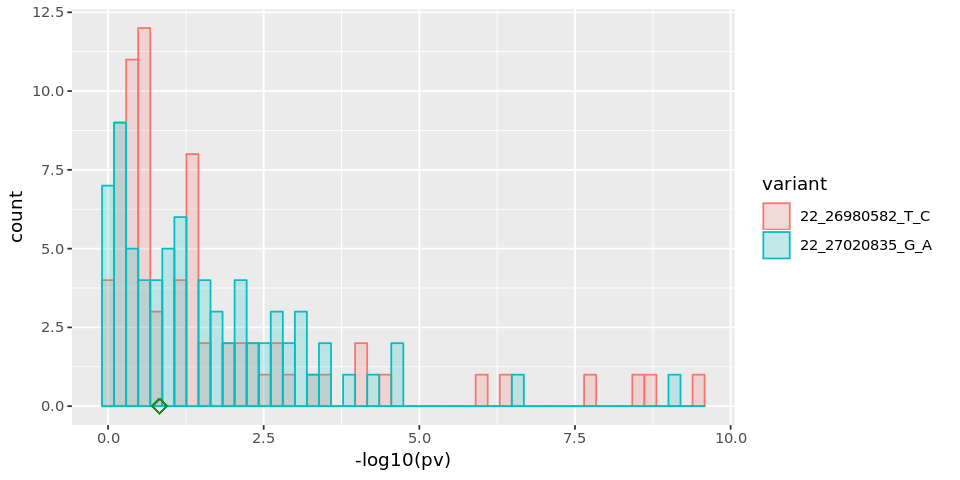

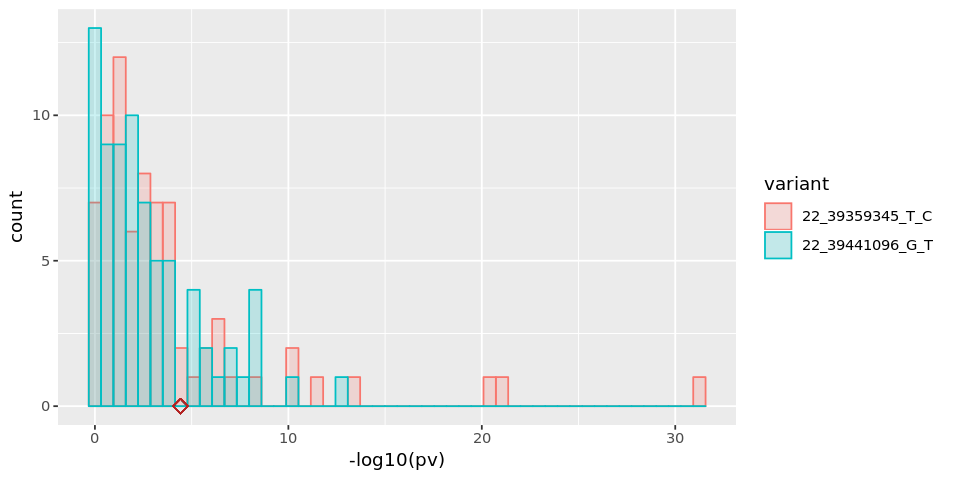

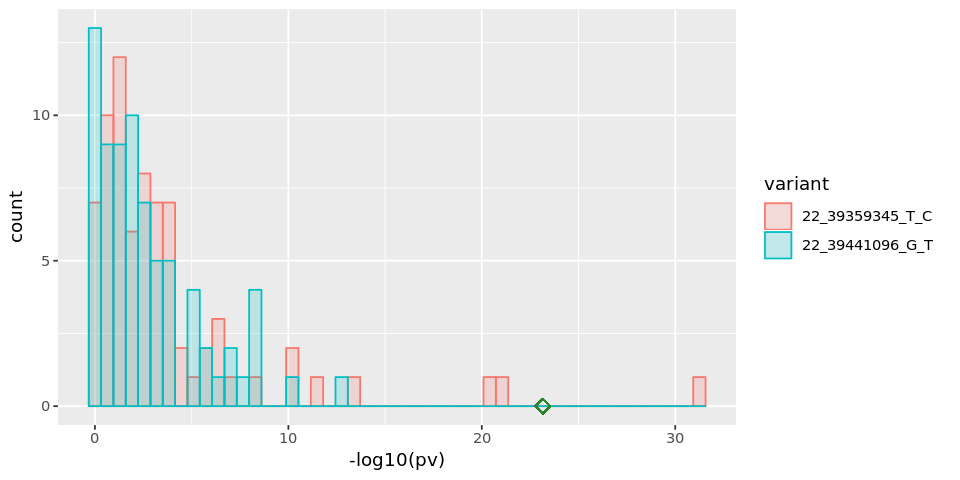

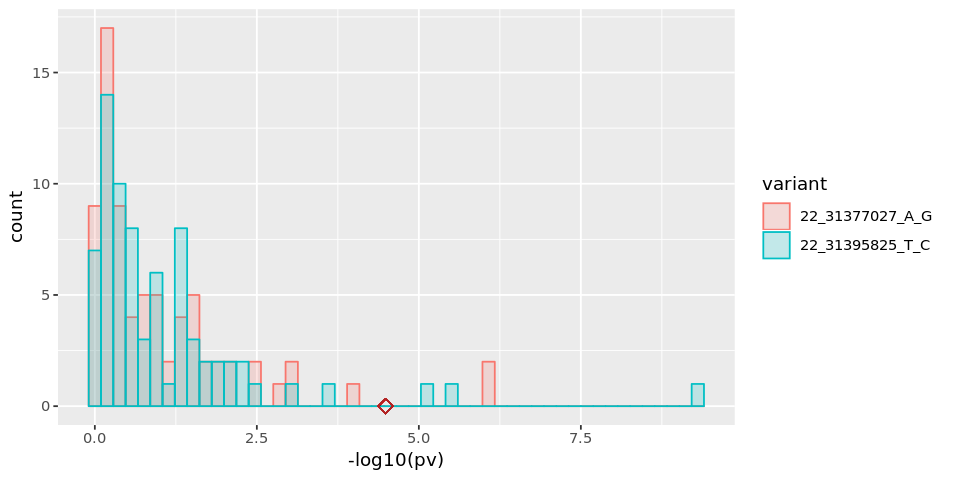

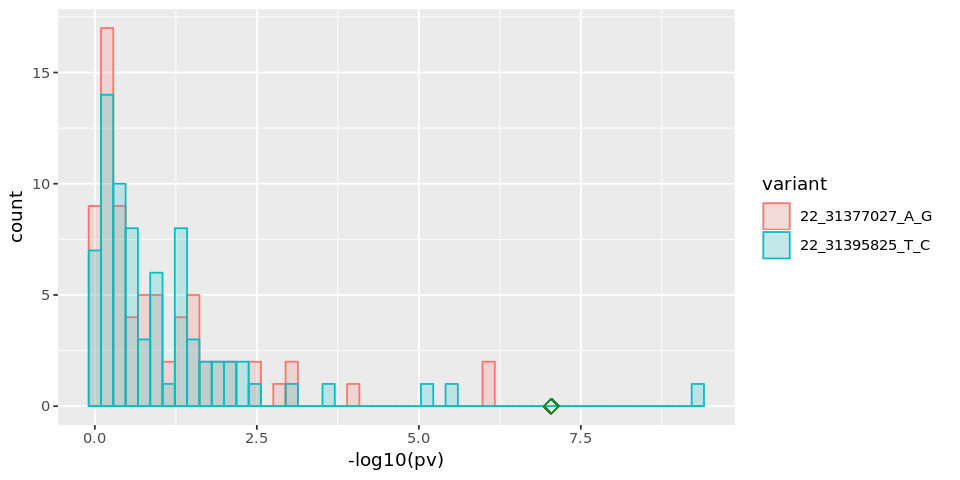

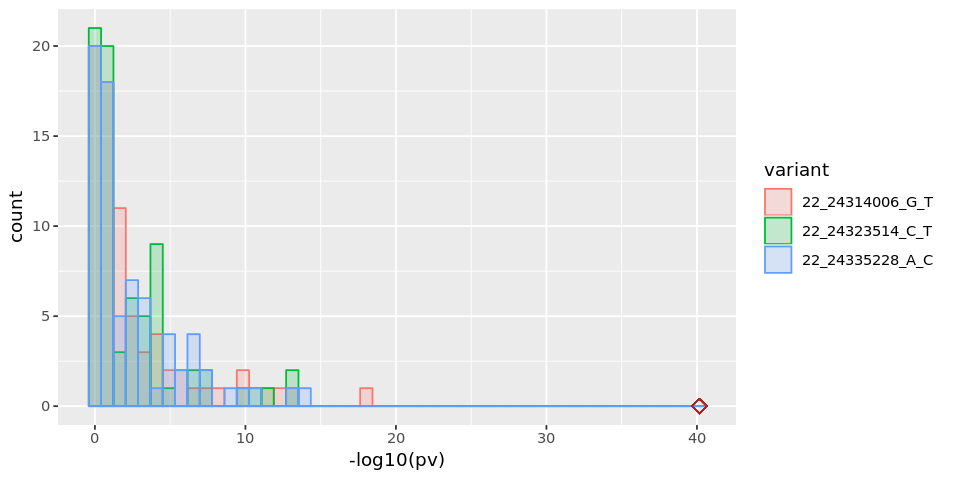

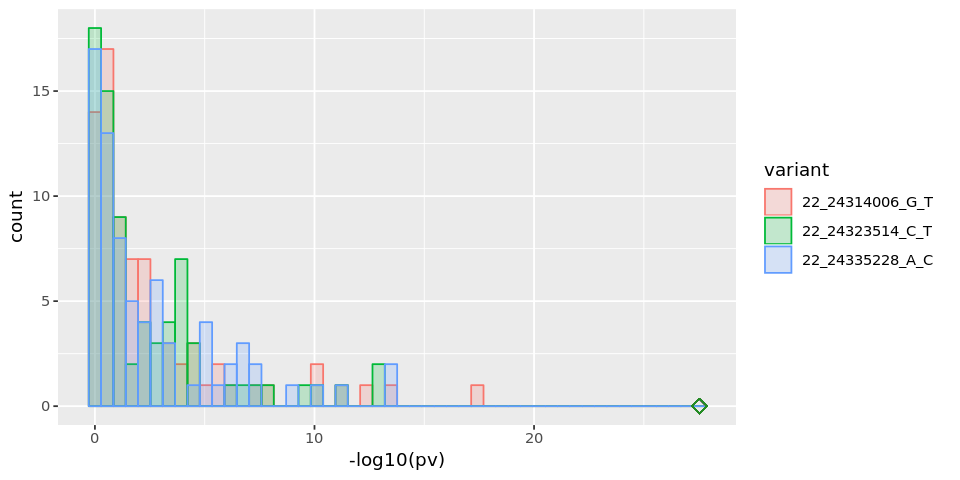

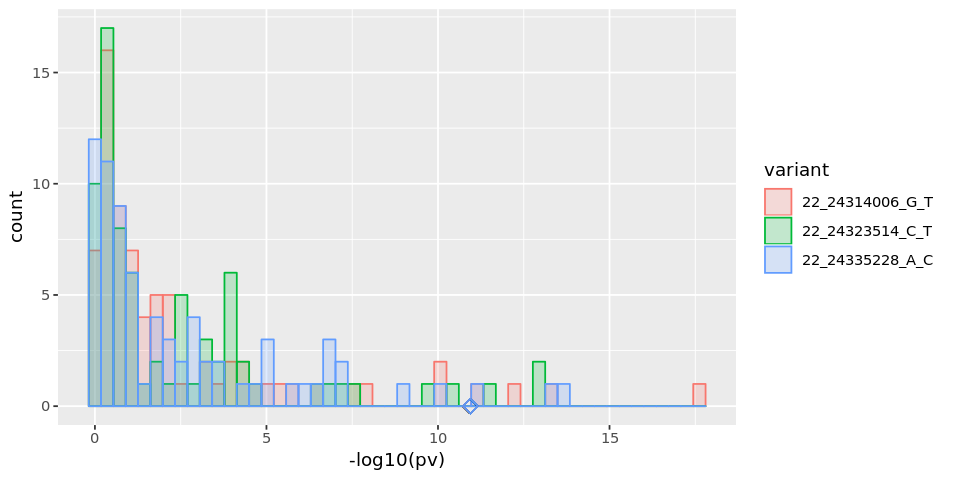

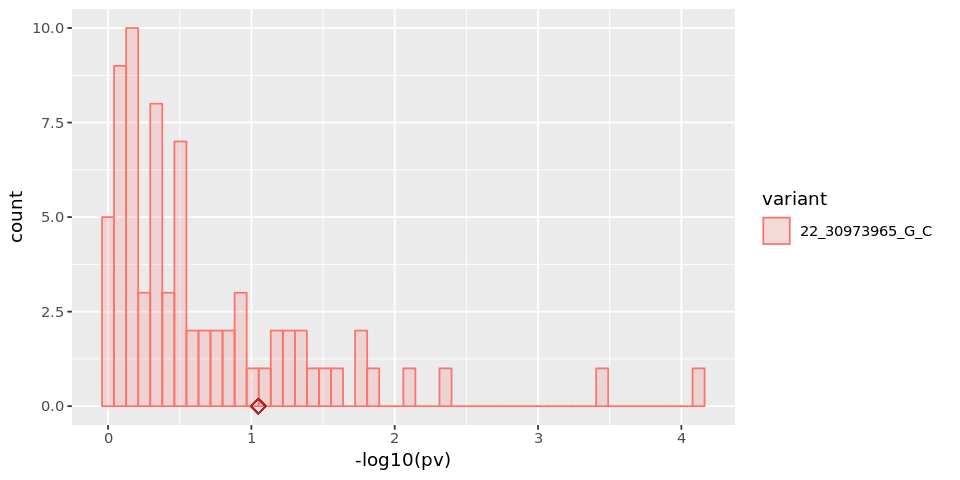

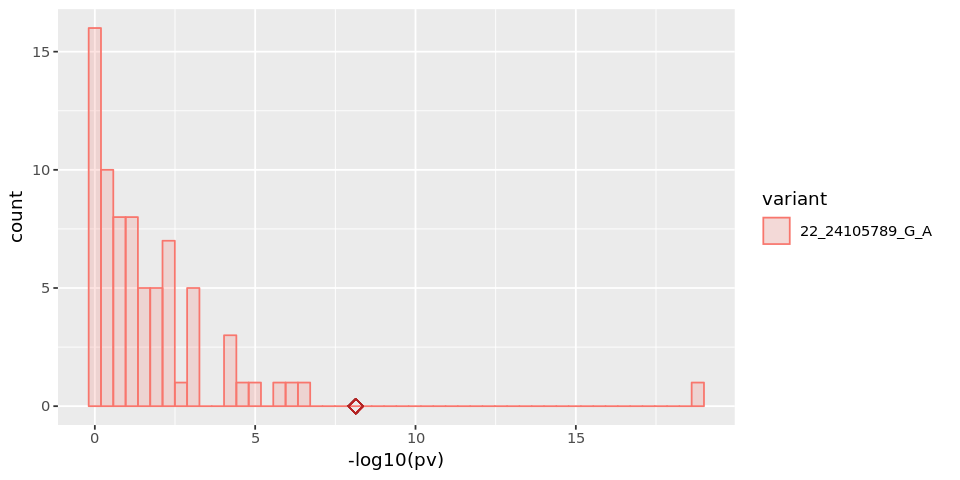

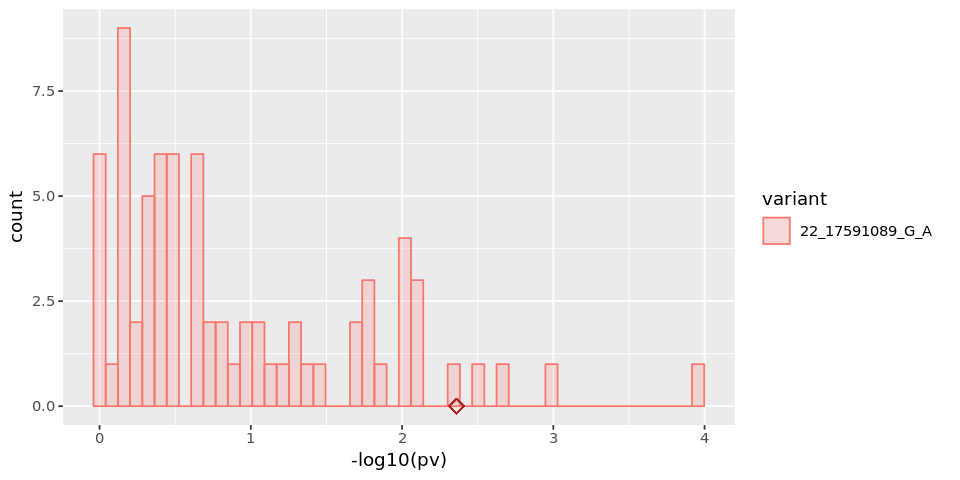

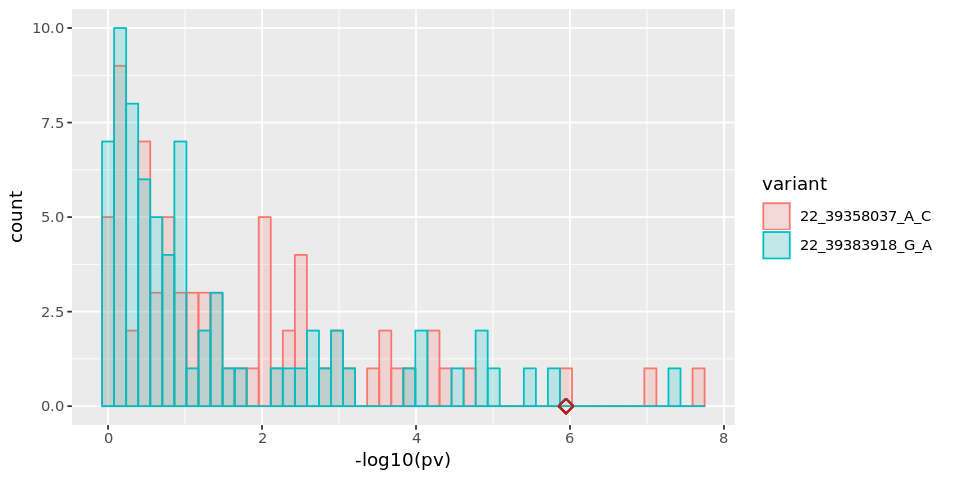

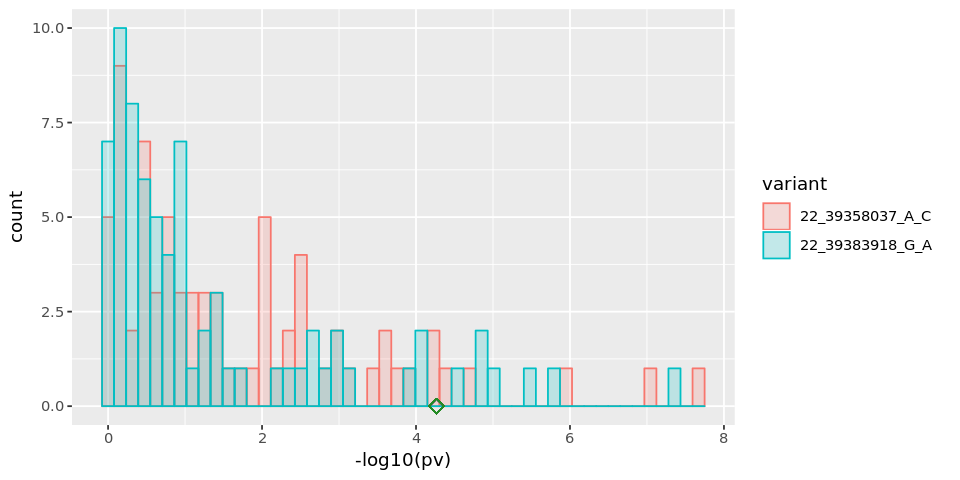

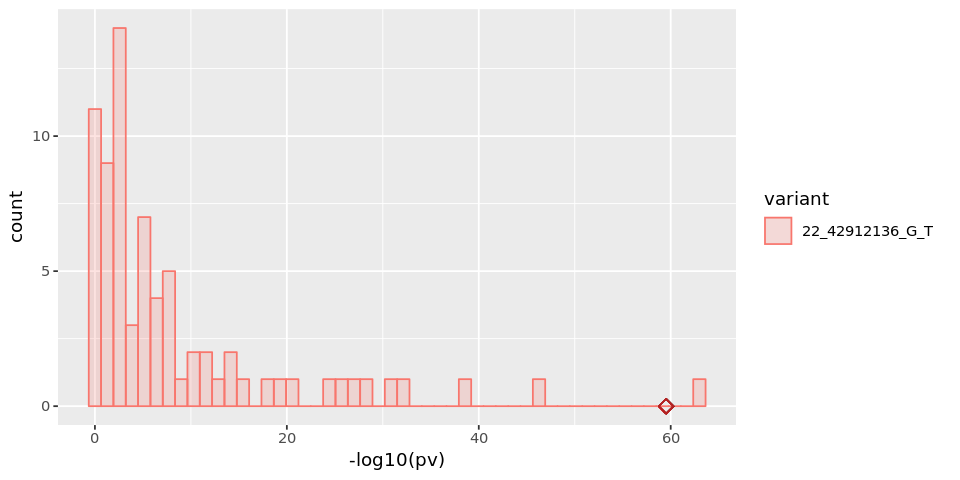

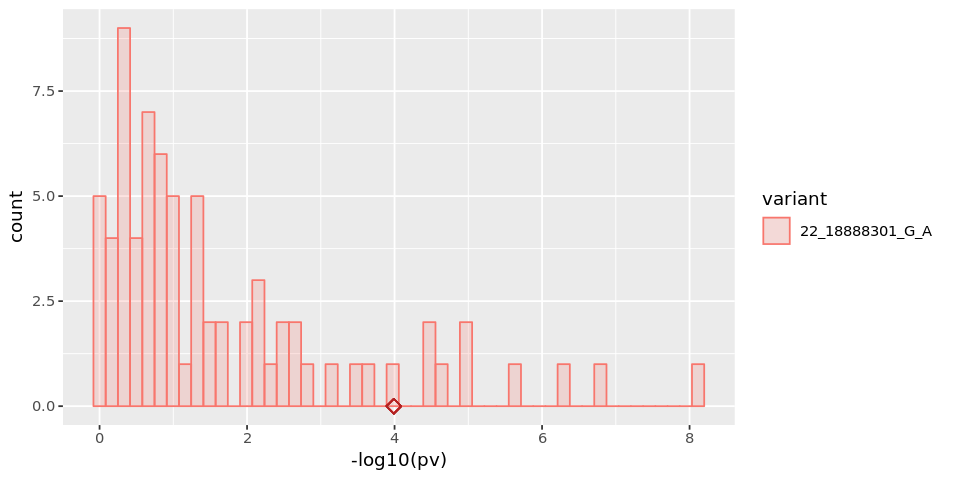

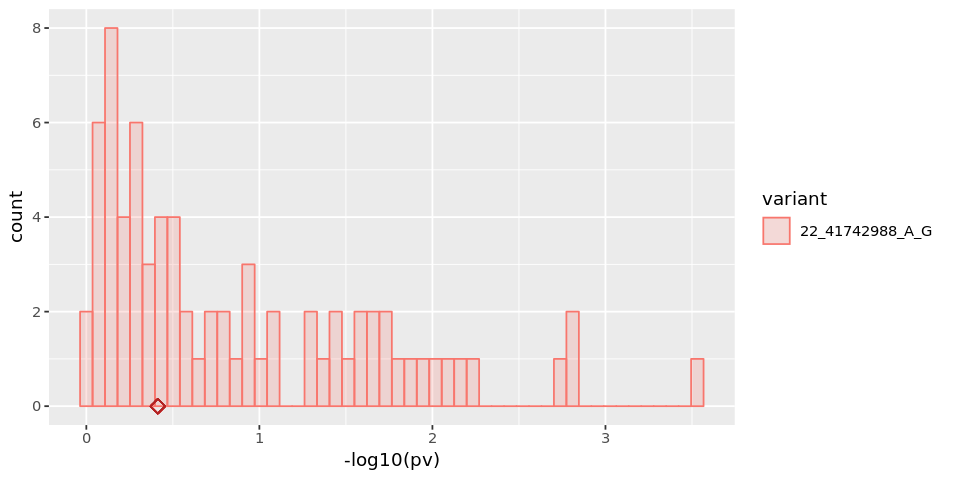

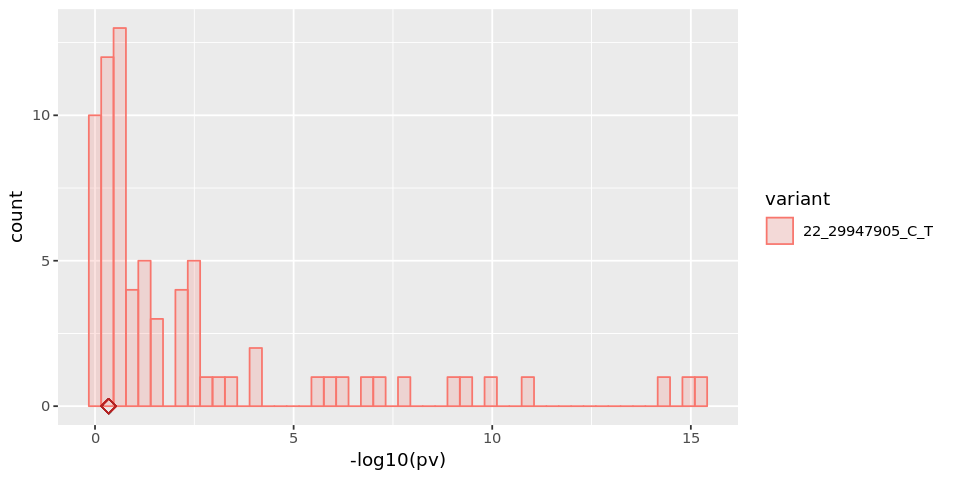

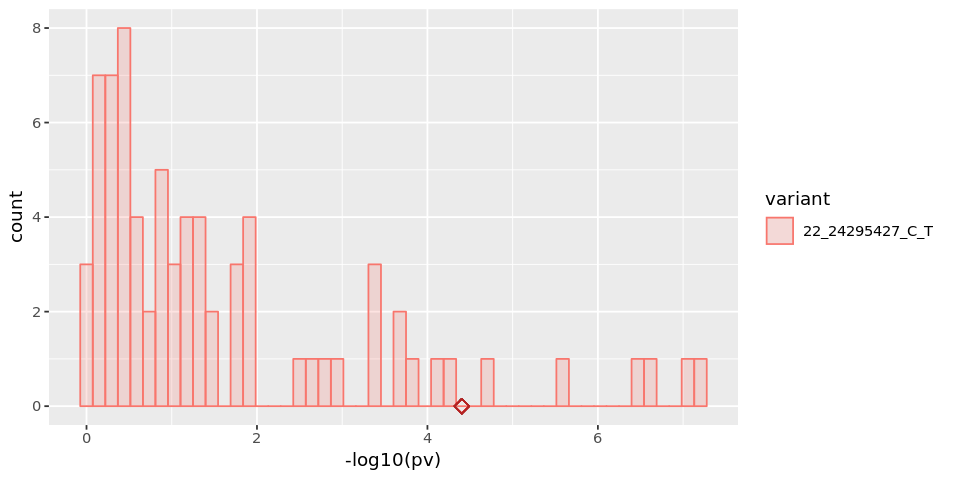

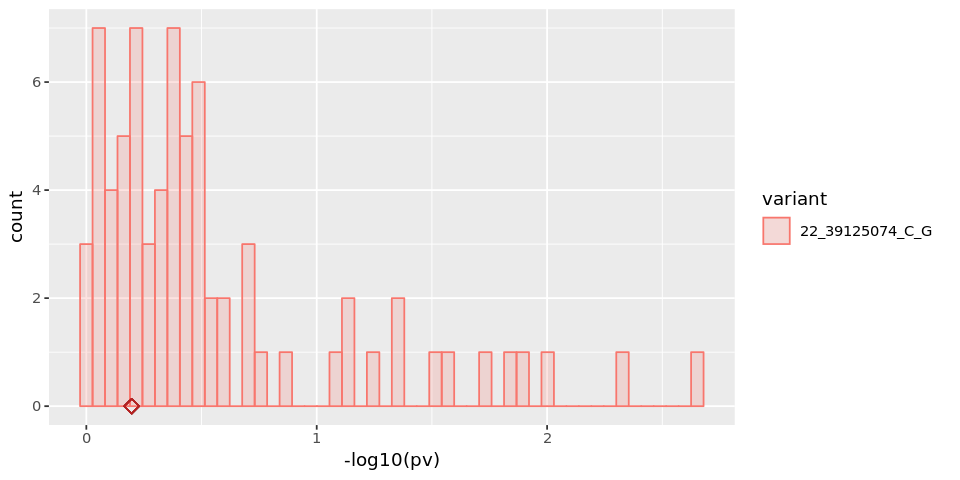

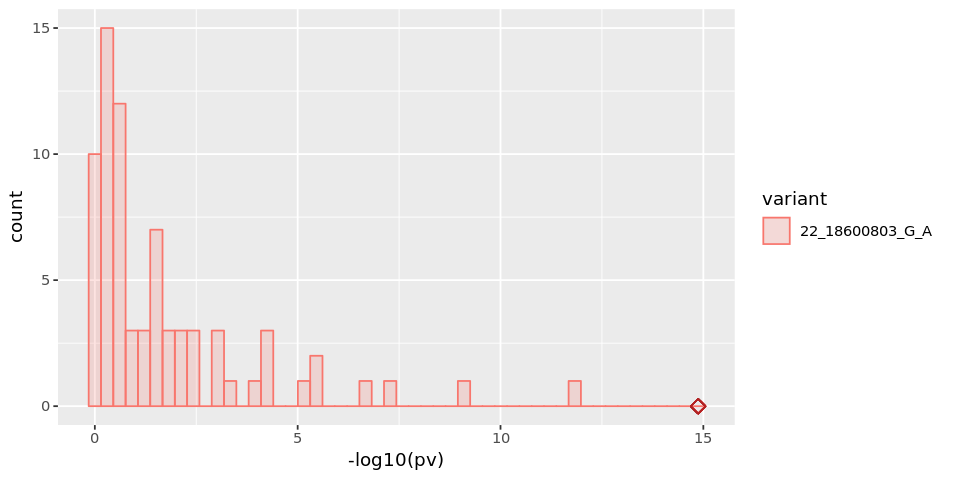

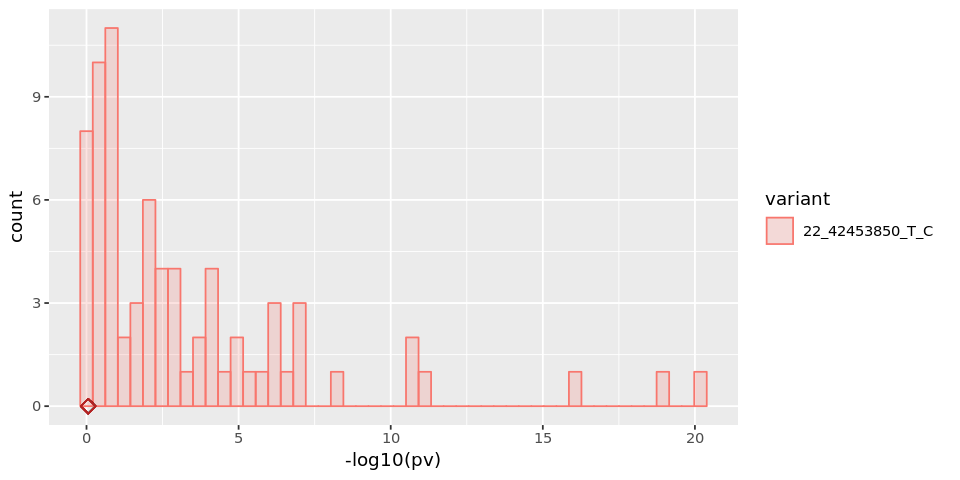

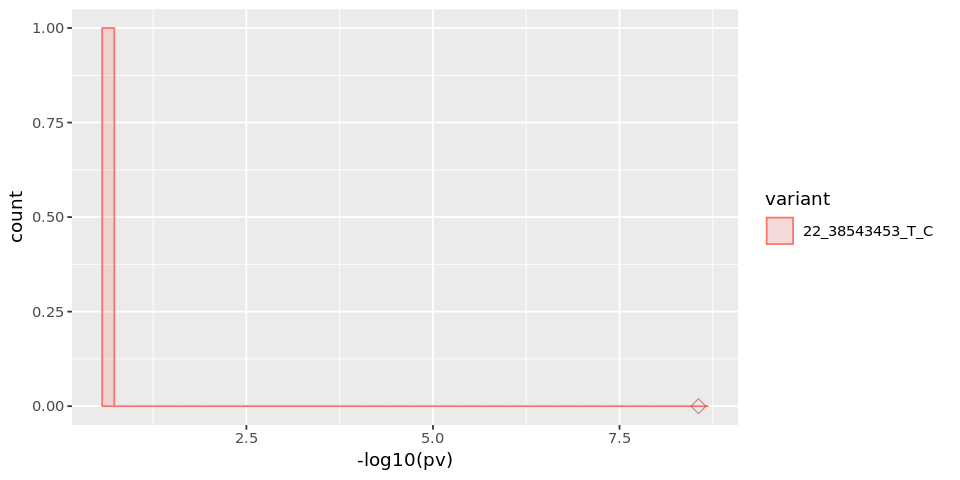

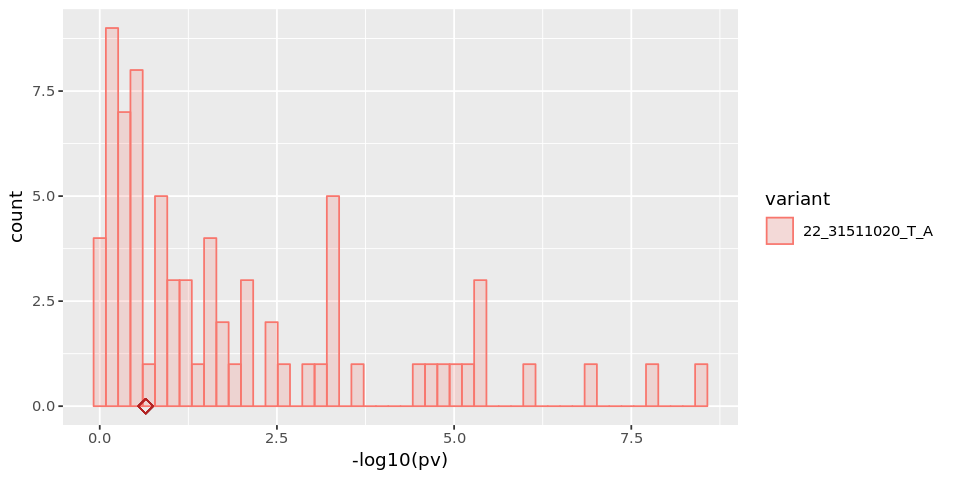

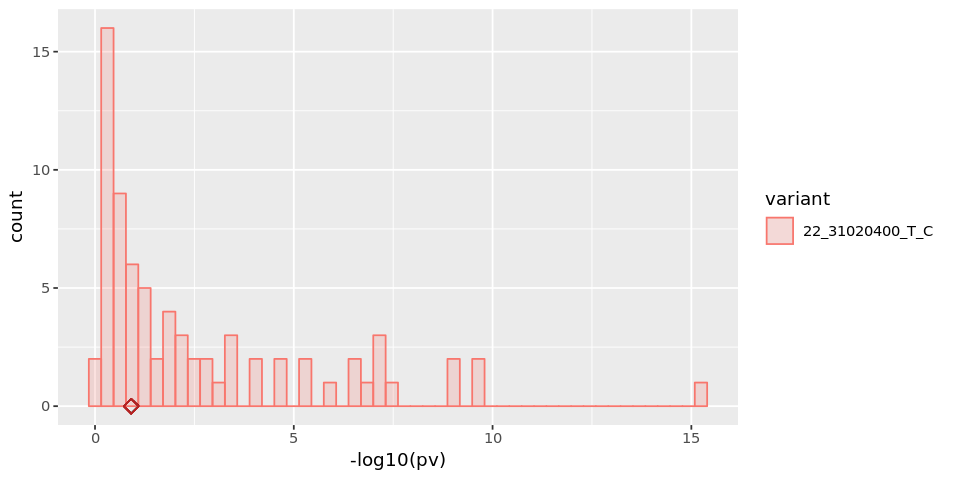

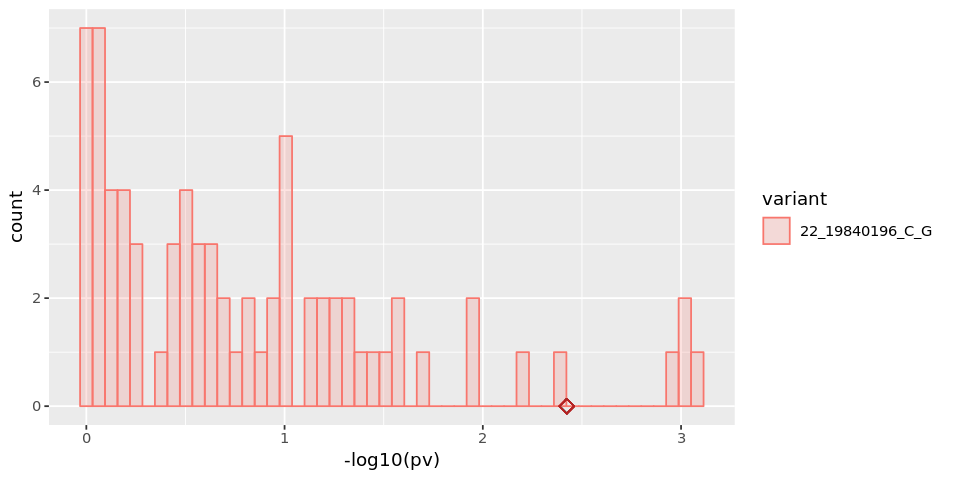

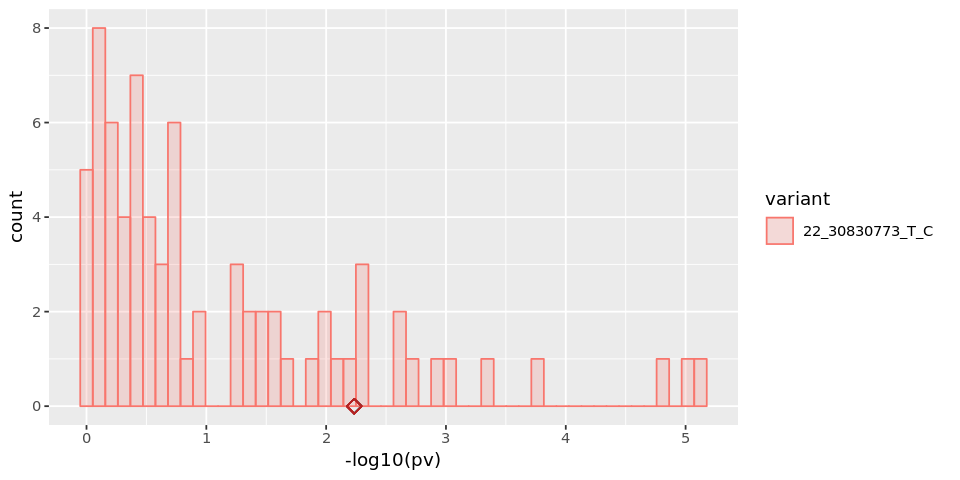

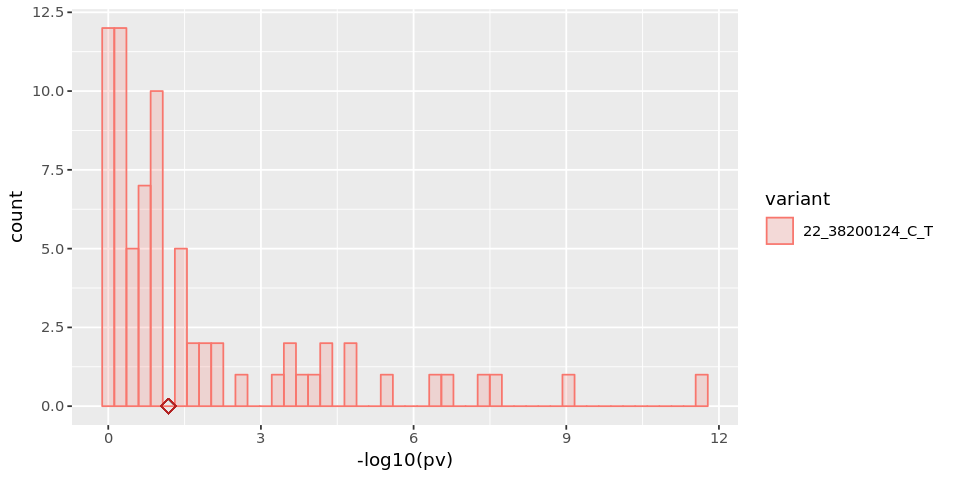

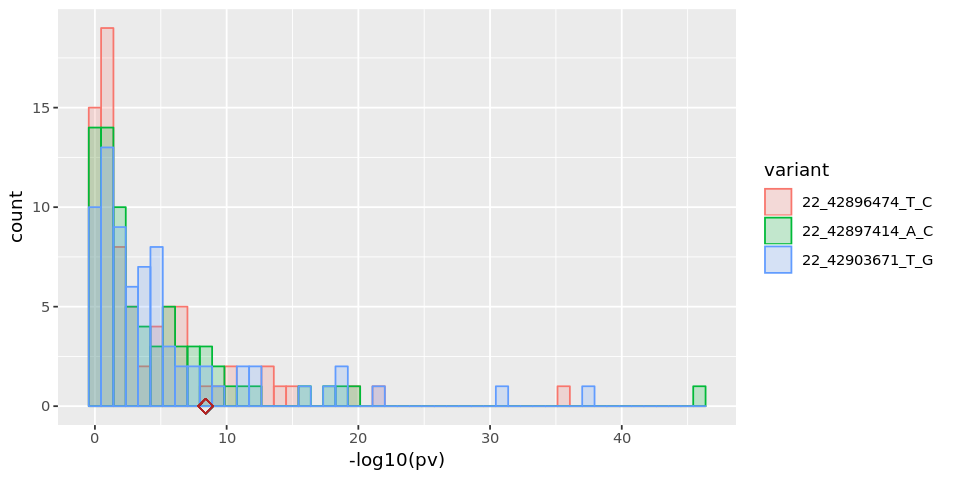

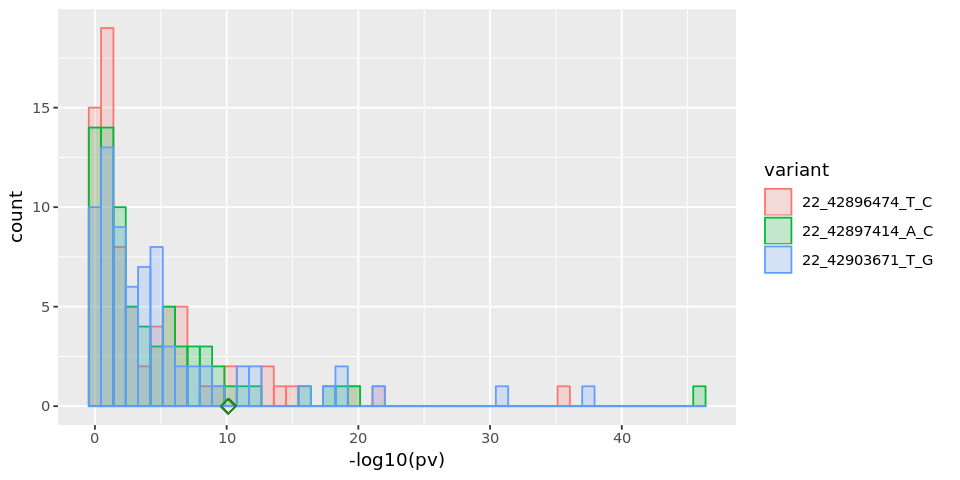

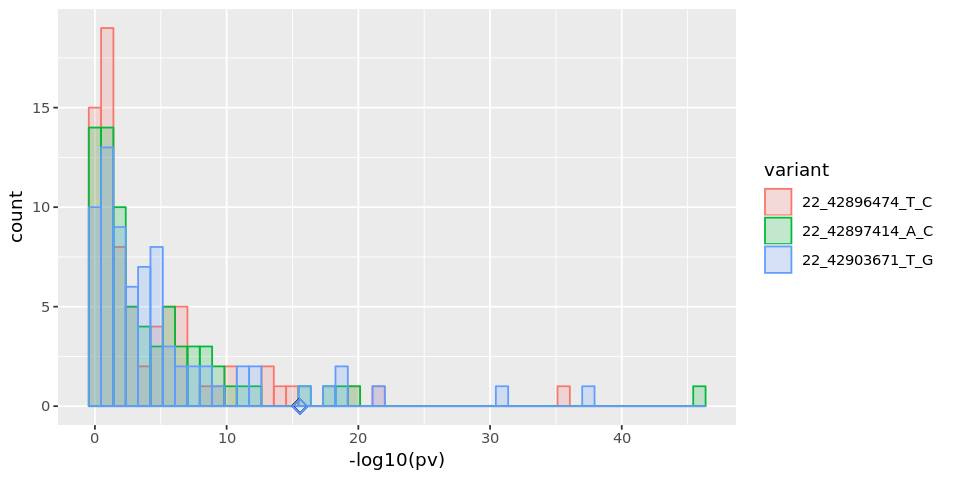

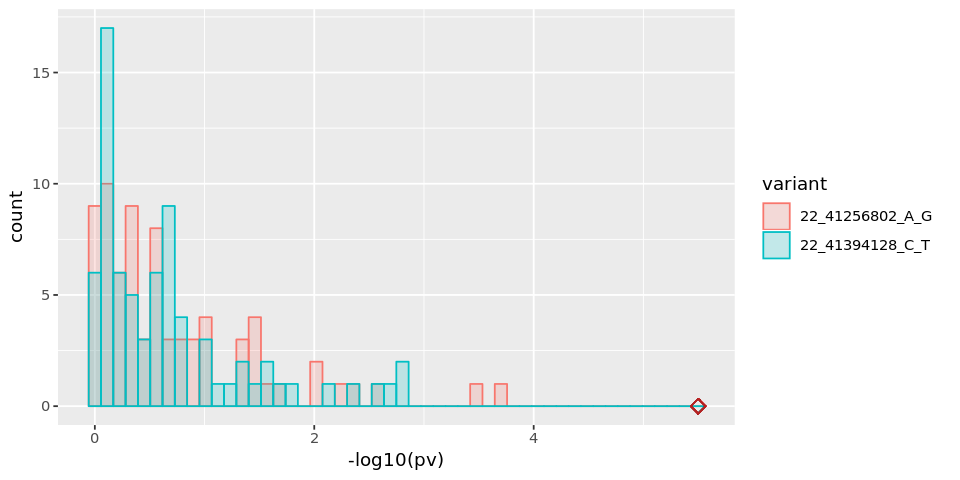

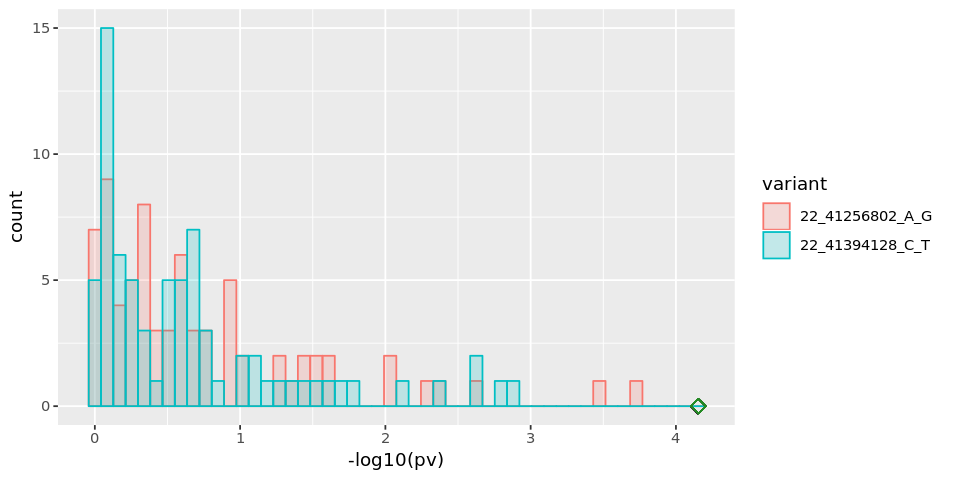

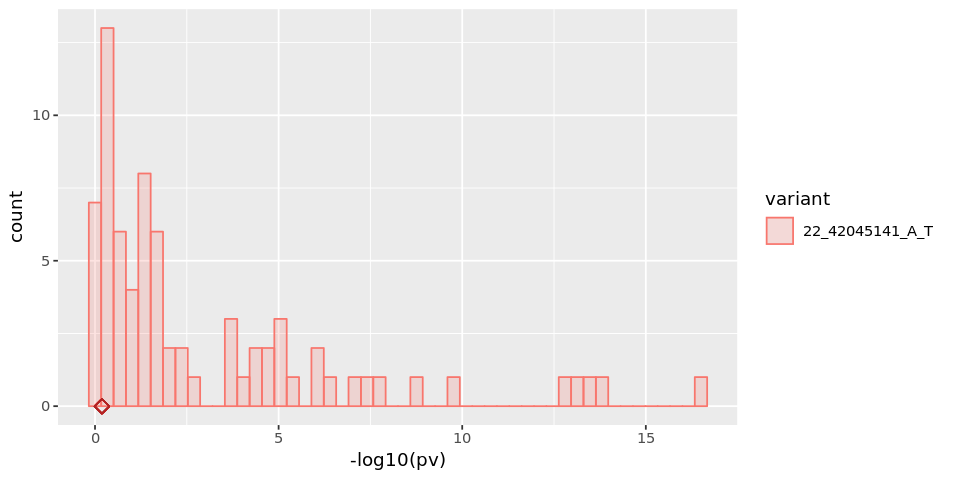

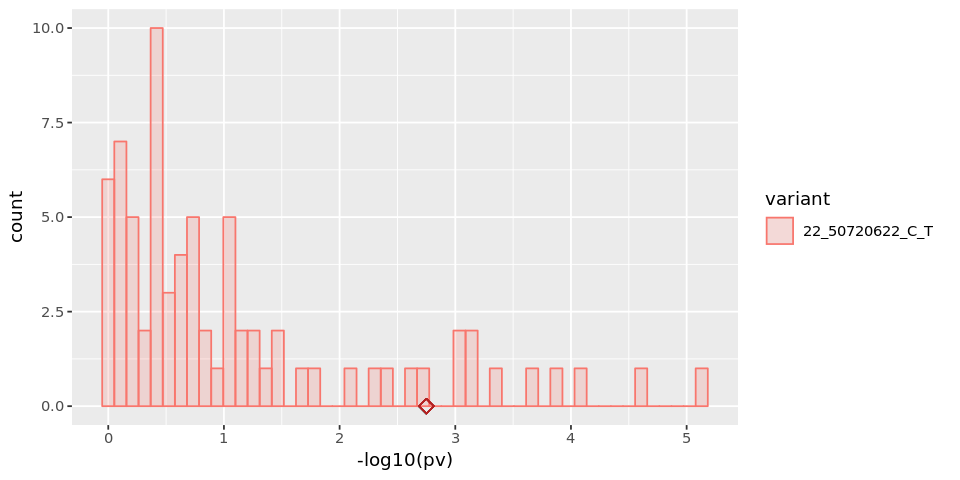

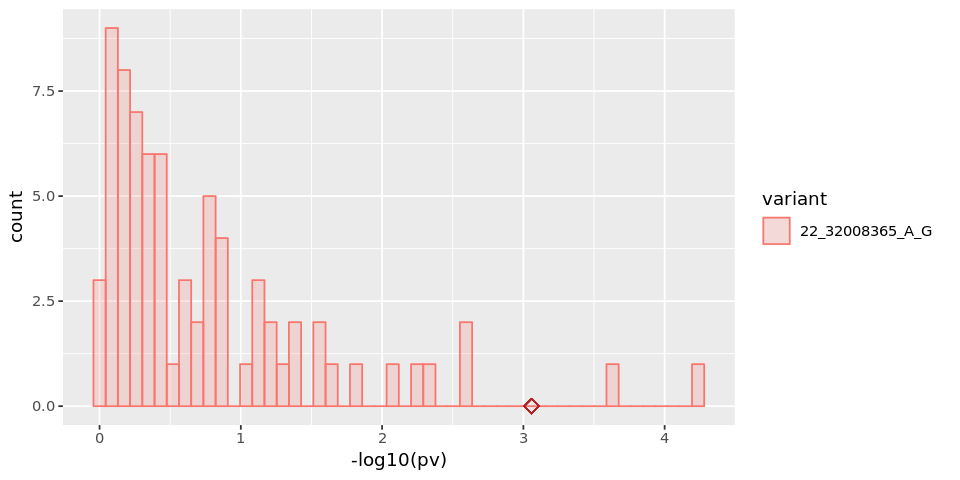

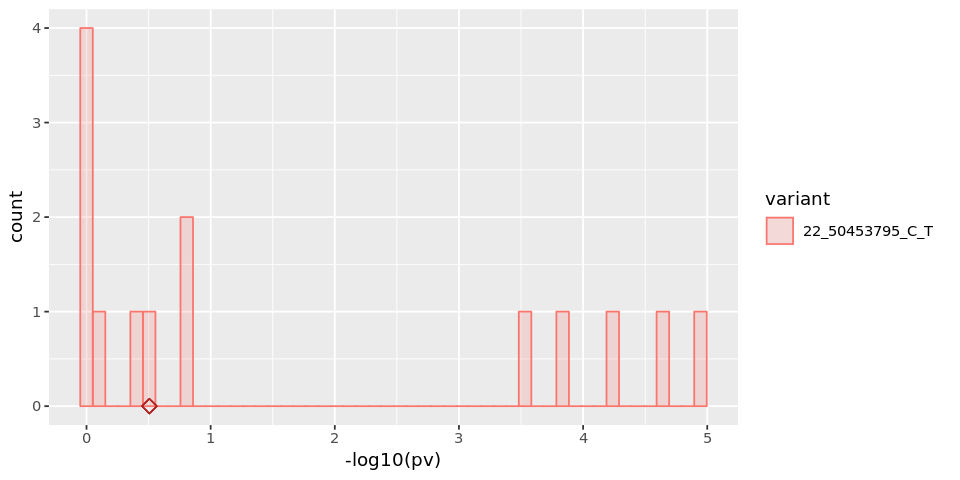

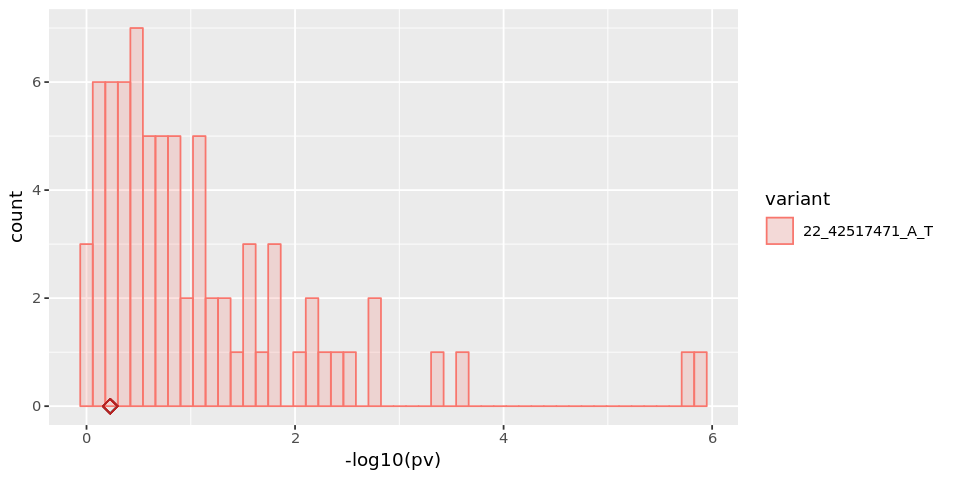

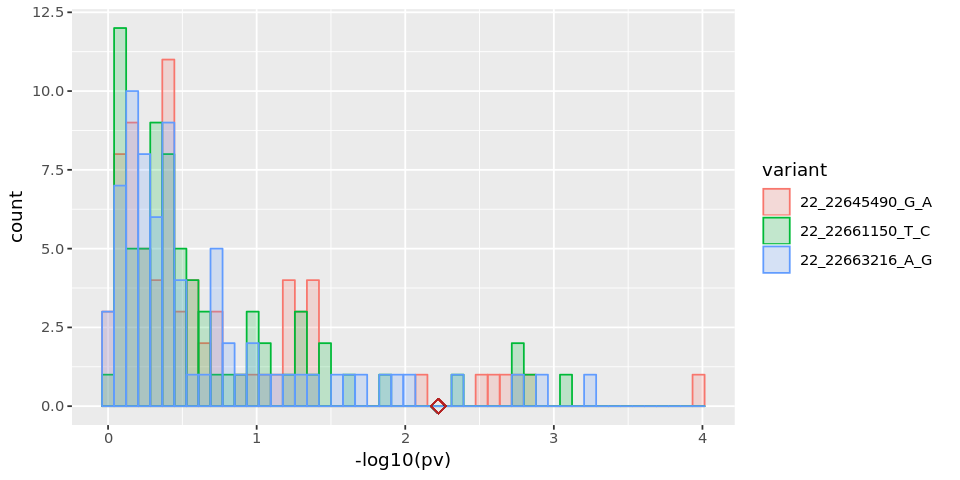

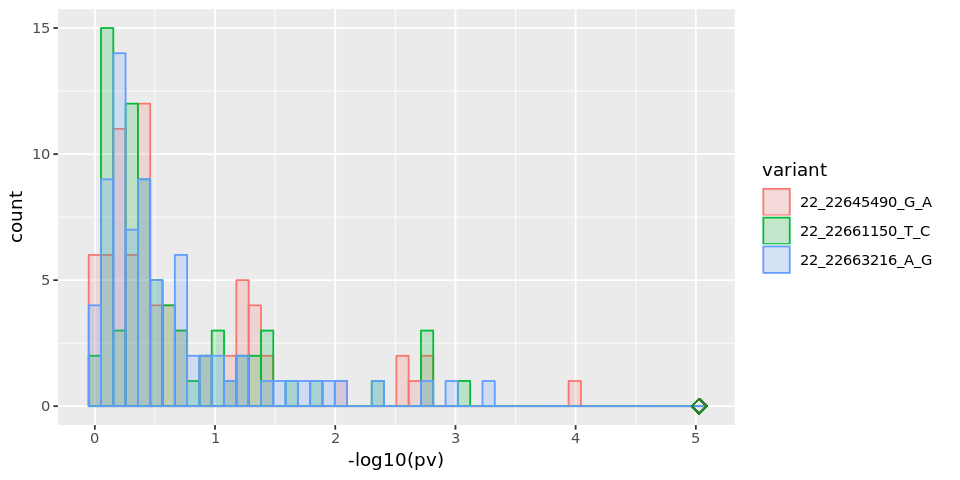

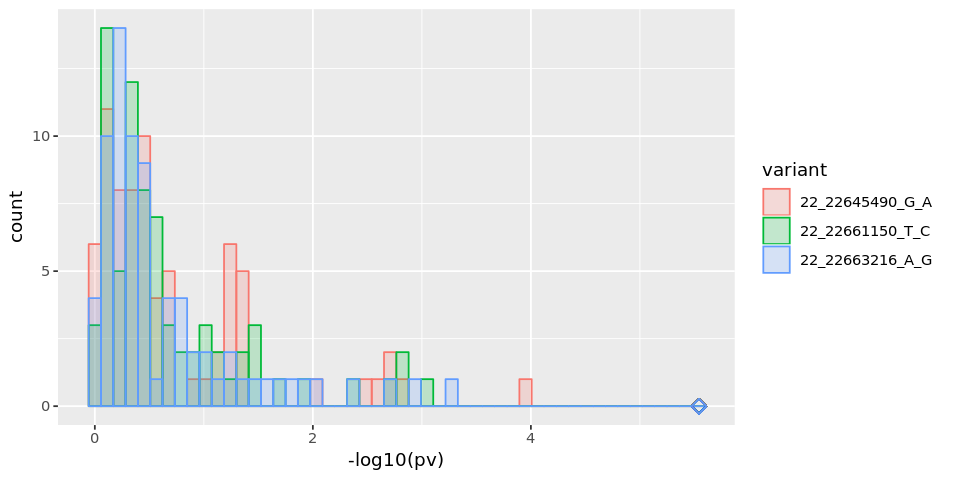

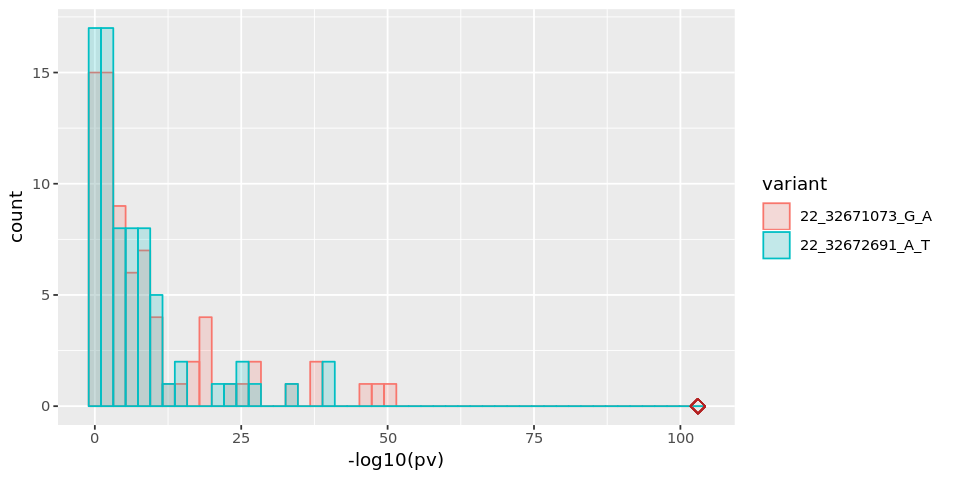

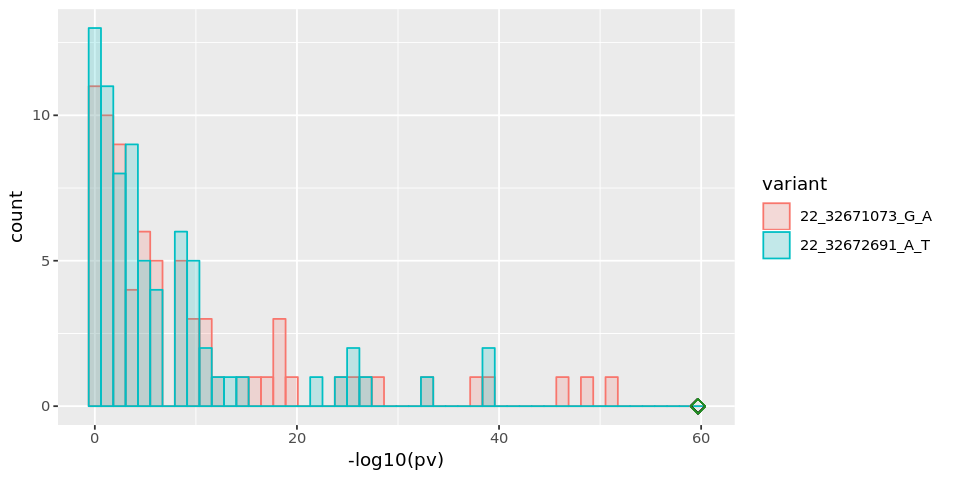

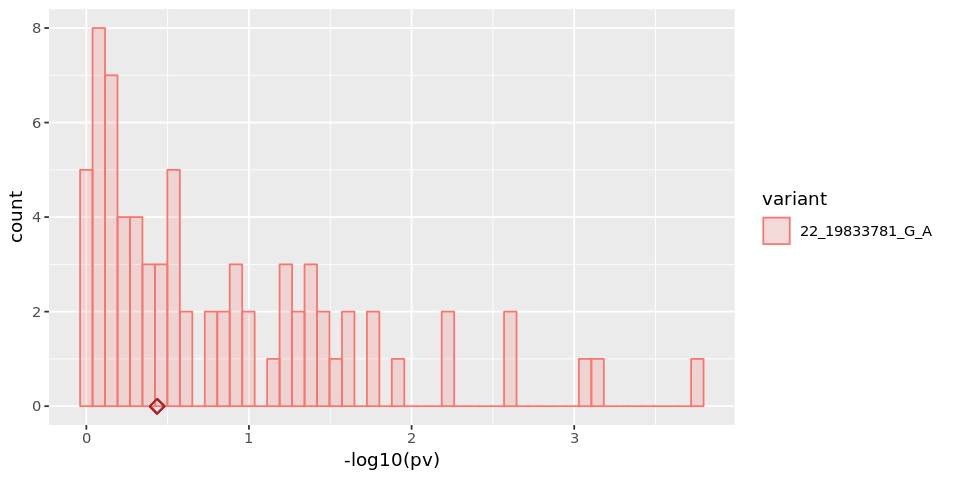

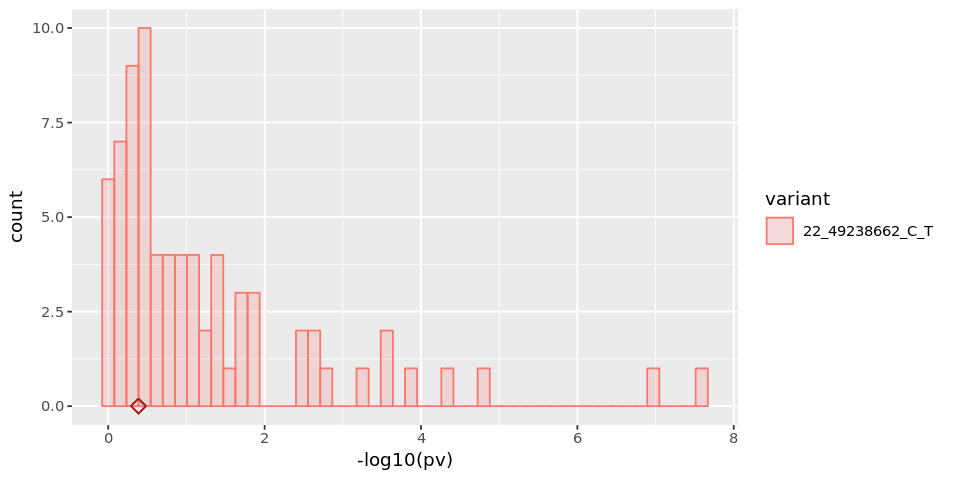

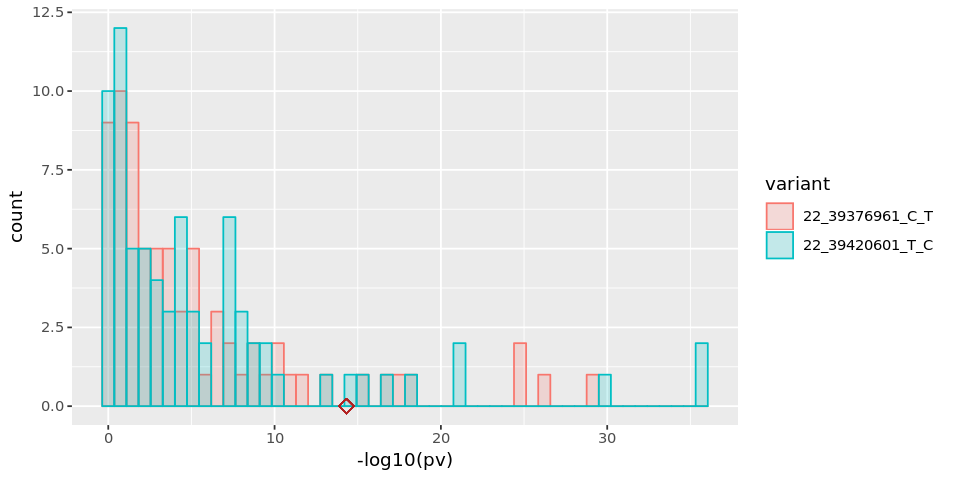

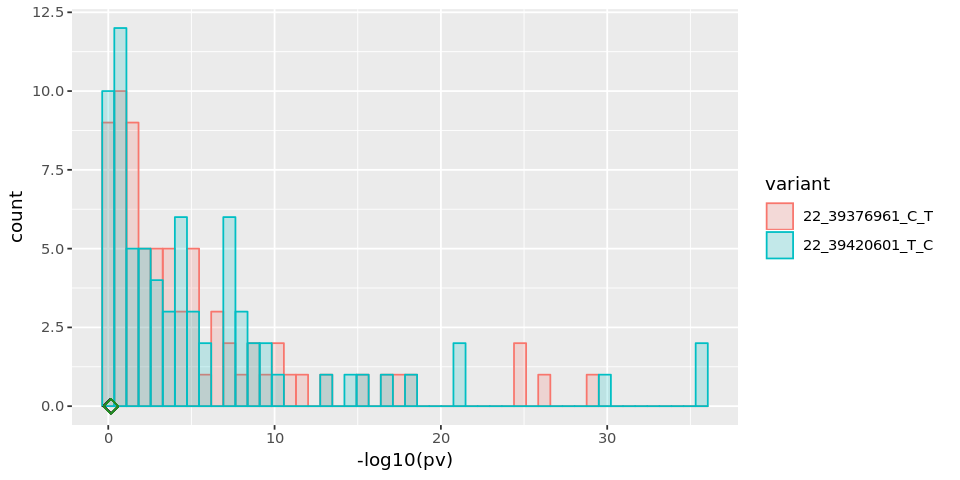

In [114]:
cols = c("firebrick","forestgreen","cornflowerblue")
for (gene in unique(df$gene)){
    df_plot = df[df$gene == gene,]
    df_plot$variant = as.character(df_plot$variant)
    nsnps = length(unique(df_plot$variant))
    p = ggplot(df_plot, aes(x = -log10(pv))) 
    p = p + geom_histogram(aes(color = variant, fill = variant), alpha = 0.2, position = "identity", bins = 50)
    for (i in 1:nsnps){
        p_real = df0[df0$gene == gene & df0$variant == unique(df_plot$variant)[i],"pv_raw"]
        p = p + geom_point(aes(x = -log10(p_real),y = 0), col = cols[i], alpha = 0.5, pch = 23, size = 3)
        print(p)
    }
}

In [ ]:
# options(repr.plot.width = 8, repr.plot.height = 4) 
# p = ggplot(df[df$gene == 'ENSG00000075234_TTC38',], aes(x = -log10(pv))) 
# p = p + geom_histogram(aes(color = gene, fill = gene), alpha = 0.2, position = "identity", bins = 50) 
# # p = p + geom_density(aes(color = gene))
# # p = p + coord_cartesian(ylim(c(0,40)),xlim(c(0,10)))
# p